In [1]:
import pandas as pd
import numpy as np
import math
import statistics
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import matplotlib
from arch import arch_model
import pandas_datareader.data as web

In [2]:
matplotlib.style.use('ggplot')

In [3]:
%matplotlib inline

In [99]:
data =pd.read_csv("data/SBER_den_2010_2021.csv")
data

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,30.12.2020,"271,65","272,49","274,24","270,12","31,53M","-0,13%"
1,29.12.2020,"272,00","275,91","276,43","271,26","39,02M","-0,98%"
2,28.12.2020,"274,70","270,90","275,19","269,73","39,04M","1,50%"
3,25.12.2020,"270,64","269,97","271,00","268,28","11,99M","0,49%"
4,24.12.2020,"269,32","271,98","272,82","267,13","42,61M","-0,29%"
...,...,...,...,...,...,...,...
2756,15.01.2010,"88,15","87,50","88,67","87,16","142,27M","0,69%"
2757,14.01.2010,"87,55","87,50","87,87","86,75","111,47M","1,09%"
2758,13.01.2010,"86,61","84,30","87,23","84,10","128,82M","1,89%"
2759,12.01.2010,"85,00","86,55","86,77","84,90","130,32M","-1,95%"


In [4]:
dateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%Y')
data_sber = pd.read_csv("data/SBER_den_2010_2021.csv", parse_dates=['Дата'],date_parser=dateparse, decimal=',')

<ipython-input-4-fa83cc99f2db>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%Y')


In [5]:
data_sber.drop(['Объём','Макс.','Мин.', 'Изм. %'], axis=1, inplace=True)
data_sber

,Дата,Цена,Откр.
0,2020-12-30,271.65,272.49
1,2020-12-29,272.00,275.91
2,2020-12-28,274.70,270.90
3,2020-12-25,270.64,269.97
4,2020-12-24,269.32,271.98
...,...,...,...
2756,2010-01-15,88.15,87.50
2757,2010-01-14,87.55,87.50
2758,2010-01-13,86.61,84.30
2759,2010-01-12,85.00,86.55


In [6]:
def rename_prices_data(df,new_names = ['date', 'price', 'open']):
    df.rename(columns = dict(zip(df.columns, new_names)), inplace=True)
    return df

In [7]:
rename_prices_data(data_sber)

,date,price,open
0,2020-12-30,271.65,272.49
1,2020-12-29,272.00,275.91
2,2020-12-28,274.70,270.90
3,2020-12-25,270.64,269.97
4,2020-12-24,269.32,271.98
...,...,...,...
2756,2010-01-15,88.15,87.50
2757,2010-01-14,87.55,87.50
2758,2010-01-13,86.61,84.30
2759,2010-01-12,85.00,86.55


In [8]:
X = data_sber['price'].values
res = adfuller(X)
print(res[1])#price is non stationary as null hypo of ADF(data is non-stationary) cannot be rejected

0.21620058483208332


<AxesSubplot:xlabel='date'>

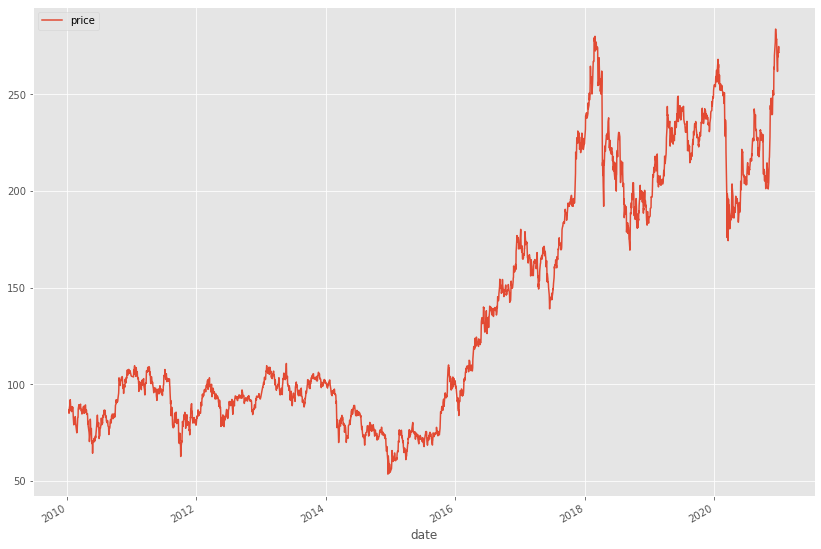

In [9]:
data_sber.plot(x='date',y='price', figsize=(14, 10)) #an evidence that data is not stationary

In [10]:
# data_sber['return'] = data_sber['return'].str.replace(r'%', r'')
# data_sber['return'] = data_sber['return'].str.replace(r',', r'.').astype('float') / 100.0

In [11]:
data_sber['daily_return'] = data_sber['price'].pct_change(-1)

In [ ]:
#data_sber['log_return'] = np.log(data_sber['price']/data_sber['price'].shift(-1))

In [12]:
data_sber.sort_values(by=['date'], inplace=True, ascending=True)

In [13]:
data_sber['daily_cum_return'] = np.cumsum(data_sber['daily_return'])

In [14]:
data_sber

,date,price,open,daily_return,daily_cum_return
2760,2010-01-11,86.69,86.56,NaN,NaN
2759,2010-01-12,85.00,86.55,-0.019495,-0.019495
2758,2010-01-13,86.61,84.30,0.018941,-0.000554
2757,2010-01-14,87.55,87.50,0.010853,0.010300
2756,2010-01-15,88.15,87.50,0.006853,0.017153
...,...,...,...,...,...
4,2020-12-24,269.32,271.98,-0.002888,1.714038
3,2020-12-25,270.64,269.97,0.004901,1.718939
2,2020-12-28,274.70,270.90,0.015001,1.733941
1,2020-12-29,272.00,275.91,-0.009829,1.724112


<AxesSubplot:xlabel='date'>

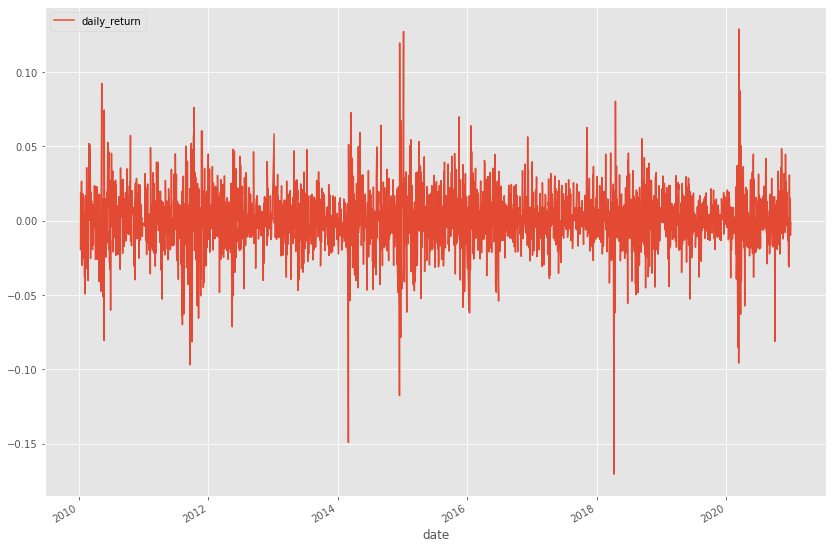

In [15]:

data_sber.plot(x='date',y='daily_return', figsize=(14, 10))

In [16]:
from scipy.stats import norm

In [17]:
mean = data_sber['daily_return'].mean()
sd = data_sber['daily_return'].std()
mean

0.0006242120409002987

In [74]:
pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=36004a4f41b03ff0733f56b0901589cb2657a4b839bf94f92db07c4e4ff32f85
  Stored in directory: c:\users\eapst\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [75]:
import plotly.figure_factory as ff

In [86]:
fig = ff.create_distplot([data_sber['daily_return'].dropna()], ["daily_return"])

In [87]:
fig.show()

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [19]:
data_sber_return =data_sber[['date', 'daily_return']].copy()

In [20]:
data_sber_return.set_index('date', inplace=True)

In [21]:
data_sber_return.dropna(inplace=True)


In [22]:
X = data_sber_return['daily_return'].values
result = adfuller(X)
print(result[1])#means that daily return is stationary as we reject the null hypo that data is NS

0.0


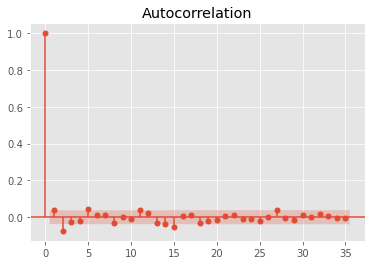

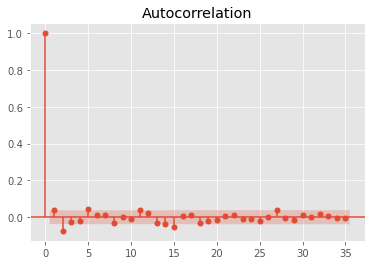

In [23]:
plot_acf(data_sber_return) #looks like random walk, since only corr(t,t)=1 and other correlations are not so significant

In [ ]:
#Volatility clustering

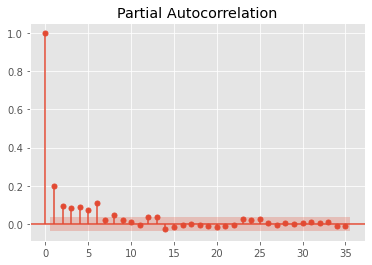

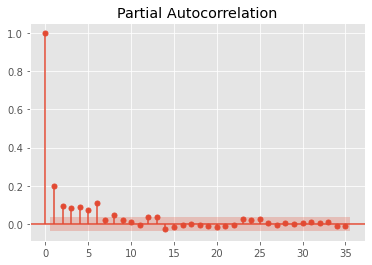

In [24]:
plot_pacf(data_sber_return**2)# volatility clustering os here, because some variables are significant

In [25]:
data_sber_return = data_sber_return*100

In [26]:
data_sber_return[:"2019-01-01"]

,daily_return
date,
2010-01-12,-1.949475
2010-01-13,1.894118
2010-01-14,1.085325
2010-01-15,0.685323
2010-01-18,2.654566
...,...
2018-12-25,-0.542594
2018-12-26,0.054555
2018-12-27,0.872410


In [94]:

model = arch_model(data_sber_return,p=1,q=1, dist="t")


In [95]:
model_fit = model.fit(disp="off")

In [96]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                 daily_return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -5563.19
Distribution:      Standardized Student's t   AIC:                           11136.4
Method:                  Maximum Likelihood   BIC:                           11166.0
                                              No. Observations:                 2760
Date:                      Sat, Apr 24 2021   Df Residuals:                     2759
Time:                              15:26:04   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0777  2.989e-02      2.601  9.308e-03 [1.914e-02,  0.136]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1177  5.177e-02      2.273  2.301e-02 [1.622e-02,  0.219]
alpha[1]       0.0900  2.071e-02      4.346  1.386e-05 [4.942e-02,  0.131]
beta[1]        0.8829  2.972e-02     29.711 5.524e-194   [  0.825,  0.941]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             5.9318      0.721      8.226  1.936e-16 [  4.518,  7.345]
========================================================================

Covariance estimator: robust
"""

In [48]:
data_sber_return[2760-756:]

,daily_return
date,
2018-01-03,2.975133
2018-01-04,2.975420
2018-01-05,-0.083752
2018-01-09,0.754401
2018-01-10,-1.098170
...,...
2020-12-24,-0.288782
2020-12-25,0.490123
2020-12-28,1.500148


In [50]:
rolling_predictions = []
for i in range(756):
    train = data_sber_return[2760-756+i:]
    model = arch_model(train, p=1, q=1, dist = "t")
    model_fit = model.fit()
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(pred.variance.values[-1,:][0])

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3789.521396536915
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2623.0230387281467
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1500.977012755136
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1596.6558597714602
Iteration:      5,   Func. Count:     40,   Neg. LLF: 1540.5678656724276
Iteration:      6,   Func. Count:     47,   Neg. LLF: 1481.1044133229975
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1481.0968884631038
Iteration:      8,   Func. Count:     59,   Neg. LLF: 1481.095393734884
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1481.0952752764097
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1481.095208998312
Iteration:     11,   Func. Count:     76,   Neg. LLF: 1481.0952089983093
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1481.095208998312
            Iterations: 11
            Function evaluations: 76
            Gradient evaluati

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      5,   Func. Count:     39,   Neg. LLF: 1493.4207304508955
Iteration:      6,   Func. Count:     46,   Neg. LLF: 1472.9576386984072
Iteration:      7,   Func. Count:     52,   Neg. LLF: 1472.9189359614622
Iteration:      8,   Func. Count:     58,   Neg. LLF: 1472.917602504912
Iteration:      9,   Func. Count:     64,   Neg. LLF: 1472.917359625782
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1472.9173528964527
Iteration:     11,   Func. Count:     76,   Neg. LLF: 1472.9173493605545
Iteration:     12,   Func. Count:     81,   Neg. LLF: 1472.917349360554
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1472.9173493605545
            Iterations: 12
            Function evaluations: 81
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 3785.8070914587747
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1773.649665647823
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1487.5029

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      3,   Func. Count:     24,   Neg. LLF: 1507.6388650524304
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1600.4718554402916
Iteration:      5,   Func. Count:     39,   Neg. LLF: 1485.2755041489754
Iteration:      6,   Func. Count:     46,   Neg. LLF: 1467.7305320467542
Iteration:      7,   Func. Count:     52,   Neg. LLF: 1467.7273916653244
Iteration:      8,   Func. Count:     59,   Neg. LLF: 1467.7165145180757
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1467.7164164679846
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1467.7164133128585
Iteration:     11,   Func. Count:     76,   Neg. LLF: 1467.7164133128554
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1467.7164133128585
            Iterations: 11
            Function evaluations: 76
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 3765.831092125255
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1563.6

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      8,   Func. Count:     59,   Neg. LLF: 1463.8046557790703
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1463.8046540947948
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1463.804654094799
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1463.8046540947948
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      7,   Neg. LLF: 3735.1109076395987
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1755.7406500441243
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1474.9746860301327
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1576.553123076923
Iteration:      5,   Func. Count:     39,   Neg. LLF: 1511.985520344559
Iteration:      6,   Func. Count:     46,   Neg. LLF: 1461.3141521439204
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1461.2132736731987
Iteration:      8,   Func. Count:     59,   Neg. LLF: 1461.208

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      7,   Func. Count:     53,   Neg. LLF: 1458.0655392042754
Iteration:      8,   Func. Count:     59,   Neg. LLF: 1458.0655069665422
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1458.0655044879727
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1458.0655044879747
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1458.0655044879727
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      7,   Neg. LLF: 3690.796373168103
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1533.7293702251172
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1522.8585769452175
Iteration:      4,   Func. Count:     31,   Neg. LLF: 26186.36221445782
Iteration:      5,   Func. Count:     38,   Neg. LLF: 1459.5665742998322
Iteration:      6,   Func. Count:     45,   Neg. LLF: 1674.9474438518403
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1456.63

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      8,   Func. Count:     59,   Neg. LLF: 1446.264885311678
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1446.2647653324088
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1446.2647637089096
Iteration:     11,   Func. Count:     76,   Neg. LLF: 1446.2647637088976
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1446.2647637089096
            Iterations: 11
            Function evaluations: 76
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 3641.9809832809874
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1478.1305675516855
Iteration:      3,   Func. Count:     23,   Neg. LLF: 1485.4446084131112
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1553.565919245822
Iteration:      5,   Func. Count:     39,   Neg. LLF: 1571.249805719951
Iteration:      6,   Func. Count:     46,   Neg. LLF: 1443.6049841031295
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1443.581

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:     10,   Func. Count:     69,   Neg. LLF: 1439.553495705546
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1439.553495705546
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      7,   Neg. LLF: 3607.9712700132613
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1545.2593069626244
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1471.751630783612
Iteration:      4,   Func. Count:     31,   Neg. LLF: 24184.920605715946
Iteration:      5,   Func. Count:     38,   Neg. LLF: 1440.7032640366851
Iteration:      6,   Func. Count:     45,   Neg. LLF: 1440.063439848749
Iteration:      7,   Func. Count:     52,   Neg. LLF: 1438.0600073901005
Iteration:      8,   Func. Count:     58,   Neg. LLF: 1438.0597392199345
Iteration:      9,   Func. Count:     64,   Neg. LLF: 1438.0597300982397
Iteration:     10,   Func. Count:     69,   Neg. LLF: 1438.05973

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      6,   Func. Count:     46,   Neg. LLF: 1432.7498744723557
Iteration:      7,   Func. Count:     52,   Neg. LLF: 1432.7581490591906
Iteration:      8,   Func. Count:     59,   Neg. LLF: 1432.7459011798608
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1432.7458885459441
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1432.7458879275916
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1432.7458879275916
            Iterations: 10
            Function evaluations: 71
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      7,   Neg. LLF: 3551.3757284921403
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1687.0298764735448
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1438.2146439751166
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1594.7242895510858
Iteration:      5,   Func. Count:     39,   Neg. LLF: 1462.7090253529834
Iteration:      6,   Func. Count:     46,   Neg. LLF: 1431.

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Optimization terminated successfully    (Exit mode 0)
            Current function value: 1427.1940041043124
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      7,   Neg. LLF: 3527.0033902535324
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1611.1650193633259
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1444.7753066907535
Iteration:      4,   Func. Count:     31,   Neg. LLF: 22754.49273899058
Iteration:      5,   Func. Count:     38,   Neg. LLF: 1427.9184685548726
Iteration:      6,   Func. Count:     45,   Neg. LLF: 1434.8583447270148
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1425.4205520926494
Iteration:      8,   Func. Count:     59,   Neg. LLF: 1425.4181794530407
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1425.4181571129402
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1425.4181565295105
Optimization terminated successfully    (Exit mode 0)
      

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     16,   Neg. LLF: 2458.1462767197318
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1452.5035126624216
Iteration:      4,   Func. Count:     32,   Neg. LLF: 35738.60187165546
Iteration:      5,   Func. Count:     39,   Neg. LLF: 1424.0580534533665
Iteration:      6,   Func. Count:     46,   Neg. LLF: 1420.9932324338015
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1420.4175051845598
Iteration:      8,   Func. Count:     59,   Neg. LLF: 1420.4119877252622
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1420.4119242945435
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1420.4119180413031
Iteration:     11,   Func. Count:     76,   Neg. LLF: 1420.411918041302
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1420.4119180413031
            Iterations: 11
            Function evaluations: 76
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 3470.13

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      5,   Func. Count:     39,   Neg. LLF: 1415.3289184866117
Iteration:      6,   Func. Count:     46,   Neg. LLF: 33809.026140630536
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1413.0035841683446
Iteration:      8,   Func. Count:     59,   Neg. LLF: 1413.0023953033105
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1413.0023526355435
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1413.0023518400412
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1413.0023518400412
            Iterations: 10
            Function evaluations: 71
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      7,   Neg. LLF: 3495.933268677461
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2416.1834824465386
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1484.405852446673
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1511.10535394212
Iteration:      5,   Func. Count:     39,   Neg. LLF: 1413.8233

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     16,   Neg. LLF: 2403.1566755792032
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1477.8179980382702
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1489.0182493080347
Iteration:      5,   Func. Count:     39,   Neg. LLF: 1408.6573584865175
Iteration:      6,   Func. Count:     46,   Neg. LLF: 33130.42295111599
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1406.3761380489116
Iteration:      8,   Func. Count:     59,   Neg. LLF: 1406.3745230476293
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1406.374424199434
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1406.3744213943223
Iteration:     11,   Func. Count:     76,   Neg. LLF: 1406.37442139432
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1406.3744213943223
            Iterations: 11
            Function evaluations: 76
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 3468.4301

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:     10,   Func. Count:     71,   Neg. LLF: 1395.499794619198
Iteration:     11,   Func. Count:     77,   Neg. LLF: 1395.4997904215704
Iteration:     12,   Func. Count:     83,   Neg. LLF: 1395.499789642984
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1395.499789642984
            Iterations: 12
            Function evaluations: 83
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 3175.424701983008
Iteration:      2,   Func. Count:     18,   Neg. LLF: 11060.843319994297
Iteration:      3,   Func. Count:     27,   Neg. LLF: 1525.9394273518517
Iteration:      4,   Func. Count:     35,   Neg. LLF: 1483.5553437369715
Iteration:      5,   Func. Count:     42,   Neg. LLF: 1405.1678605482425
Iteration:      6,   Func. Count:     49,   Neg. LLF: 1393.4671823820113
Iteration:      7,   Func. Count:     55,   Neg. LLF: 1393.4033777452194
Iteration:      8,   Func. Count:     61,   Neg. LLF: 1393.3918

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      6,   Func. Count:     49,   Neg. LLF: 1387.6474767859972
Iteration:      7,   Func. Count:     55,   Neg. LLF: 1387.5914806992257
Iteration:      8,   Func. Count:     61,   Neg. LLF: 1387.5835027732937
Iteration:      9,   Func. Count:     67,   Neg. LLF: 1387.577963256325
Iteration:     10,   Func. Count:     73,   Neg. LLF: 1387.5750837074074
Iteration:     11,   Func. Count:     79,   Neg. LLF: 1387.574534941266
Iteration:     12,   Func. Count:     85,   Neg. LLF: 1387.5744775607127
Iteration:     13,   Func. Count:     91,   Neg. LLF: 1387.57447370296
Iteration:     14,   Func. Count:     96,   Neg. LLF: 1387.57447370296
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1387.57447370296
            Iterations: 14
            Function evaluations: 96
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      7,   Neg. LLF: 3078.709126269967
Iteration:      2,   Func. Count:     18,   Neg. LLF: 9881.075711980

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     18,   Neg. LLF: 10299.779027370314
Iteration:      3,   Func. Count:     27,   Neg. LLF: 1525.3142371202946
Iteration:      4,   Func. Count:     35,   Neg. LLF: 1469.508314659698
Iteration:      5,   Func. Count:     42,   Neg. LLF: 1383.5589616372033
Iteration:      6,   Func. Count:     49,   Neg. LLF: 1381.604629873335
Iteration:      7,   Func. Count:     55,   Neg. LLF: 1381.536076682467
Iteration:      8,   Func. Count:     61,   Neg. LLF: 1381.5255075660189
Iteration:      9,   Func. Count:     67,   Neg. LLF: 1381.510979874631
Iteration:     10,   Func. Count:     73,   Neg. LLF: 1381.5066965091792
Iteration:     11,   Func. Count:     79,   Neg. LLF: 1381.5059170530324
Iteration:     12,   Func. Count:     85,   Neg. LLF: 1381.5058823759214
Iteration:     13,   Func. Count:     91,   Neg. LLF: 1381.5058802339852
Iteration:     14,   Func. Count:     96,   Neg. LLF: 1381.5058802339847
Optimization terminated successfully    (Exit mode 0)


C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:     12,   Func. Count:     85,   Neg. LLF: 1376.28602556431
Iteration:     13,   Func. Count:     90,   Neg. LLF: 1376.2860255643118
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1376.28602556431
            Iterations: 13
            Function evaluations: 90
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      7,   Neg. LLF: 3114.9515452879223
Iteration:      2,   Func. Count:     17,   Neg. LLF: 11634.476407853646
Iteration:      3,   Func. Count:     26,   Neg. LLF: 1506.5613516748433
Iteration:      4,   Func. Count:     34,   Neg. LLF: 1460.8226443399549
Iteration:      5,   Func. Count:     41,   Neg. LLF: 1375.5560493382113
Iteration:      6,   Func. Count:     48,   Neg. LLF: 1374.3102205229802
Iteration:      7,   Func. Count:     54,   Neg. LLF: 1374.2763333537732
Iteration:      8,   Func. Count:     60,   Neg. LLF: 1374.2745395508914
Iteration:      9,   Func. Count:     66,   Neg. LLF: 1374.2737

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      9,   Func. Count:     66,   Neg. LLF: 1369.8894907240056
Iteration:     10,   Func. Count:     72,   Neg. LLF: 1369.8880171123878
Iteration:     11,   Func. Count:     78,   Neg. LLF: 1369.88744294883
Iteration:     12,   Func. Count:     84,   Neg. LLF: 1369.887384034595
Iteration:     13,   Func. Count:     90,   Neg. LLF: 1369.8873814173871
Iteration:     14,   Func. Count:     95,   Neg. LLF: 1369.8873814173862
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1369.8873814173871
            Iterations: 14
            Function evaluations: 95
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      7,   Neg. LLF: 5378.508974727042
Iteration:      2,   Func. Count:     16,   Neg. LLF: 32807.68602993632
Iteration:      3,   Func. Count:     25,   Neg. LLF: 1547.013539110294
Iteration:      4,   Func. Count:     33,   Neg. LLF: 1464.1634604340074
Iteration:      5,   Func. Count:     40,   Neg. LLF: 1367.951063

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      7,   Func. Count:     52,   Neg. LLF: 1363.0483819232632
Iteration:      8,   Func. Count:     58,   Neg. LLF: 1363.046528663625
Iteration:      9,   Func. Count:     64,   Neg. LLF: 1363.0459676992512
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1363.04571941623
Iteration:     11,   Func. Count:     76,   Neg. LLF: 1363.0457102388168
Iteration:     12,   Func. Count:     81,   Neg. LLF: 1363.045710238816
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1363.0457102388168
            Iterations: 12
            Function evaluations: 81
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 8456.34647196123
Iteration:      2,   Func. Count:     16,   Neg. LLF: 22728.7043381759
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1576.2727875625187
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1468.557007206463
Iteration:      5,   Func. Count:     40,   Neg. LLF: 1361.900449692

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      5,   Func. Count:     39,   Neg. LLF: 1361.3639131294763
Iteration:      6,   Func. Count:     46,   Neg. LLF: 1355.0276670105745
Iteration:      7,   Func. Count:     52,   Neg. LLF: 1355.025591725368
Iteration:      8,   Func. Count:     58,   Neg. LLF: 1355.025545129377
Iteration:      9,   Func. Count:     64,   Neg. LLF: 1355.025537515587
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1355.0255366895794
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1355.0255366895794
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      7,   Neg. LLF: 38858.055602673856
Iteration:      2,   Func. Count:     16,   Neg. LLF: 24382.53916676801
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1368.6742554870184
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1450.7462403377504
Iteration:      5,   Func. Count:     39,   Neg. LLF: 1356.9302

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      1,   Func. Count:      7,   Neg. LLF: 39866.32397242377
Iteration:      2,   Func. Count:     16,   Neg. LLF: 28075.01549571247
Iteration:      3,   Func. Count:     25,   Neg. LLF: 1346.846108318663
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1353.3036161932591
Iteration:      5,   Func. Count:     39,   Neg. LLF: 1339.0829817453673
Iteration:      6,   Func. Count:     45,   Neg. LLF: 1339.0801112070878
Iteration:      7,   Func. Count:     51,   Neg. LLF: 1339.07754959025
Iteration:      8,   Func. Count:     57,   Neg. LLF: 1339.0771112398702
Iteration:      9,   Func. Count:     63,   Neg. LLF: 1339.076948277459
Iteration:     10,   Func. Count:     69,   Neg. LLF: 1339.076880489628
Iteration:     11,   Func. Count:     75,   Neg. LLF: 1339.076878279061
Iteration:     12,   Func. Count:     80,   Neg. LLF: 1339.0768782790628
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1339.076878279061
            Iterations: 

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      7,   Func. Count:     53,   Neg. LLF: 1331.0589302770263
Iteration:      8,   Func. Count:     59,   Neg. LLF: 1331.0588624936804
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1331.0588228219679
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1331.05881684257
Iteration:     11,   Func. Count:     76,   Neg. LLF: 1331.0588168425702
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1331.05881684257
            Iterations: 11
            Function evaluations: 76
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 35711.08900270192
Iteration:      2,   Func. Count:     16,   Neg. LLF: 29296.418685433695
Iteration:      3,   Func. Count:     25,   Neg. LLF: 16772.548489958604
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1333.3661422892835
Iteration:      5,   Func. Count:     39,   Neg. LLF: 1327.446732025242
Iteration:      6,   Func. Count:     46,   Neg. LLF: 1327.401315

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      2,   Func. Count:     16,   Neg. LLF: 1378.6067273426547
Iteration:      3,   Func. Count:     23,   Neg. LLF: 1321.2565090400985
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1309.6380441881784
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1362.913400815935
Iteration:      6,   Func. Count:     44,   Neg. LLF: 1309.7210724085598
Iteration:      7,   Func. Count:     51,   Neg. LLF: 1307.6513274152471
Iteration:      8,   Func. Count:     58,   Neg. LLF: 1307.543289580145
Iteration:      9,   Func. Count:     64,   Neg. LLF: 1307.5427700558807
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1307.5425675003376
Iteration:     11,   Func. Count:     76,   Neg. LLF: 1307.5424957130476
Iteration:     12,   Func. Count:     82,   Neg. LLF: 1307.542492354683
Iteration:     13,   Func. Count:     87,   Neg. LLF: 1307.5424923546836
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1307.542492354683
            Iterati

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      6,   Func. Count:     44,   Neg. LLF: 1305.2266851855984
Iteration:      7,   Func. Count:     51,   Neg. LLF: 1303.1242506109968
Iteration:      8,   Func. Count:     58,   Neg. LLF: 1302.997702684857
Iteration:      9,   Func. Count:     64,   Neg. LLF: 1302.9973457641754
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1302.9973099543693
Iteration:     11,   Func. Count:     76,   Neg. LLF: 1302.9972775779236
Iteration:     12,   Func. Count:     81,   Neg. LLF: 1302.9972775779231
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1302.9972775779236
            Iterations: 12
            Function evaluations: 81
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 7028.716094654708
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1358.2409669882218
Iteration:      3,   Func. Count:     23,   Neg. LLF: 23633.836859466082
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1307.16

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Optimization terminated successfully    (Exit mode 0)
            Current function value: 1299.0140769314587
            Iterations: 12
            Function evaluations: 81
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 6490.646725930904
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1345.9306810379808
Iteration:      3,   Func. Count:     23,   Neg. LLF: 23526.111880873672
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1302.412263550938
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1302.7347651969294
Iteration:      6,   Func. Count:     44,   Neg. LLF: 1300.947174436968
Iteration:      7,   Func. Count:     51,   Neg. LLF: 1297.6787420665898
Iteration:      8,   Func. Count:     57,   Neg. LLF: 1297.6498313016432
Iteration:      9,   Func. Count:     63,   Neg. LLF: 1297.6486289989616
Iteration:     10,   Func. Count:     69,   Neg. LLF: 1297.6484373469375
Iteration:     11,   Func. Count:     75,   Neg. LLF: 1297.648

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      2,   Func. Count:     16,   Neg. LLF: 1338.1794845980507
Iteration:      3,   Func. Count:     23,   Neg. LLF: 23496.72592716774
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1301.884131149644
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1297.6970634671238
Iteration:      6,   Func. Count:     44,   Neg. LLF: 1293.7117731613112
Iteration:      7,   Func. Count:     51,   Neg. LLF: 1292.977954596627
Iteration:      8,   Func. Count:     58,   Neg. LLF: 1292.7980854816021
Iteration:      9,   Func. Count:     64,   Neg. LLF: 1292.7969100624875
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1292.7964634313935
Iteration:     11,   Func. Count:     76,   Neg. LLF: 1292.796462032485
Iteration:     12,   Func. Count:     81,   Neg. LLF: 1292.7964620324851
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1292.796462032485
            Iterations: 12
            Function evaluations: 81
            Gradient evaluati

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      6,   Func. Count:     44,   Neg. LLF: 1288.5850962371926
Iteration:      7,   Func. Count:     51,   Neg. LLF: 1286.6121337390807
Iteration:      8,   Func. Count:     58,   Neg. LLF: 1286.4583825227305
Iteration:      9,   Func. Count:     64,   Neg. LLF: 1286.457439477985
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1286.4569963425422
Iteration:     11,   Func. Count:     76,   Neg. LLF: 1286.4569954390208
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1286.4569954390208
            Iterations: 11
            Function evaluations: 76
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 6337.902110276421
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1332.320702056873
Iteration:      3,   Func. Count:     23,   Neg. LLF: 23244.933807028105
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1290.8910186252392
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1288.3812

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      3,   Func. Count:     23,   Neg. LLF: 23078.763471297774
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1288.8147054151868
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1284.4666654825928
Iteration:      6,   Func. Count:     44,   Neg. LLF: 1281.9958018167185
Iteration:      7,   Func. Count:     51,   Neg. LLF: 1279.9826543392803
Iteration:      8,   Func. Count:     58,   Neg. LLF: 1279.8393582262656
Iteration:      9,   Func. Count:     64,   Neg. LLF: 1279.8389630405577
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1279.8387016206034
Iteration:     11,   Func. Count:     76,   Neg. LLF: 1279.8387009139392
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1279.8387009139392
            Iterations: 11
            Function evaluations: 76
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 6310.380830186607
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1324.9

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      3,   Func. Count:     23,   Neg. LLF: 22802.58998779954
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1283.1237260657938
Iteration:      5,   Func. Count:     38,   Neg. LLF: 1279.4030505069725
Iteration:      6,   Func. Count:     45,   Neg. LLF: 1274.582873660188
Iteration:      7,   Func. Count:     52,   Neg. LLF: 1274.371214201616
Iteration:      8,   Func. Count:     58,   Neg. LLF: 1274.363981043762
Iteration:      9,   Func. Count:     64,   Neg. LLF: 1274.363622156326
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1274.3633359041162
Iteration:     11,   Func. Count:     76,   Neg. LLF: 1274.3633285738626
Iteration:     12,   Func. Count:     81,   Neg. LLF: 1274.3633285738622
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1274.3633285738626
            Iterations: 12
            Function evaluations: 81
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 6349.32579

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      4,   Func. Count:     30,   Neg. LLF: 1273.199567678305
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1270.9647747922488
Iteration:      6,   Func. Count:     44,   Neg. LLF: 1298.5892869758827
Iteration:      7,   Func. Count:     51,   Neg. LLF: 1271.488129124489
Iteration:      8,   Func. Count:     58,   Neg. LLF: 1269.1941001166351
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1269.1891044107347
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1269.1891001764707
Iteration:     11,   Func. Count:     77,   Neg. LLF: 1269.1890979908248
Iteration:     12,   Func. Count:     82,   Neg. LLF: 1269.189097990823
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1269.1890979908248
            Iterations: 12
            Function evaluations: 82
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 6129.823594720528
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1313.0880

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      3,   Func. Count:     23,   Neg. LLF: 22069.430740326097
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1274.0968246731231
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1265.4519608701187
Iteration:      6,   Func. Count:     44,   Neg. LLF: 1260.883420836652
Iteration:      7,   Func. Count:     51,   Neg. LLF: 1262.974824888186
Iteration:      8,   Func. Count:     58,   Neg. LLF: 1260.1288992865211
Iteration:      9,   Func. Count:     64,   Neg. LLF: 1260.1273982455796
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1260.1272221084294
Iteration:     11,   Func. Count:     76,   Neg. LLF: 1260.1271064753378
Iteration:     12,   Func. Count:     81,   Neg. LLF: 1260.1271064753357
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1260.1271064753378
            Iterations: 12
            Function evaluations: 81
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 5721.23

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     16,   Neg. LLF: 22372.574797541532
Iteration:      3,   Func. Count:     23,   Neg. LLF: 1316.512009896729
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1257.6675029028213
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1264.2123990287055
Iteration:      6,   Func. Count:     44,   Neg. LLF: 1256.5474243165688
Iteration:      7,   Func. Count:     51,   Neg. LLF: 1269.9585885701877
Iteration:      8,   Func. Count:     58,   Neg. LLF: 1254.3770085692468
Iteration:      9,   Func. Count:     64,   Neg. LLF: 1254.3700685195554
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1254.36969934783
Iteration:     11,   Func. Count:     76,   Neg. LLF: 1254.3694978906296
Iteration:     12,   Func. Count:     82,   Neg. LLF: 1254.3694593918344
Iteration:     13,   Func. Count:     88,   Neg. LLF: 1254.3694558170932
Iteration:     14,   Func. Count:     93,   Neg. LLF: 1254.3694558170937
Optimization terminated successfully    (Exit mode 0)

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Optimization terminated successfully    (Exit mode 0)
            Current function value: 1250.0751607887282
            Iterations: 12
            Function evaluations: 82
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 37100.07755655411
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1317.291746320553
Iteration:      3,   Func. Count:     23,   Neg. LLF: 1258.374859198737
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1255.6488975115956
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1250.3642849588186
Iteration:      6,   Func. Count:     44,   Neg. LLF: 1380.3937409630526
Iteration:      7,   Func. Count:     51,   Neg. LLF: 1250.7504963848369
Iteration:      8,   Func. Count:     58,   Neg. LLF: 1248.23890869239
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1248.1820071959348
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1248.1807827875696
Iteration:     11,   Func. Count:     77,   Neg. LLF: 1248.18074

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:     12,   Func. Count:     83,   Neg. LLF: 1244.0709040243214
Iteration:     13,   Func. Count:     88,   Neg. LLF: 1244.0709040243232
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1244.0709040243214
            Iterations: 13
            Function evaluations: 88
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      7,   Neg. LLF: 36920.3586372392
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1318.2504290181846
Iteration:      3,   Func. Count:     23,   Neg. LLF: 1251.8822043896275
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1249.2360474721916
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1244.2141243407036
Iteration:      6,   Func. Count:     44,   Neg. LLF: 1509.7540083166261
Iteration:      7,   Func. Count:     52,   Neg. LLF: 1245.193681618194
Iteration:      8,   Func. Count:     59,   Neg. LLF: 1241.7310064145624
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1241.729

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     16,   Neg. LLF: 1325.727036447862
Iteration:      3,   Func. Count:     23,   Neg. LLF: 1616.0182189290072
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1247.49732222998
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1244.1281225010252
Iteration:      6,   Func. Count:     44,   Neg. LLF: 1238.633101894603
Iteration:      7,   Func. Count:     51,   Neg. LLF: 1237.7114717446007
Iteration:      8,   Func. Count:     58,   Neg. LLF: 1237.6469590401953
Iteration:      9,   Func. Count:     64,   Neg. LLF: 1237.6438727279156
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1237.643525199136
Iteration:     11,   Func. Count:     76,   Neg. LLF: 1237.6435101290515
Iteration:     12,   Func. Count:     81,   Neg. LLF: 1237.6435101290558
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1237.6435101290515
            Iterations: 12
            Function evaluations: 81
            Gradient evaluat

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     16,   Neg. LLF: 22834.94297535679
Iteration:      3,   Func. Count:     24,   Neg. LLF: 8123.300797405196
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1241.5330847929224
Iteration:      5,   Func. Count:     38,   Neg. LLF: 1233.4359719499794
Iteration:      6,   Func. Count:     45,   Neg. LLF: 1242.5029136499493
Iteration:      7,   Func. Count:     52,   Neg. LLF: 1230.7300474237136
Iteration:      8,   Func. Count:     59,   Neg. LLF: 1230.649064671701
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1230.6477561865083
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1230.647392777078
Iteration:     11,   Func. Count:     77,   Neg. LLF: 1230.6473921051834
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1230.6473921051834
            Iterations: 11
            Function evaluations: 77
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 36294.237

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      8,   Func. Count:     58,   Neg. LLF: 1224.4424648795857
Iteration:      9,   Func. Count:     64,   Neg. LLF: 1224.4410429434588
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1224.4409746746082
Iteration:     11,   Func. Count:     76,   Neg. LLF: 1224.4409739735725
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1224.4409739735725
            Iterations: 11
            Function evaluations: 76
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 36393.763380114084
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1277.6625872067223
Iteration:      3,   Func. Count:     23,   Neg. LLF: 1258.379257066247
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1224.0464145033823
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1379.9750903687732
Iteration:      6,   Func. Count:     44,   Neg. LLF: 1222.4761056672319
Iteration:      7,   Func. Count:     51,   Neg. LLF: 1221.17

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      7,   Func. Count:     52,   Neg. LLF: 1215.0917647969072
Iteration:      8,   Func. Count:     58,   Neg. LLF: 1215.0628493441359
Iteration:      9,   Func. Count:     64,   Neg. LLF: 1215.0602352715016
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1215.059576945247
Iteration:     11,   Func. Count:     76,   Neg. LLF: 1215.0593615975645
Iteration:     12,   Func. Count:     82,   Neg. LLF: 1215.0593152443926
Iteration:     13,   Func. Count:     88,   Neg. LLF: 1215.059313427046
Iteration:     14,   Func. Count:     93,   Neg. LLF: 1215.0593134270466
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1215.059313427046
            Iterations: 14
            Function evaluations: 93
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      7,   Neg. LLF: 36658.236239127255
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1262.2440535312562
Iteration:      3,   Func. Count:     23,   Neg. LLF: 1224.154

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     16,   Neg. LLF: 1264.1600979675022
Iteration:      3,   Func. Count:     23,   Neg. LLF: 1220.4188759354224
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1217.7414438041046
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1211.7001941072194
Iteration:      6,   Func. Count:     44,   Neg. LLF: 1245.8951658566912
Iteration:      7,   Func. Count:     51,   Neg. LLF: 1212.3748650725424
Iteration:      8,   Func. Count:     58,   Neg. LLF: 1209.8684059000184
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1209.8526415304327
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1209.8518768414306
Iteration:     11,   Func. Count:     77,   Neg. LLF: 1209.8514812880726
Iteration:     12,   Func. Count:     83,   Neg. LLF: 1209.8514778813567
Iteration:     13,   Func. Count:     88,   Neg. LLF: 1209.851477881356
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1209.8514778813567
            Ite

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      9,   Func. Count:     65,   Neg. LLF: 1199.8754860645422
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1199.874576779369
Iteration:     11,   Func. Count:     77,   Neg. LLF: 1199.87409672548
Iteration:     12,   Func. Count:     83,   Neg. LLF: 1199.8740495117102
Iteration:     13,   Func. Count:     89,   Neg. LLF: 1199.8740474135266
Iteration:     14,   Func. Count:     94,   Neg. LLF: 1199.8740474135268
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1199.8740474135266
            Iterations: 14
            Function evaluations: 94
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      7,   Neg. LLF: 36402.3254548346
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1264.383573187821
Iteration:      3,   Func. Count:     23,   Neg. LLF: 1208.321844012203
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1205.8789052950324
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1200.34680451

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      3,   Func. Count:     23,   Neg. LLF: 20357.375369031062
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1207.1950087277287
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1200.2007163076396
Iteration:      6,   Func. Count:     44,   Neg. LLF: 1194.314789484119
Iteration:      7,   Func. Count:     51,   Neg. LLF: 1194.0748531615827
Iteration:      8,   Func. Count:     57,   Neg. LLF: 1194.0724619999608
Iteration:      9,   Func. Count:     63,   Neg. LLF: 1194.067691675104
Iteration:     10,   Func. Count:     69,   Neg. LLF: 1194.0674650122025
Iteration:     11,   Func. Count:     75,   Neg. LLF: 1194.0674559510257
Iteration:     12,   Func. Count:     80,   Neg. LLF: 1194.0674559510217
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1194.0674559510257
            Iterations: 12
            Function evaluations: 80
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 35815.32

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      8,   Func. Count:     58,   Neg. LLF: 1185.4913223178496
Iteration:      9,   Func. Count:     64,   Neg. LLF: 1185.4907251618565
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1185.4907045164316
Iteration:     11,   Func. Count:     75,   Neg. LLF: 1185.4907045164357
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1185.4907045164316
            Iterations: 11
            Function evaluations: 75
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 34269.360815090164
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1243.91951685015
Iteration:      3,   Func. Count:     23,   Neg. LLF: 19959.537577698284
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1190.0818150862524
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1191.4780509918278
Iteration:      6,   Func. Count:     44,   Neg. LLF: 1183.6382019854987
Iteration:      7,   Func. Count:     51,   Neg. LLF: 1183.44

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      8,   Func. Count:     59,   Neg. LLF: 1178.1811194661395
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1178.1728044895056
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1178.1724693063964
Iteration:     11,   Func. Count:     77,   Neg. LLF: 1178.1723573964312
Iteration:     12,   Func. Count:     83,   Neg. LLF: 1178.1723274221872
Iteration:     13,   Func. Count:     89,   Neg. LLF: 1178.1723255633233
Iteration:     14,   Func. Count:     94,   Neg. LLF: 1178.1723255633237
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1178.1723255633233
            Iterations: 14
            Function evaluations: 94
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      7,   Neg. LLF: 34355.376676590844
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1234.8215724169668
Iteration:      3,   Func. Count:     23,   Neg. LLF: 19714.577398545298
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1182.

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      9,   Func. Count:     63,   Neg. LLF: 1172.6080848011582
Iteration:     10,   Func. Count:     69,   Neg. LLF: 1172.6080540673465
Iteration:     11,   Func. Count:     75,   Neg. LLF: 1172.6080532152964
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1172.6080532152964
            Iterations: 11
            Function evaluations: 75
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 34007.194868630104
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1239.2561694884946
Iteration:      3,   Func. Count:     23,   Neg. LLF: 19389.42434497524
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1177.7940151223097
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1179.2648669966775
Iteration:      6,   Func. Count:     44,   Neg. LLF: 1170.8971217415242
Iteration:      7,   Func. Count:     51,   Neg. LLF: 1170.709759948842
Iteration:      8,   Func. Count:     57,   Neg. LLF: 1170.70

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      9,   Func. Count:     63,   Neg. LLF: 1166.3476361061778
Iteration:     10,   Func. Count:     69,   Neg. LLF: 1166.3474952269028
Iteration:     11,   Func. Count:     75,   Neg. LLF: 1166.3474820938297
Iteration:     12,   Func. Count:     80,   Neg. LLF: 1166.3474820938293
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1166.3474820938297
            Iterations: 12
            Function evaluations: 80
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 33395.88267057485
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1238.532952415382
Iteration:      3,   Func. Count:     23,   Neg. LLF: 19060.95516095705
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1171.4511823871144
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1172.8096907900276
Iteration:      6,   Func. Count:     44,   Neg. LLF: 1164.2930262936602
Iteration:      7,   Func. Count:     51,   Neg. LLF: 1164.099

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      1,   Func. Count:      7,   Neg. LLF: 31351.50660257986
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1202.4423583417079
Iteration:      3,   Func. Count:     23,   Neg. LLF: 19044.28174537569
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1155.129356681201
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1155.3846197422042
Iteration:      6,   Func. Count:     44,   Neg. LLF: 1148.058590634731
Iteration:      7,   Func. Count:     50,   Neg. LLF: 1148.000588909123
Iteration:      8,   Func. Count:     56,   Neg. LLF: 1147.9981284358469
Iteration:      9,   Func. Count:     62,   Neg. LLF: 1147.9970553952144
Iteration:     10,   Func. Count:     68,   Neg. LLF: 1147.996656324231
Iteration:     11,   Func. Count:     74,   Neg. LLF: 1147.996606309197
Iteration:     12,   Func. Count:     80,   Neg. LLF: 1147.9965961829798
Iteration:     13,   Func. Count:     85,   Neg. LLF: 1147.996596182979
Optimization terminated successfully    (Exit mode 0)
     

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     16,   Neg. LLF: 1196.0302641199628
Iteration:      3,   Func. Count:     23,   Neg. LLF: 18699.200519316953
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1147.9153452836792
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1150.0109221582018
Iteration:      6,   Func. Count:     44,   Neg. LLF: 1141.3585867706418
Iteration:      7,   Func. Count:     50,   Neg. LLF: 1141.308017095951
Iteration:      8,   Func. Count:     56,   Neg. LLF: 1141.307267007225
Iteration:      9,   Func. Count:     63,   Neg. LLF: 1141.30437861164
Iteration:     10,   Func. Count:     69,   Neg. LLF: 1141.3042794916087
Iteration:     11,   Func. Count:     75,   Neg. LLF: 1141.3042559068838
Iteration:     12,   Func. Count:     81,   Neg. LLF: 1141.3042507619043
Iteration:     13,   Func. Count:     86,   Neg. LLF: 1141.3042507619016
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1141.3042507619043
            Iterat

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Optimization terminated successfully    (Exit mode 0)
            Current function value: 1137.334634429892
            Iterations: 13
            Function evaluations: 85
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      7,   Neg. LLF: 31231.476598859736
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1198.5323528888212
Iteration:      3,   Func. Count:     23,   Neg. LLF: 18732.66741855852
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1146.1955888595448
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1142.4644331557738
Iteration:      6,   Func. Count:     44,   Neg. LLF: 1135.5561841582453
Iteration:      7,   Func. Count:     50,   Neg. LLF: 1135.515754625099
Iteration:      8,   Func. Count:     56,   Neg. LLF: 1135.5341395859573
Iteration:      9,   Func. Count:     63,   Neg. LLF: 1135.5076411992359
Iteration:     10,   Func. Count:     69,   Neg. LLF: 1135.5074168567414
Iteration:     11,   Func. Count:     75,   Neg. LLF: 1135.507

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:     11,   Func. Count:     77,   Neg. LLF: 1131.3101857742759
Iteration:     12,   Func. Count:     82,   Neg. LLF: 1131.3101857742768
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1131.3101857742759
            Iterations: 12
            Function evaluations: 82
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 29843.450941041563
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1176.9281216089898
Iteration:      3,   Func. Count:     23,   Neg. LLF: 18793.583394633817
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1137.311895559596
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1132.0036895617563
Iteration:      6,   Func. Count:     44,   Neg. LLF: 1127.2745561671181
Iteration:      7,   Func. Count:     51,   Neg. LLF: 1126.740209491365
Iteration:      8,   Func. Count:     58,   Neg. LLF: 1126.6933236724262
Iteration:      9,   Func. Count:     64,   Neg. LLF: 1126.69

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      8,   Func. Count:     58,   Neg. LLF: 1123.1201632454536
Iteration:      9,   Func. Count:     64,   Neg. LLF: 1123.118925113265
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1123.1187463918159
Iteration:     11,   Func. Count:     76,   Neg. LLF: 1123.1187454042538
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1123.1187454042538
            Iterations: 11
            Function evaluations: 76
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 29916.736473176214
Iteration:      2,   Func. Count:     16,   Neg. LLF: 21256.847678427617
Iteration:      3,   Func. Count:     25,   Neg. LLF: 11735.894502745527
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1128.51208629835
Iteration:      5,   Func. Count:     39,   Neg. LLF: 1122.759903827721
Iteration:      6,   Func. Count:     46,   Neg. LLF: 1132.1717583094105
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1121.3994

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      4,   Func. Count:     32,   Neg. LLF: 1123.4601042909692
Iteration:      5,   Func. Count:     39,   Neg. LLF: 1118.1312250574879
Iteration:      6,   Func. Count:     46,   Neg. LLF: 1119.572696673783
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1116.6604829126336
Iteration:      8,   Func. Count:     59,   Neg. LLF: 1116.6542056059307
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1116.6531081856401
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1116.652618117393
Iteration:     11,   Func. Count:     77,   Neg. LLF: 1116.6526169779656
Iteration:     12,   Func. Count:     82,   Neg. LLF: 1116.6526169779645
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1116.6526169779656
            Iterations: 12
            Function evaluations: 82
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 29424.57487963426
Iteration:      2,   Func. Count:     16,   Neg. LLF: 20741.73

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     16,   Neg. LLF: 23109.567915376523
Iteration:      3,   Func. Count:     25,   Neg. LLF: 12464.122306516372
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1119.2713010846587
Iteration:      5,   Func. Count:     39,   Neg. LLF: 1113.1800982356654
Iteration:      6,   Func. Count:     46,   Neg. LLF: 1129.3768734901064
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1110.9387456230043
Iteration:      8,   Func. Count:     59,   Neg. LLF: 1110.9290338783567
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1110.9276554464045
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1110.9269028264393
Iteration:     11,   Func. Count:     77,   Neg. LLF: 1110.9268975394166
Iteration:     12,   Func. Count:     83,   Neg. LLF: 1110.9268966642778
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1110.9268966642778
            Iterations: 12
            Function evaluations: 83
            Gradient ev

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:     11,   Func. Count:     77,   Neg. LLF: 1106.8480913610338
Iteration:     12,   Func. Count:     83,   Neg. LLF: 1106.848090861041
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1106.848090861041
            Iterations: 12
            Function evaluations: 83
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 28906.4321632621
Iteration:      2,   Func. Count:     16,   Neg. LLF: 23386.78735145787
Iteration:      3,   Func. Count:     25,   Neg. LLF: 12722.64014577496
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1114.5898221770067
Iteration:      5,   Func. Count:     39,   Neg. LLF: 1106.6195525955443
Iteration:      6,   Func. Count:     46,   Neg. LLF: 1129.787513296229
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1104.9623839823007
Iteration:      8,   Func. Count:     59,   Neg. LLF: 1104.953830580038
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1104.95172592

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      4,   Func. Count:     32,   Neg. LLF: 1109.9781439431836
Iteration:      5,   Func. Count:     39,   Neg. LLF: 1101.395690076412
Iteration:      6,   Func. Count:     46,   Neg. LLF: 1126.0605568047984
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1100.4933319165234
Iteration:      8,   Func. Count:     59,   Neg. LLF: 1100.4878870791151
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1100.4862098266685
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1100.4861962299583
Iteration:     11,   Func. Count:     77,   Neg. LLF: 1100.4861949776353
Iteration:     12,   Func. Count:     82,   Neg. LLF: 1100.4861949776355
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1100.4861949776353
            Iterations: 12
            Function evaluations: 82
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 28307.57549786142
Iteration:      2,   Func. Count:     16,   Neg. LLF: 23284.3

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      7,   Func. Count:     53,   Neg. LLF: 1085.2596409078815
Iteration:      8,   Func. Count:     59,   Neg. LLF: 1085.2560235819778
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1085.2552001180104
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1085.2551935520555
Iteration:     11,   Func. Count:     76,   Neg. LLF: 1085.255193552055
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1085.2551935520555
            Iterations: 11
            Function evaluations: 76
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 30122.476374243226
Iteration:      2,   Func. Count:     16,   Neg. LLF: 21616.421263827368
Iteration:      3,   Func. Count:     25,   Neg. LLF: 12371.68043569438
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1090.7401019722322
Iteration:      5,   Func. Count:     39,   Neg. LLF: 1083.5704168334023
Iteration:      6,   Func. Count:     46,   Neg. LLF: 1087.96

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      4,   Func. Count:     32,   Neg. LLF: 1086.1525540355221
Iteration:      5,   Func. Count:     39,   Neg. LLF: 1079.0087290074305
Iteration:      6,   Func. Count:     46,   Neg. LLF: 1081.3500425972456
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1078.7532269501191
Iteration:      8,   Func. Count:     59,   Neg. LLF: 1078.750259929348
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1078.7495662113463
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1078.749561577505
Iteration:     11,   Func. Count:     76,   Neg. LLF: 1078.7495615775044
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1078.749561577505
            Iterations: 11
            Function evaluations: 76
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 30022.140929965128
Iteration:      2,   Func. Count:     16,   Neg. LLF: 21269.440164345306
Iteration:      3,   Func. Count:     25,   Neg. LLF: 12320.03

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      8,   Func. Count:     59,   Neg. LLF: 1071.1372735677814
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1071.1370894976749
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1071.137088750986
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1071.137088750986
            Iterations: 10
            Function evaluations: 71
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      7,   Neg. LLF: 30440.053851221113
Iteration:      2,   Func. Count:     16,   Neg. LLF: 20920.532245542523
Iteration:      3,   Func. Count:     25,   Neg. LLF: 12294.304233156694
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1076.3325827339916
Iteration:      5,   Func. Count:     39,   Neg. LLF: 1069.6765628894047
Iteration:      6,   Func. Count:     46,   Neg. LLF: 1069.7275344269135
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1069.3795116175907
Iteration:      8,   Func. Count:     59,   Neg. LLF: 1069.37

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      9,   Func. Count:     64,   Neg. LLF: 1065.0862319670368
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1065.0860857064245
Iteration:     11,   Func. Count:     75,   Neg. LLF: 1065.0860857064183
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1065.0860857064245
            Iterations: 11
            Function evaluations: 75
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 30040.90995717167
Iteration:      2,   Func. Count:     16,   Neg. LLF: 20954.24693130162
Iteration:      3,   Func. Count:     25,   Neg. LLF: 1074.1284440570498
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1146.1893292755344
Iteration:      5,   Func. Count:     40,   Neg. LLF: 1073.6988512660037
Iteration:      6,   Func. Count:     47,   Neg. LLF: 1063.0815918674268
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1063.0702119758485
Iteration:      8,   Func. Count:     59,   Neg. LLF: 1063.06

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      8,   Func. Count:     58,   Neg. LLF: 1057.2429146063273
Iteration:      9,   Func. Count:     64,   Neg. LLF: 1057.2428060991126
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1057.2427960089553
Iteration:     11,   Func. Count:     75,   Neg. LLF: 1057.2427960089547
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1057.2427960089553
            Iterations: 11
            Function evaluations: 75
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 29142.753842459915
Iteration:      2,   Func. Count:     16,   Neg. LLF: 21064.191061250684
Iteration:      3,   Func. Count:     25,   Neg. LLF: 1066.0210113688347
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1057.7046158602736
Iteration:      5,   Func. Count:     40,   Neg. LLF: 1066.5395563092973
Iteration:      6,   Func. Count:     47,   Neg. LLF: 1054.8234602326186
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1054.

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      1,   Func. Count:      7,   Neg. LLF: 28912.190058410437
Iteration:      2,   Func. Count:     16,   Neg. LLF: 21026.74718797449
Iteration:      3,   Func. Count:     25,   Neg. LLF: 1062.6351627762347
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1133.6479710941462
Iteration:      5,   Func. Count:     40,   Neg. LLF: 1062.7636776291042
Iteration:      6,   Func. Count:     47,   Neg. LLF: 1051.1007400992128
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1051.0943930890019
Iteration:      8,   Func. Count:     59,   Neg. LLF: 1051.0929986900642
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1051.0929875695795
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1051.0929868210196
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1051.0929868210196
            Iterations: 10
            Function evaluations: 71
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      7,   Neg. LLF: 28269.4

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     16,   Neg. LLF: 20734.884881602113
Iteration:      3,   Func. Count:     25,   Neg. LLF: 1055.2880754452885
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1115.54215239036
Iteration:      5,   Func. Count:     40,   Neg. LLF: 1053.8358021459771
Iteration:      6,   Func. Count:     47,   Neg. LLF: 1043.7496481801952
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1043.7450403148703
Iteration:      8,   Func. Count:     59,   Neg. LLF: 1043.7440644519218
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1043.744057960384
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1043.7440568973343
Iteration:     11,   Func. Count:     76,   Neg. LLF: 1043.7440568973343
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1043.7440568973343
            Iterations: 11
            Function evaluations: 76
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 28756.64

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:     10,   Func. Count:     70,   Neg. LLF: 1039.254071558265
Iteration:     11,   Func. Count:     75,   Neg. LLF: 1039.2540715582652
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1039.254071558265
            Iterations: 11
            Function evaluations: 75
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 28226.578346179733
Iteration:      2,   Func. Count:     16,   Neg. LLF: 20514.12830698137
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1048.5850171640523
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1039.282606855198
Iteration:      5,   Func. Count:     39,   Neg. LLF: 1042.969440295661
Iteration:      6,   Func. Count:     46,   Neg. LLF: 1037.085572246192
Iteration:      7,   Func. Count:     52,   Neg. LLF: 1037.0824619447187
Iteration:      8,   Func. Count:     58,   Neg. LLF: 1037.0820519413755
Iteration:      9,   Func. Count:     64,   Neg. LLF: 1037.082040

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     16,   Neg. LLF: 20970.407050100817
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1041.556257662578
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1045.4254154272699
Iteration:      5,   Func. Count:     40,   Neg. LLF: 1029.8368540926895
Iteration:      6,   Func. Count:     47,   Neg. LLF: 1029.7894076513094
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1029.7867798045504
Iteration:      8,   Func. Count:     59,   Neg. LLF: 1029.7867663840334
Iteration:      9,   Func. Count:     64,   Neg. LLF: 1029.7867663840302
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1029.7867663840334
            Iterations: 9
            Function evaluations: 64
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      7,   Neg. LLF: 27520.362163925318
Iteration:      2,   Func. Count:     16,   Neg. LLF: 20468.025524386983
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1037.996

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      5,   Func. Count:     39,   Neg. LLF: 1022.842893670803
Iteration:      6,   Func. Count:     46,   Neg. LLF: 1021.715065224367
Iteration:      7,   Func. Count:     52,   Neg. LLF: 1021.7125240132842
Iteration:      8,   Func. Count:     58,   Neg. LLF: 1021.7125101853389
Iteration:      9,   Func. Count:     63,   Neg. LLF: 1021.7125101853363
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1021.7125101853389
            Iterations: 9
            Function evaluations: 63
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      7,   Neg. LLF: 27069.552241185098
Iteration:      2,   Func. Count:     16,   Neg. LLF: 20289.11763692957
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1030.7241602105616
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1028.9431197287822
Iteration:      5,   Func. Count:     39,   Neg. LLF: 1019.2531099649632
Iteration:      6,   Func. Count:     46,   Neg. LLF: 1019.18789

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      3,   Func. Count:     24,   Neg. LLF: 1019.641685992972
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1029.9306396369093
Iteration:      5,   Func. Count:     39,   Neg. LLF: 1014.9313153563489
Iteration:      6,   Func. Count:     46,   Neg. LLF: 1014.8508442145885
Iteration:      7,   Func. Count:     52,   Neg. LLF: 1014.8498199198235
Iteration:      8,   Func. Count:     58,   Neg. LLF: 1014.8497551628022
Iteration:      9,   Func. Count:     64,   Neg. LLF: 1014.8497542159724
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1014.8497542159724
            Iterations: 9
            Function evaluations: 64
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      7,   Neg. LLF: 26906.74253884445
Iteration:      2,   Func. Count:     16,   Neg. LLF: 20020.98556713888
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1021.7844344255412
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1025.05456

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      5,   Func. Count:     40,   Neg. LLF: 1008.3015027851624
Iteration:      6,   Func. Count:     46,   Neg. LLF: 1008.293528825935
Iteration:      7,   Func. Count:     52,   Neg. LLF: 1008.2929777797749
Iteration:      8,   Func. Count:     58,   Neg. LLF: 1008.2927597234886
Iteration:      9,   Func. Count:     64,   Neg. LLF: 1008.292757136008
Iteration:     10,   Func. Count:     69,   Neg. LLF: 1008.2927571360065
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1008.292757136008
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      7,   Neg. LLF: 27014.33847948377
Iteration:      2,   Func. Count:     16,   Neg. LLF: 19282.724997822625
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1017.6504454162038
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1006.220064259322
Iteration:      5,   Func. Count:     38,   Neg. LLF: 1032.65418

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     16,   Neg. LLF: 19214.568557481623
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1012.1525261592885
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1004.4678730469243
Iteration:      5,   Func. Count:     39,   Neg. LLF: 994.4805432741156
Iteration:      6,   Func. Count:     45,   Neg. LLF: 994.4780855865297
Iteration:      7,   Func. Count:     51,   Neg. LLF: 994.4772932396909
Iteration:      8,   Func. Count:     57,   Neg. LLF: 994.4772836966815
Iteration:      9,   Func. Count:     62,   Neg. LLF: 994.4772836966774
Optimization terminated successfully    (Exit mode 0)
            Current function value: 994.4772836966815
            Iterations: 9
            Function evaluations: 62
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      7,   Neg. LLF: 26771.02694857601
Iteration:      2,   Func. Count:     16,   Neg. LLF: 19185.4839337062
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1007.51187473199

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     16,   Neg. LLF: 19127.578155710307
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1001.789405243867
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1000.9114228366172
Iteration:      5,   Func. Count:     39,   Neg. LLF: 989.0541656687466
Iteration:      6,   Func. Count:     45,   Neg. LLF: 989.0508922505853
Iteration:      7,   Func. Count:     51,   Neg. LLF: 989.0502098293678
Iteration:      8,   Func. Count:     57,   Neg. LLF: 989.0502084118871
Iteration:      9,   Func. Count:     62,   Neg. LLF: 989.0502084118866
Optimization terminated successfully    (Exit mode 0)
            Current function value: 989.0502084118871
            Iterations: 9
            Function evaluations: 62
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      7,   Neg. LLF: 26380.004031120203
Iteration:      2,   Func. Count:     16,   Neg. LLF: 18995.769240932525
Iteration:      3,   Func. Count:     24,   Neg. LLF: 997.8333112691

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Optimization terminated successfully    (Exit mode 0)
            Current function value: 983.2267867118985
            Iterations: 9
            Function evaluations: 62
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      7,   Neg. LLF: 26023.55958794811
Iteration:      2,   Func. Count:     16,   Neg. LLF: 19302.574129815344
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1032.950817657143
Iteration:      4,   Func. Count:     32,   Neg. LLF: 987.30081682421
Iteration:      5,   Func. Count:     39,   Neg. LLF: 978.9265557449528
Iteration:      6,   Func. Count:     45,   Neg. LLF: 978.9207353865602
Iteration:      7,   Func. Count:     51,   Neg. LLF: 978.9198389354121
Iteration:      8,   Func. Count:     57,   Neg. LLF: 978.9198367947414
Iteration:      9,   Func. Count:     62,   Neg. LLF: 978.9198367947397
Optimization terminated successfully    (Exit mode 0)
            Current function value: 978.9198367947414
            Iterations: 9
           

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     16,   Neg. LLF: 19002.029423404143
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1024.6865938686751
Iteration:      4,   Func. Count:     32,   Neg. LLF: 981.267671694516
Iteration:      5,   Func. Count:     40,   Neg. LLF: 972.686441117718
Iteration:      6,   Func. Count:     46,   Neg. LLF: 972.6803688221199
Iteration:      7,   Func. Count:     52,   Neg. LLF: 972.6800168096576
Iteration:      8,   Func. Count:     58,   Neg. LLF: 972.6800154092397
Iteration:      9,   Func. Count:     63,   Neg. LLF: 972.6800154092393
Optimization terminated successfully    (Exit mode 0)
            Current function value: 972.6800154092397
            Iterations: 9
            Function evaluations: 63
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      7,   Neg. LLF: 25858.611153662816
Iteration:      2,   Func. Count:     16,   Neg. LLF: 18968.11326777344
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1022.334673236263

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      7,   Func. Count:     52,   Neg. LLF: 965.9904471532986
Iteration:      8,   Func. Count:     58,   Neg. LLF: 965.9904464005341
Optimization terminated successfully    (Exit mode 0)
            Current function value: 965.9904464005341
            Iterations: 8
            Function evaluations: 58
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      7,   Neg. LLF: 25614.100073458507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 18849.46036024257
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1015.0641635142981
Iteration:      4,   Func. Count:     32,   Neg. LLF: 970.2748368759738
Iteration:      5,   Func. Count:     40,   Neg. LLF: 964.0189981611206
Iteration:      6,   Func. Count:     46,   Neg. LLF: 964.0131321009862
Iteration:      7,   Func. Count:     52,   Neg. LLF: 964.0128492480223
Iteration:      8,   Func. Count:     58,   Neg. LLF: 964.0128478704045
Iteration:      9,   Func. Count:     63,   Neg. LLF: 964.012847870403

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     16,   Neg. LLF: 18624.969860089222
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1008.0958459095218
Iteration:      4,   Func. Count:     32,   Neg. LLF: 957.5811029335099
Iteration:      5,   Func. Count:     39,   Neg. LLF: 957.5946259567504
Iteration:      6,   Func. Count:     46,   Neg. LLF: 957.5098033868874
Iteration:      7,   Func. Count:     52,   Neg. LLF: 957.5095131564863
Iteration:      8,   Func. Count:     58,   Neg. LLF: 957.509512603086
Optimization terminated successfully    (Exit mode 0)
            Current function value: 957.509512603086
            Iterations: 8
            Function evaluations: 58
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      7,   Neg. LLF: 25091.284637551973
Iteration:      2,   Func. Count:     16,   Neg. LLF: 18577.63050879707
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1006.4975045073218
Iteration:      4,   Func. Count:     32,   Neg. LLF: 959.053506255362

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      7,   Func. Count:     52,   Neg. LLF: 953.1019101570698
Iteration:      8,   Func. Count:     58,   Neg. LLF: 953.1019070966522
Iteration:      9,   Func. Count:     63,   Neg. LLF: 953.1019070966518
Optimization terminated successfully    (Exit mode 0)
            Current function value: 953.1019070966522
            Iterations: 9
            Function evaluations: 63
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      7,   Neg. LLF: 24818.56500967692
Iteration:      2,   Func. Count:     16,   Neg. LLF: 18347.178927273013
Iteration:      3,   Func. Count:     24,   Neg. LLF: 999.9084766721305
Iteration:      4,   Func. Count:     32,   Neg. LLF: 958.8286911775422
Iteration:      5,   Func. Count:     40,   Neg. LLF: 950.385329505704
Iteration:      6,   Func. Count:     46,   Neg. LLF: 950.3817209042606
Iteration:      7,   Func. Count:     52,   Neg. LLF: 950.3815465620462
Iteration:      8,   Func. Count:     58,   Neg. LLF: 950.3815446737686


C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      3,   Func. Count:     24,   Neg. LLF: 993.7021373607365
Iteration:      4,   Func. Count:     32,   Neg. LLF: 952.1220114013036
Iteration:      5,   Func. Count:     39,   Neg. LLF: 943.7976884365642
Iteration:      6,   Func. Count:     45,   Neg. LLF: 943.7969558724815
Iteration:      7,   Func. Count:     51,   Neg. LLF: 943.7966804146482
Iteration:      8,   Func. Count:     57,   Neg. LLF: 943.7966798078413
Optimization terminated successfully    (Exit mode 0)
            Current function value: 943.7966798078413
            Iterations: 8
            Function evaluations: 57
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      7,   Neg. LLF: 24199.821056716493
Iteration:      2,   Func. Count:     16,   Neg. LLF: 18201.12210478106
Iteration:      3,   Func. Count:     24,   Neg. LLF: 991.9900324748914
Iteration:      4,   Func. Count:     32,   Neg. LLF: 951.031086800393
Iteration:      5,   Func. Count:     39,   Neg. LLF: 942.7461706859136


C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      1,   Func. Count:      7,   Neg. LLF: 24502.04532442981
Iteration:      2,   Func. Count:     16,   Neg. LLF: 17708.739925521375
Iteration:      3,   Func. Count:     24,   Neg. LLF: 986.4468308147527
Iteration:      4,   Func. Count:     32,   Neg. LLF: 945.366328232415
Iteration:      5,   Func. Count:     39,   Neg. LLF: 937.5247587276866
Iteration:      6,   Func. Count:     45,   Neg. LLF: 937.5246351824994
Iteration:      7,   Func. Count:     51,   Neg. LLF: 937.5245749550897
Iteration:      8,   Func. Count:     57,   Neg. LLF: 937.5245742572196
Optimization terminated successfully    (Exit mode 0)
            Current function value: 937.5245742572196
            Iterations: 8
            Function evaluations: 57
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      7,   Neg. LLF: 24438.207846856716
Iteration:      2,   Func. Count:     16,   Neg. LLF: 17796.337313051612
Iteration:      3,   Func. Count:     24,   Neg. LLF: 985.2820474960376

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     16,   Neg. LLF: 17904.695022379048
Iteration:      3,   Func. Count:     24,   Neg. LLF: 982.2227024762591
Iteration:      4,   Func. Count:     32,   Neg. LLF: 941.152228023601
Iteration:      5,   Func. Count:     39,   Neg. LLF: 932.8227230816753
Iteration:      6,   Func. Count:     45,   Neg. LLF: 932.8208239174845
Iteration:      7,   Func. Count:     51,   Neg. LLF: 932.8205270040395
Iteration:      8,   Func. Count:     57,   Neg. LLF: 932.8205222340376
Iteration:      9,   Func. Count:     62,   Neg. LLF: 932.8205222340387
Optimization terminated successfully    (Exit mode 0)
            Current function value: 932.8205222340376
            Iterations: 9
            Function evaluations: 62
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      7,   Neg. LLF: 23882.06034078539
Iteration:      2,   Func. Count:     16,   Neg. LLF: 18055.458379932978
Iteration:      3,   Func. Count:     24,   Neg. LLF: 980.1970786784156

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      1,   Func. Count:      7,   Neg. LLF: 23713.60009420652
Iteration:      2,   Func. Count:     16,   Neg. LLF: 17639.827455947918
Iteration:      3,   Func. Count:     24,   Neg. LLF: 971.124561811979
Iteration:      4,   Func. Count:     32,   Neg. LLF: 930.5354259147481
Iteration:      5,   Func. Count:     39,   Neg. LLF: 923.4885476552271
Iteration:      6,   Func. Count:     45,   Neg. LLF: 923.4878833812231
Iteration:      7,   Func. Count:     51,   Neg. LLF: 923.4875995073128
Iteration:      8,   Func. Count:     57,   Neg. LLF: 923.4875982238418
Iteration:      9,   Func. Count:     62,   Neg. LLF: 923.4875982238417
Optimization terminated successfully    (Exit mode 0)
            Current function value: 923.4875982238418
            Iterations: 9
            Function evaluations: 62
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      7,   Neg. LLF: 23738.005427457312
Iteration:      2,   Func. Count:     16,   Neg. LLF: 17661.45001890637


C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      1,   Func. Count:      7,   Neg. LLF: 22924.04687856629
Iteration:      2,   Func. Count:     15,   Neg. LLF: 17628.388764503296
Iteration:      3,   Func. Count:     23,   Neg. LLF: 964.1443659471403
Iteration:      4,   Func. Count:     31,   Neg. LLF: 917.5033117026976
Iteration:      5,   Func. Count:     38,   Neg. LLF: 916.3804614955191
Iteration:      6,   Func. Count:     45,   Neg. LLF: 912.3129217614063
Iteration:      7,   Func. Count:     51,   Neg. LLF: 912.3121678161356
Iteration:      8,   Func. Count:     57,   Neg. LLF: 912.3119764649538
Iteration:      9,   Func. Count:     63,   Neg. LLF: 912.311971845746
Iteration:     10,   Func. Count:     68,   Neg. LLF: 912.3119718457478
Optimization terminated successfully    (Exit mode 0)
            Current function value: 912.311971845746
            Iterations: 10
            Function evaluations: 68
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      7,   Neg. LLF: 22934.40723802518


C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      7,   Func. Count:     51,   Neg. LLF: 908.3887173417298
Iteration:      8,   Func. Count:     57,   Neg. LLF: 908.3885673878605
Iteration:      9,   Func. Count:     63,   Neg. LLF: 908.3885635752653
Iteration:     10,   Func. Count:     68,   Neg. LLF: 908.3885635752679
Optimization terminated successfully    (Exit mode 0)
            Current function value: 908.3885635752653
            Iterations: 10
            Function evaluations: 68
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      7,   Neg. LLF: 22380.542027454925
Iteration:      2,   Func. Count:     15,   Neg. LLF: 17699.579028573287
Iteration:      3,   Func. Count:     23,   Neg. LLF: 958.0976598290592
Iteration:      4,   Func. Count:     31,   Neg. LLF: 912.8549473977758
Iteration:      5,   Func. Count:     38,   Neg. LLF: 907.6095511361796
Iteration:      6,   Func. Count:     45,   Neg. LLF: 907.0137730774029
Iteration:      7,   Func. Count:     51,   Neg. LLF: 907.01306038680

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      1,   Func. Count:      7,   Neg. LLF: 22091.591182376975
Iteration:      2,   Func. Count:     15,   Neg. LLF: 17531.017982034376
Iteration:      3,   Func. Count:     23,   Neg. LLF: 952.417111305199
Iteration:      4,   Func. Count:     31,   Neg. LLF: 907.9431536988735
Iteration:      5,   Func. Count:     38,   Neg. LLF: 902.1919244140481
Iteration:      6,   Func. Count:     45,   Neg. LLF: 901.870284786624
Iteration:      7,   Func. Count:     51,   Neg. LLF: 901.8699375118688
Iteration:      8,   Func. Count:     57,   Neg. LLF: 901.8698295065767
Iteration:      9,   Func. Count:     63,   Neg. LLF: 901.8698279596163
Iteration:     10,   Func. Count:     68,   Neg. LLF: 901.8698279596176
Optimization terminated successfully    (Exit mode 0)
            Current function value: 901.8698279596163
            Iterations: 10
            Function evaluations: 68
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      7,   Neg. LLF: 22021.51361218140

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      5,   Func. Count:     38,   Neg. LLF: 896.6893392992773
Iteration:      6,   Func. Count:     45,   Neg. LLF: 896.4870364638748
Iteration:      7,   Func. Count:     51,   Neg. LLF: 896.4868400799094
Iteration:      8,   Func. Count:     57,   Neg. LLF: 896.4867641700912
Iteration:      9,   Func. Count:     63,   Neg. LLF: 896.4867633037777
Optimization terminated successfully    (Exit mode 0)
            Current function value: 896.4867633037777
            Iterations: 9
            Function evaluations: 63
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      7,   Neg. LLF: 21852.301677903306
Iteration:      2,   Func. Count:     15,   Neg. LLF: 17352.91054114733
Iteration:      3,   Func. Count:     23,   Neg. LLF: 944.204464312122
Iteration:      4,   Func. Count:     31,   Neg. LLF: 901.8613436791785
Iteration:      5,   Func. Count:     38,   Neg. LLF: 895.2017564405116
Iteration:      6,   Func. Count:     45,   Neg. LLF: 895.053939224628
I

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      1,   Func. Count:      7,   Neg. LLF: 21323.8522457968
Iteration:      2,   Func. Count:     15,   Neg. LLF: 17447.989212991604
Iteration:      3,   Func. Count:     23,   Neg. LLF: 936.1521334082429
Iteration:      4,   Func. Count:     31,   Neg. LLF: 896.2350453210078
Iteration:      5,   Func. Count:     38,   Neg. LLF: 888.9367908036063
Iteration:      6,   Func. Count:     45,   Neg. LLF: 888.917044028588
Iteration:      7,   Func. Count:     51,   Neg. LLF: 888.9166073030933
Iteration:      8,   Func. Count:     57,   Neg. LLF: 888.916538007638
Iteration:      9,   Func. Count:     63,   Neg. LLF: 888.9165369326669
Iteration:     10,   Func. Count:     68,   Neg. LLF: 888.9165369326681
Optimization terminated successfully    (Exit mode 0)
            Current function value: 888.9165369326669
            Iterations: 10
            Function evaluations: 68
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      7,   Neg. LLF: 21188.768434575468


C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      7,   Func. Count:     51,   Neg. LLF: 882.9280281807348
Iteration:      8,   Func. Count:     57,   Neg. LLF: 882.9279167908317
Iteration:      9,   Func. Count:     63,   Neg. LLF: 882.9279162427017
Optimization terminated successfully    (Exit mode 0)
            Current function value: 882.9279162427017
            Iterations: 9
            Function evaluations: 63
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      7,   Neg. LLF: 20752.237371600877
Iteration:      2,   Func. Count:     15,   Neg. LLF: 16915.5884286301
Iteration:      3,   Func. Count:     23,   Neg. LLF: 927.0841919215006
Iteration:      4,   Func. Count:     31,   Neg. LLF: 889.5353852579477
Iteration:      5,   Func. Count:     38,   Neg. LLF: 880.5906418561094
Iteration:      6,   Func. Count:     44,   Neg. LLF: 880.578102915227
Iteration:      7,   Func. Count:     50,   Neg. LLF: 880.5780630506702
Iteration:      8,   Func. Count:     56,   Neg. LLF: 880.5780475518428
I

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      1,   Func. Count:      7,   Neg. LLF: 19867.26638966681
Iteration:      2,   Func. Count:     15,   Neg. LLF: 17784.306149567048
Iteration:      3,   Func. Count:     23,   Neg. LLF: 917.7186946462566
Iteration:      4,   Func. Count:     31,   Neg. LLF: 880.9040139983542
Iteration:      5,   Func. Count:     38,   Neg. LLF: 871.4947298436799
Iteration:      6,   Func. Count:     44,   Neg. LLF: 871.4872927912344
Iteration:      7,   Func. Count:     50,   Neg. LLF: 871.4864820289886
Iteration:      8,   Func. Count:     56,   Neg. LLF: 871.4862159602555
Iteration:      9,   Func. Count:     62,   Neg. LLF: 871.4862009198426
Iteration:     10,   Func. Count:     68,   Neg. LLF: 871.4862000345702
Optimization terminated successfully    (Exit mode 0)
            Current function value: 871.4862000345702
            Iterations: 10
            Function evaluations: 68
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      7,   Neg. LLF: 19951.6910973252

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      1,   Func. Count:      7,   Neg. LLF: 19429.96481934372
Iteration:      2,   Func. Count:     15,   Neg. LLF: 17553.258186003608
Iteration:      3,   Func. Count:     23,   Neg. LLF: 908.1566326474327
Iteration:      4,   Func. Count:     31,   Neg. LLF: 869.9861060790087
Iteration:      5,   Func. Count:     38,   Neg. LLF: 860.8803554665035
Iteration:      6,   Func. Count:     44,   Neg. LLF: 860.859024658203
Iteration:      7,   Func. Count:     50,   Neg. LLF: 860.8571003066222
Iteration:      8,   Func. Count:     56,   Neg. LLF: 860.8569876899342
Iteration:      9,   Func. Count:     62,   Neg. LLF: 860.8569616119896
Iteration:     10,   Func. Count:     68,   Neg. LLF: 860.8569548505043
Iteration:     11,   Func. Count:     73,   Neg. LLF: 860.8569548505027
Optimization terminated successfully    (Exit mode 0)
            Current function value: 860.8569548505043
            Iterations: 11
            Function evaluations: 73
            Gradient evaluations: 11

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:     11,   Func. Count:     73,   Neg. LLF: 858.2974178962158
Optimization terminated successfully    (Exit mode 0)
            Current function value: 858.2974178962163
            Iterations: 11
            Function evaluations: 73
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 19301.946567943265
Iteration:      2,   Func. Count:     15,   Neg. LLF: 17457.30947538968
Iteration:      3,   Func. Count:     23,   Neg. LLF: 903.7135915856402
Iteration:      4,   Func. Count:     31,   Neg. LLF: 865.7382040859925
Iteration:      5,   Func. Count:     38,   Neg. LLF: 857.0994091853212
Iteration:      6,   Func. Count:     44,   Neg. LLF: 857.0888693939281
Iteration:      7,   Func. Count:     50,   Neg. LLF: 857.0881822926553
Iteration:      8,   Func. Count:     56,   Neg. LLF: 857.0881539979164
Iteration:      9,   Func. Count:     62,   Neg. LLF: 857.0881464158394
Iteration:     10,   Func. Count:     68,   Neg. LLF: 857.08814484776

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Optimization terminated successfully    (Exit mode 0)
            Current function value: 854.0055034231661
            Iterations: 10
            Function evaluations: 67
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      7,   Neg. LLF: 19422.012315161366
Iteration:      2,   Func. Count:     15,   Neg. LLF: 17012.160655825726
Iteration:      3,   Func. Count:     23,   Neg. LLF: 898.916351932357
Iteration:      4,   Func. Count:     31,   Neg. LLF: 860.0295322285829
Iteration:      5,   Func. Count:     38,   Neg. LLF: 852.6259827884448
Iteration:      6,   Func. Count:     44,   Neg. LLF: 852.6177372180518
Iteration:      7,   Func. Count:     50,   Neg. LLF: 852.6174094559392
Iteration:      8,   Func. Count:     56,   Neg. LLF: 852.6173840540599
Iteration:      9,   Func. Count:     62,   Neg. LLF: 852.6173762523581
Iteration:     10,   Func. Count:     68,   Neg. LLF: 852.6173753046572
Optimization terminated successfully    (Exit mode 0)
            Cur

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      2,   Func. Count:     15,   Neg. LLF: 16960.476628284167
Iteration:      3,   Func. Count:     23,   Neg. LLF: 895.5078813025807
Iteration:      4,   Func. Count:     31,   Neg. LLF: 856.8228580813266
Iteration:      5,   Func. Count:     38,   Neg. LLF: 849.4498407198839
Iteration:      6,   Func. Count:     44,   Neg. LLF: 849.443189904541
Iteration:      7,   Func. Count:     50,   Neg. LLF: 849.4430285255773
Iteration:      8,   Func. Count:     56,   Neg. LLF: 849.4430244600634
Iteration:      9,   Func. Count:     61,   Neg. LLF: 849.443024460064
Optimization terminated successfully    (Exit mode 0)
            Current function value: 849.4430244600634
            Iterations: 9
            Function evaluations: 61
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      7,   Neg. LLF: 19343.44451721025
Iteration:      2,   Func. Count:     15,   Neg. LLF: 17010.418289037032
Iteration:      3,   Func. Count:     23,   Neg. LLF: 893.8445355629268
I

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      7,   Func. Count:     50,   Neg. LLF: 845.4940480447549
Iteration:      8,   Func. Count:     56,   Neg. LLF: 845.4940305693756
Iteration:      9,   Func. Count:     62,   Neg. LLF: 845.4940271279231
Iteration:     10,   Func. Count:     68,   Neg. LLF: 845.4940258670852
Iteration:     11,   Func. Count:     73,   Neg. LLF: 845.4940258670854
Optimization terminated successfully    (Exit mode 0)
            Current function value: 845.4940258670852
            Iterations: 11
            Function evaluations: 73
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 18998.23497174488
Iteration:      2,   Func. Count:     15,   Neg. LLF: 17005.119429765946
Iteration:      3,   Func. Count:     23,   Neg. LLF: 888.5226493375565
Iteration:      4,   Func. Count:     31,   Neg. LLF: 852.7207093219643
Iteration:      5,   Func. Count:     38,   Neg. LLF: 843.9383540488285
Iteration:      6,   Func. Count:     44,   Neg. LLF: 843.92796433265

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      5,   Func. Count:     38,   Neg. LLF: 840.9481895510954
Iteration:      6,   Func. Count:     44,   Neg. LLF: 840.92640398916
Iteration:      7,   Func. Count:     50,   Neg. LLF: 840.9245148737277
Iteration:      8,   Func. Count:     56,   Neg. LLF: 840.9244378632526
Iteration:      9,   Func. Count:     62,   Neg. LLF: 840.9244196449336
Iteration:     10,   Func. Count:     68,   Neg. LLF: 840.9244151107105
Iteration:     11,   Func. Count:     74,   Neg. LLF: 840.9244144221002
Optimization terminated successfully    (Exit mode 0)
            Current function value: 840.9244144221002
            Iterations: 11
            Function evaluations: 74
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 18669.983623228367
Iteration:      2,   Func. Count:     15,   Neg. LLF: 17156.303834914077
Iteration:      3,   Func. Count:     23,   Neg. LLF: 883.3549936998054
Iteration:      4,   Func. Count:     31,   Neg. LLF: 849.698069494101


C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      6,   Func. Count:     44,   Neg. LLF: 834.250594363852
Iteration:      7,   Func. Count:     50,   Neg. LLF: 834.2492283087004
Iteration:      8,   Func. Count:     56,   Neg. LLF: 834.2491818018491
Iteration:      9,   Func. Count:     62,   Neg. LLF: 834.2491701738516
Iteration:     10,   Func. Count:     68,   Neg. LLF: 834.2491669647683
Iteration:     11,   Func. Count:     73,   Neg. LLF: 834.2491669647599
Optimization terminated successfully    (Exit mode 0)
            Current function value: 834.2491669647683
            Iterations: 11
            Function evaluations: 73
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 18668.595824064363
Iteration:      2,   Func. Count:     15,   Neg. LLF: 16548.16940674238
Iteration:      3,   Func. Count:     23,   Neg. LLF: 876.4787947385757
Iteration:      4,   Func. Count:     31,   Neg. LLF: 841.8556988547971
Iteration:      5,   Func. Count:     38,   Neg. LLF: 832.072639904419

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      4,   Func. Count:     31,   Neg. LLF: 837.9965532363038
Iteration:      5,   Func. Count:     38,   Neg. LLF: 828.5118121134014
Iteration:      6,   Func. Count:     44,   Neg. LLF: 828.4914162442234
Iteration:      7,   Func. Count:     50,   Neg. LLF: 828.4897008374553
Iteration:      8,   Func. Count:     56,   Neg. LLF: 828.4896119556913
Iteration:      9,   Func. Count:     62,   Neg. LLF: 828.4895932791454
Iteration:     10,   Func. Count:     68,   Neg. LLF: 828.4895884245735
Iteration:     11,   Func. Count:     73,   Neg. LLF: 828.4895884245726
Optimization terminated successfully    (Exit mode 0)
            Current function value: 828.4895884245735
            Iterations: 11
            Function evaluations: 73
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 18403.484857862775
Iteration:      2,   Func. Count:     15,   Neg. LLF: 16520.38851680753
Iteration:      3,   Func. Count:     23,   Neg. LLF: 870.78377653661

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     15,   Neg. LLF: 16710.374412684163
Iteration:      3,   Func. Count:     23,   Neg. LLF: 867.4416053086068
Iteration:      4,   Func. Count:     31,   Neg. LLF: 834.2217777764495
Iteration:      5,   Func. Count:     38,   Neg. LLF: 824.0669283082236
Iteration:      6,   Func. Count:     44,   Neg. LLF: 823.9987474083345
Iteration:      7,   Func. Count:     50,   Neg. LLF: 823.9904953499326
Iteration:      8,   Func. Count:     56,   Neg. LLF: 823.9899750598008
Iteration:      9,   Func. Count:     62,   Neg. LLF: 823.989827961393
Iteration:     10,   Func. Count:     68,   Neg. LLF: 823.989826157074
Iteration:     11,   Func. Count:     73,   Neg. LLF: 823.9898261570775
Optimization terminated successfully    (Exit mode 0)
            Current function value: 823.989826157074
            Iterations: 11
            Function evaluations: 73
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 17864.02556196587


C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      1,   Func. Count:      7,   Neg. LLF: 18291.341531914026
Iteration:      2,   Func. Count:     15,   Neg. LLF: 16006.519399402916
Iteration:      3,   Func. Count:     23,   Neg. LLF: 861.5955589650204
Iteration:      4,   Func. Count:     31,   Neg. LLF: 828.3092149310512
Iteration:      5,   Func. Count:     38,   Neg. LLF: 818.1735524736528
Iteration:      6,   Func. Count:     44,   Neg. LLF: 818.105035324654
Iteration:      7,   Func. Count:     50,   Neg. LLF: 818.0961566905515
Iteration:      8,   Func. Count:     56,   Neg. LLF: 818.0955558827632
Iteration:      9,   Func. Count:     62,   Neg. LLF: 818.0954732086636
Iteration:     10,   Func. Count:     68,   Neg. LLF: 818.0954715174807
Iteration:     11,   Func. Count:     73,   Neg. LLF: 818.0954715174794
Optimization terminated successfully    (Exit mode 0)
            Current function value: 818.0954715174807
            Iterations: 11
            Function evaluations: 73
            Gradient evaluations: 1

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     15,   Neg. LLF: 15444.780196297736
Iteration:      3,   Func. Count:     23,   Neg. LLF: 854.4575378146596
Iteration:      4,   Func. Count:     31,   Neg. LLF: 820.6381612130128
Iteration:      5,   Func. Count:     38,   Neg. LLF: 810.6167769110103
Iteration:      6,   Func. Count:     44,   Neg. LLF: 810.5084835156747
Iteration:      7,   Func. Count:     50,   Neg. LLF: 810.4931518462207
Iteration:      8,   Func. Count:     56,   Neg. LLF: 810.4915438085591
Iteration:      9,   Func. Count:     62,   Neg. LLF: 810.4914384676792
Iteration:     10,   Func. Count:     68,   Neg. LLF: 810.4914332635014
Iteration:     11,   Func. Count:     74,   Neg. LLF: 810.4914321979218
Iteration:     12,   Func. Count:     79,   Neg. LLF: 810.49143219792
Optimization terminated successfully    (Exit mode 0)
            Current function value: 810.4914321979218
            Iterations: 12
            Function evaluations: 79
            Gradient evaluations: 12

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      1,   Func. Count:      7,   Neg. LLF: 18221.119007025874
Iteration:      2,   Func. Count:     15,   Neg. LLF: 15048.743863353393
Iteration:      3,   Func. Count:     23,   Neg. LLF: 849.0332829915975
Iteration:      4,   Func. Count:     31,   Neg. LLF: 815.418803348057
Iteration:      5,   Func. Count:     38,   Neg. LLF: 805.4443481408563
Iteration:      6,   Func. Count:     44,   Neg. LLF: 805.3388890562123
Iteration:      7,   Func. Count:     50,   Neg. LLF: 805.3231643113784
Iteration:      8,   Func. Count:     56,   Neg. LLF: 805.3215709526778
Iteration:      9,   Func. Count:     62,   Neg. LLF: 805.3211576828658
Iteration:     10,   Func. Count:     68,   Neg. LLF: 805.3211440023484
Iteration:     11,   Func. Count:     74,   Neg. LLF: 805.3211404064357
Iteration:     12,   Func. Count:     79,   Neg. LLF: 805.3211404064411
Optimization terminated successfully    (Exit mode 0)
            Current function value: 805.3211404064357
            Iterations: 12


C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     15,   Neg. LLF: 14822.011763256334
Iteration:      3,   Func. Count:     23,   Neg. LLF: 840.5248120153595
Iteration:      4,   Func. Count:     31,   Neg. LLF: 805.7687701486283
Iteration:      5,   Func. Count:     38,   Neg. LLF: 796.12443836571
Iteration:      6,   Func. Count:     45,   Neg. LLF: 795.7767916728301
Iteration:      7,   Func. Count:     51,   Neg. LLF: 795.7736216556585
Iteration:      8,   Func. Count:     57,   Neg. LLF: 795.7735765980415
Iteration:      9,   Func. Count:     63,   Neg. LLF: 795.7735715430557
Iteration:     10,   Func. Count:     68,   Neg. LLF: 795.7735715430564
Optimization terminated successfully    (Exit mode 0)
            Current function value: 795.7735715430557
            Iterations: 10
            Function evaluations: 68
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      7,   Neg. LLF: 18327.865708429126
Iteration:      2,   Func. Count:     15,   Neg. LLF: 14773.8967627256

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      5,   Func. Count:     38,   Neg. LLF: 788.7625612459244
Iteration:      6,   Func. Count:     45,   Neg. LLF: 788.2740966585995
Iteration:      7,   Func. Count:     51,   Neg. LLF: 788.2673286544225
Iteration:      8,   Func. Count:     57,   Neg. LLF: 788.2671423954862
Iteration:      9,   Func. Count:     63,   Neg. LLF: 788.2670701332768
Iteration:     10,   Func. Count:     69,   Neg. LLF: 788.2670560880733
Iteration:     11,   Func. Count:     75,   Neg. LLF: 788.2670528982902
Iteration:     12,   Func. Count:     80,   Neg. LLF: 788.2670528982899
Optimization terminated successfully    (Exit mode 0)
            Current function value: 788.2670528982902
            Iterations: 12
            Function evaluations: 80
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 17508.782450049854
Iteration:      2,   Func. Count:     15,   Neg. LLF: 15134.977102950783
Iteration:      3,   Func. Count:     23,   Neg. LLF: 827.6938476656

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     15,   Neg. LLF: 14969.358217059284
Iteration:      3,   Func. Count:     23,   Neg. LLF: 823.3209485605162
Iteration:      4,   Func. Count:     31,   Neg. LLF: 791.3938407992673
Iteration:      5,   Func. Count:     38,   Neg. LLF: 781.7341979281816
Iteration:      6,   Func. Count:     45,   Neg. LLF: 781.1743796430692
Iteration:      7,   Func. Count:     51,   Neg. LLF: 781.1667178751509
Iteration:      8,   Func. Count:     57,   Neg. LLF: 781.1663931713728
Iteration:      9,   Func. Count:     63,   Neg. LLF: 781.1662452579417
Iteration:     10,   Func. Count:     69,   Neg. LLF: 781.1662279561867
Iteration:     11,   Func. Count:     75,   Neg. LLF: 781.1662269815905
Optimization terminated successfully    (Exit mode 0)
            Current function value: 781.1662269815905
            Iterations: 11
            Function evaluations: 75
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 16829.398169721

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      6,   Func. Count:     45,   Neg. LLF: 776.9019171391753
Iteration:      7,   Func. Count:     51,   Neg. LLF: 776.8872296136717
Iteration:      8,   Func. Count:     57,   Neg. LLF: 776.8865713466686
Iteration:      9,   Func. Count:     63,   Neg. LLF: 776.886360678729
Iteration:     10,   Func. Count:     69,   Neg. LLF: 776.8863268450712
Iteration:     11,   Func. Count:     75,   Neg. LLF: 776.8863230352317
Iteration:     12,   Func. Count:     80,   Neg. LLF: 776.8863230352326
Optimization terminated successfully    (Exit mode 0)
            Current function value: 776.8863230352317
            Iterations: 12
            Function evaluations: 80
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 17207.779639068933
Iteration:      2,   Func. Count:     15,   Neg. LLF: 14686.214045301738
Iteration:      3,   Func. Count:     23,   Neg. LLF: 817.6596085947106
Iteration:      4,   Func. Count:     31,   Neg. LLF: 785.38384155536

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     15,   Neg. LLF: 14454.331554595734
Iteration:      3,   Func. Count:     23,   Neg. LLF: 813.8171220108011
Iteration:      4,   Func. Count:     31,   Neg. LLF: 781.7072221704883
Iteration:      5,   Func. Count:     38,   Neg. LLF: 772.8424904521161
Iteration:      6,   Func. Count:     45,   Neg. LLF: 771.9175564632134
Iteration:      7,   Func. Count:     51,   Neg. LLF: 771.8951669891951
Iteration:      8,   Func. Count:     57,   Neg. LLF: 771.8939589973639
Iteration:      9,   Func. Count:     63,   Neg. LLF: 771.893756742242
Iteration:     10,   Func. Count:     69,   Neg. LLF: 771.893701281929
Iteration:     11,   Func. Count:     75,   Neg. LLF: 771.8936967135023
Iteration:     12,   Func. Count:     80,   Neg. LLF: 771.8936967135054
Optimization terminated successfully    (Exit mode 0)
            Current function value: 771.8936967135023
            Iterations: 12
            Function evaluations: 80
            Gradient evaluations: 12

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      2,   Func. Count:     15,   Neg. LLF: 14441.93963622651
Iteration:      3,   Func. Count:     23,   Neg. LLF: 809.7269058181483
Iteration:      4,   Func. Count:     31,   Neg. LLF: 776.9059137423794
Iteration:      5,   Func. Count:     38,   Neg. LLF: 770.0783225400061
Iteration:      6,   Func. Count:     45,   Neg. LLF: 767.4441717177606
Iteration:      7,   Func. Count:     52,   Neg. LLF: 767.2815795618334
Iteration:      8,   Func. Count:     58,   Neg. LLF: 767.280462025248
Iteration:      9,   Func. Count:     64,   Neg. LLF: 767.2803406501946
Iteration:     10,   Func. Count:     70,   Neg. LLF: 767.2802947727545
Iteration:     11,   Func. Count:     76,   Neg. LLF: 767.2802888737506
Iteration:     12,   Func. Count:     81,   Neg. LLF: 767.2802888737543
Optimization terminated successfully    (Exit mode 0)
            Current function value: 767.2802888737506
            Iterations: 12
            Function evaluations: 81
            Gradient evaluations: 12


C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      1,   Func. Count:      7,   Neg. LLF: 17090.91247833857
Iteration:      2,   Func. Count:     15,   Neg. LLF: 13995.95287310538
Iteration:      3,   Func. Count:     23,   Neg. LLF: 802.9373985891299
Iteration:      4,   Func. Count:     31,   Neg. LLF: 770.8713382703065
Iteration:      5,   Func. Count:     38,   Neg. LLF: 763.0993690921263
Iteration:      6,   Func. Count:     45,   Neg. LLF: 761.2259867580303
Iteration:      7,   Func. Count:     52,   Neg. LLF: 761.1345693393889
Iteration:      8,   Func. Count:     58,   Neg. LLF: 761.1340447867886
Iteration:      9,   Func. Count:     64,   Neg. LLF: 761.1340157284819
Iteration:     10,   Func. Count:     70,   Neg. LLF: 761.134010171248
Iteration:     11,   Func. Count:     75,   Neg. LLF: 761.1340101712533
Optimization terminated successfully    (Exit mode 0)
            Current function value: 761.134010171248
            Iterations: 11
            Function evaluations: 75
            Gradient evaluations: 11
I

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     15,   Neg. LLF: 13667.245456344606
Iteration:      3,   Func. Count:     23,   Neg. LLF: 790.869524149773
Iteration:      4,   Func. Count:     31,   Neg. LLF: 758.9720591303715
Iteration:      5,   Func. Count:     38,   Neg. LLF: 751.7880807602048
Iteration:      6,   Func. Count:     45,   Neg. LLF: 749.2797561764463
Iteration:      7,   Func. Count:     52,   Neg. LLF: 749.1420042491611
Iteration:      8,   Func. Count:     58,   Neg. LLF: 749.1409460103273
Iteration:      9,   Func. Count:     64,   Neg. LLF: 749.1408289309902
Iteration:     10,   Func. Count:     70,   Neg. LLF: 749.1407964554857
Iteration:     11,   Func. Count:     76,   Neg. LLF: 749.140792725788
Iteration:     12,   Func. Count:     81,   Neg. LLF: 749.1407927257904
Optimization terminated successfully    (Exit mode 0)
            Current function value: 749.140792725788
            Iterations: 12
            Function evaluations: 81
            Gradient evaluations: 12


C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      1,   Func. Count:      7,   Neg. LLF: 16734.06041231932
Iteration:      2,   Func. Count:     15,   Neg. LLF: 13240.574367806668
Iteration:      3,   Func. Count:     23,   Neg. LLF: 784.3881524045519
Iteration:      4,   Func. Count:     31,   Neg. LLF: 753.1020892584081
Iteration:      5,   Func. Count:     38,   Neg. LLF: 745.3558835274887
Iteration:      6,   Func. Count:     45,   Neg. LLF: 743.3030199503139
Iteration:      7,   Func. Count:     52,   Neg. LLF: 743.1984827451579
Iteration:      8,   Func. Count:     58,   Neg. LLF: 743.1977353851697
Iteration:      9,   Func. Count:     64,   Neg. LLF: 743.1976924988584
Iteration:     10,   Func. Count:     70,   Neg. LLF: 743.1976818033536
Iteration:     11,   Func. Count:     76,   Neg. LLF: 743.1976802204942
Iteration:     12,   Func. Count:     81,   Neg. LLF: 743.1976802204875
Optimization terminated successfully    (Exit mode 0)
            Current function value: 743.1976802204942
            Iterations: 12


C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     15,   Neg. LLF: 12761.6447898341
Iteration:      3,   Func. Count:     23,   Neg. LLF: 777.4729955010787
Iteration:      4,   Func. Count:     31,   Neg. LLF: 746.5965218471431
Iteration:      5,   Func. Count:     38,   Neg. LLF: 738.519137096039
Iteration:      6,   Func. Count:     45,   Neg. LLF: 736.8566391042345
Iteration:      7,   Func. Count:     52,   Neg. LLF: 736.7893959581634
Iteration:      8,   Func. Count:     58,   Neg. LLF: 736.7884937942409
Iteration:      9,   Func. Count:     64,   Neg. LLF: 736.7884721011917
Iteration:     10,   Func. Count:     70,   Neg. LLF: 736.7884666138724
Iteration:     11,   Func. Count:     76,   Neg. LLF: 736.7884661660156
Optimization terminated successfully    (Exit mode 0)
            Current function value: 736.7884661660156
            Iterations: 11
            Function evaluations: 76
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 16500.82770142213


C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     15,   Neg. LLF: 13385.582868335136
Iteration:      3,   Func. Count:     23,   Neg. LLF: 767.7923642682067
Iteration:      4,   Func. Count:     31,   Neg. LLF: 737.4200388643998
Iteration:      5,   Func. Count:     38,   Neg. LLF: 728.2702786631038
Iteration:      6,   Func. Count:     45,   Neg. LLF: 727.3600926823069
Iteration:      7,   Func. Count:     51,   Neg. LLF: 727.3294581898601
Iteration:      8,   Func. Count:     57,   Neg. LLF: 727.3261259026488
Iteration:      9,   Func. Count:     63,   Neg. LLF: 727.3235069983812
Iteration:     10,   Func. Count:     69,   Neg. LLF: 727.3233071682035
Iteration:     11,   Func. Count:     75,   Neg. LLF: 727.3232941259399
Iteration:     12,   Func. Count:     80,   Neg. LLF: 727.3232941259402
Optimization terminated successfully    (Exit mode 0)
            Current function value: 727.3232941259399
            Iterations: 12
            Function evaluations: 80
            Gradient evaluations: 

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Optimization terminated successfully    (Exit mode 0)
            Current function value: 723.4895514138992
            Iterations: 12
            Function evaluations: 80
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 16760.029995225766
Iteration:      2,   Func. Count:     15,   Neg. LLF: 13277.328901475184
Iteration:      3,   Func. Count:     23,   Neg. LLF: 762.280700784414
Iteration:      4,   Func. Count:     31,   Neg. LLF: 732.4647128210844
Iteration:      5,   Func. Count:     38,   Neg. LLF: 723.153048169891
Iteration:      6,   Func. Count:     45,   Neg. LLF: 722.3082010740904
Iteration:      7,   Func. Count:     51,   Neg. LLF: 722.282268781455
Iteration:      8,   Func. Count:     57,   Neg. LLF: 722.2794604046112
Iteration:      9,   Func. Count:     63,   Neg. LLF: 722.2770091299619
Iteration:     10,   Func. Count:     69,   Neg. LLF: 722.2767733623433
Iteration:     11,   Func. Count:     75,   Neg. LLF: 722.2767568670056

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:     10,   Func. Count:     70,   Neg. LLF: 718.8988738768379
Iteration:     11,   Func. Count:     76,   Neg. LLF: 718.8988445233757
Iteration:     12,   Func. Count:     81,   Neg. LLF: 718.8988445233764
Optimization terminated successfully    (Exit mode 0)
            Current function value: 718.8988445233757
            Iterations: 12
            Function evaluations: 81
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 16193.40009042422
Iteration:      2,   Func. Count:     15,   Neg. LLF: 13285.623563773506
Iteration:      3,   Func. Count:     23,   Neg. LLF: 756.3072102241016
Iteration:      4,   Func. Count:     31,   Neg. LLF: 727.0608147578052
Iteration:      5,   Func. Count:     38,   Neg. LLF: 719.172710911072
Iteration:      6,   Func. Count:     45,   Neg. LLF: 717.1763441421001
Iteration:      7,   Func. Count:     52,   Neg. LLF: 717.0486703527803
Iteration:      8,   Func. Count:     58,   Neg. LLF: 717.045612581247

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


Iteration:      6,   Func. Count:     45,   Neg. LLF: 712.4323241231355
Iteration:      7,   Func. Count:     52,   Neg. LLF: 712.206091060115
Iteration:      8,   Func. Count:     58,   Neg. LLF: 712.200712394035
Iteration:      9,   Func. Count:     64,   Neg. LLF: 712.1992890696347
Iteration:     10,   Func. Count:     70,   Neg. LLF: 712.1985985216982
Iteration:     11,   Func. Count:     76,   Neg. LLF: 712.1985209126257
Iteration:     12,   Func. Count:     82,   Neg. LLF: 712.1985200498782
Optimization terminated successfully    (Exit mode 0)
            Current function value: 712.1985200498782
            Iterations: 12
            Function evaluations: 82
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 16415.978264836544
Iteration:      2,   Func. Count:     15,   Neg. LLF: 12829.745055233601
Iteration:      3,   Func. Count:     23,   Neg. LLF: 750.7129293396052
Iteration:      4,   Func. Count:     31,   Neg. LLF: 720.6042564854782

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      1,   Func. Count:      7,   Neg. LLF: 15931.381450889905
Iteration:      2,   Func. Count:     15,   Neg. LLF: 13037.149181422148
Iteration:      3,   Func. Count:     23,   Neg. LLF: 746.7663948926208
Iteration:      4,   Func. Count:     30,   Neg. LLF: 717.4006643234301
Iteration:      5,   Func. Count:     37,   Neg. LLF: 710.9921873449837
Iteration:      6,   Func. Count:     44,   Neg. LLF: 707.7646415791934
Iteration:      7,   Func. Count:     51,   Neg. LLF: 707.407347240626
Iteration:      8,   Func. Count:     58,   Neg. LLF: 707.3518305941379
Iteration:      9,   Func. Count:     65,   Neg. LLF: 707.3431009924603
Iteration:     10,   Func. Count:     71,   Neg. LLF: 707.3425785928914
Iteration:     11,   Func. Count:     77,   Neg. LLF: 707.3425346071606
Iteration:     12,   Func. Count:     82,   Neg. LLF: 707.3425346071588
Optimization terminated successfully    (Exit mode 0)
            Current function value: 707.3425346071606
            Iterations: 12


C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     15,   Neg. LLF: 12686.431775837365
Iteration:      3,   Func. Count:     23,   Neg. LLF: 741.5109892736409
Iteration:      4,   Func. Count:     31,   Neg. LLF: 711.8410422187758
Iteration:      5,   Func. Count:     38,   Neg. LLF: 703.9351512489558
Iteration:      6,   Func. Count:     45,   Neg. LLF: 701.8142200079042
Iteration:      7,   Func. Count:     52,   Neg. LLF: 701.4829441310227
Iteration:      8,   Func. Count:     58,   Neg. LLF: 701.4805508569259
Iteration:      9,   Func. Count:     64,   Neg. LLF: 701.4801828955688
Iteration:     10,   Func. Count:     70,   Neg. LLF: 701.4796050702143
Iteration:     11,   Func. Count:     76,   Neg. LLF: 701.4796018986347
Iteration:     12,   Func. Count:     81,   Neg. LLF: 701.4796018986287
Optimization terminated successfully    (Exit mode 0)
            Current function value: 701.4796018986347
            Iterations: 12
            Function evaluations: 81
            Gradient evaluations: 

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      1,   Func. Count:      7,   Neg. LLF: 15498.354150999705
Iteration:      2,   Func. Count:     15,   Neg. LLF: 13140.751935461722
Iteration:      3,   Func. Count:     23,   Neg. LLF: 737.4407876677282
Iteration:      4,   Func. Count:     31,   Neg. LLF: 709.0721237808509
Iteration:      5,   Func. Count:     38,   Neg. LLF: 701.3122823704837
Iteration:      6,   Func. Count:     45,   Neg. LLF: 699.2541057968997
Iteration:      7,   Func. Count:     52,   Neg. LLF: 699.1196846195239
Iteration:      8,   Func. Count:     59,   Neg. LLF: 699.1150830217289
Iteration:      9,   Func. Count:     65,   Neg. LLF: 699.1148073081697
Iteration:     10,   Func. Count:     71,   Neg. LLF: 699.1147361722219
Iteration:     11,   Func. Count:     77,   Neg. LLF: 699.1147261031795
Iteration:     12,   Func. Count:     82,   Neg. LLF: 699.1147261031783
Optimization terminated successfully    (Exit mode 0)
            Current function value: 699.1147261031795
            Iterations: 12

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     15,   Neg. LLF: 13074.586072290818
Iteration:      3,   Func. Count:     23,   Neg. LLF: 734.3752620734292
Iteration:      4,   Func. Count:     31,   Neg. LLF: 705.9182897172402
Iteration:      5,   Func. Count:     38,   Neg. LLF: 697.6221086106253
Iteration:      6,   Func. Count:     45,   Neg. LLF: 696.3173818520494
Iteration:      7,   Func. Count:     52,   Neg. LLF: 696.2546709598922
Iteration:      8,   Func. Count:     58,   Neg. LLF: 696.2515972462422
Iteration:      9,   Func. Count:     64,   Neg. LLF: 696.2509749903704
Iteration:     10,   Func. Count:     70,   Neg. LLF: 696.25085968869
Iteration:     11,   Func. Count:     76,   Neg. LLF: 696.2508572383958
Iteration:     12,   Func. Count:     81,   Neg. LLF: 696.2508572383967
Optimization terminated successfully    (Exit mode 0)
            Current function value: 696.2508572383958
            Iterations: 12
            Function evaluations: 81
            Gradient evaluations: 12

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      1,   Func. Count:      7,   Neg. LLF: 16121.114707018876
Iteration:      2,   Func. Count:     15,   Neg. LLF: 12207.648209818208
Iteration:      3,   Func. Count:     23,   Neg. LLF: 726.4685877189377
Iteration:      4,   Func. Count:     31,   Neg. LLF: 696.8616788806614
Iteration:      5,   Func. Count:     38,   Neg. LLF: 688.5704988219843
Iteration:      6,   Func. Count:     45,   Neg. LLF: 687.6926390199119
Iteration:      7,   Func. Count:     51,   Neg. LLF: 687.6662591061361
Iteration:      8,   Func. Count:     57,   Neg. LLF: 687.6642490017047
Iteration:      9,   Func. Count:     63,   Neg. LLF: 687.6635176579243
Iteration:     10,   Func. Count:     69,   Neg. LLF: 687.6632780893788
Iteration:     11,   Func. Count:     75,   Neg. LLF: 687.6632364986492
Iteration:     12,   Func. Count:     81,   Neg. LLF: 687.6632354099512
Iteration:     13,   Func. Count:     86,   Neg. LLF: 687.6632354099515
Optimization terminated successfully    (Exit mode 0)
        

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      1,   Func. Count:      7,   Neg. LLF: 16052.730465079132
Iteration:      2,   Func. Count:     15,   Neg. LLF: 11986.461245727576
Iteration:      3,   Func. Count:     23,   Neg. LLF: 721.5964866938604
Iteration:      4,   Func. Count:     31,   Neg. LLF: 692.1325074807216
Iteration:      5,   Func. Count:     38,   Neg. LLF: 684.3438605020722
Iteration:      6,   Func. Count:     45,   Neg. LLF: 683.2327694519474
Iteration:      7,   Func. Count:     51,   Neg. LLF: 683.1907414665876
Iteration:      8,   Func. Count:     57,   Neg. LLF: 683.1870920136009
Iteration:      9,   Func. Count:     63,   Neg. LLF: 683.1864856046509
Iteration:     10,   Func. Count:     69,   Neg. LLF: 683.1862483059685
Iteration:     11,   Func. Count:     75,   Neg. LLF: 683.1861942992635
Iteration:     12,   Func. Count:     81,   Neg. LLF: 683.186181790205
Iteration:     13,   Func. Count:     86,   Neg. LLF: 683.1861817901997
Optimization terminated successfully    (Exit mode 0)
         

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     15,   Neg. LLF: 11838.24535437593
Iteration:      3,   Func. Count:     23,   Neg. LLF: 716.7043199081091
Iteration:      4,   Func. Count:     31,   Neg. LLF: 687.3203746074611
Iteration:      5,   Func. Count:     38,   Neg. LLF: 681.3690541710333
Iteration:      6,   Func. Count:     45,   Neg. LLF: 678.8612307087815
Iteration:      7,   Func. Count:     52,   Neg. LLF: 678.6394831698587
Iteration:      8,   Func. Count:     58,   Neg. LLF: 678.6374547565852
Iteration:      9,   Func. Count:     64,   Neg. LLF: 678.6371958032236
Iteration:     10,   Func. Count:     70,   Neg. LLF: 678.6370195195084
Iteration:     11,   Func. Count:     76,   Neg. LLF: 678.6369925212862
Iteration:     12,   Func. Count:     82,   Neg. LLF: 678.6369921944045
Optimization terminated successfully    (Exit mode 0)
            Current function value: 678.6369921944045
            Iterations: 12
            Function evaluations: 82
            Gradient evaluations: 1

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Optimization terminated successfully    (Exit mode 0)
            Current function value: 675.3405573850245
            Iterations: 13
            Function evaluations: 87
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      7,   Neg. LLF: 15598.328685729106
Iteration:      2,   Func. Count:     15,   Neg. LLF: 11707.13867572392
Iteration:      3,   Func. Count:     23,   Neg. LLF: 711.4564496604419
Iteration:      4,   Func. Count:     31,   Neg. LLF: 682.22621454862
Iteration:      5,   Func. Count:     38,   Neg. LLF: 676.952672607656
Iteration:      6,   Func. Count:     45,   Neg. LLF: 674.035813484656
Iteration:      7,   Func. Count:     52,   Neg. LLF: 673.6119101655116
Iteration:      8,   Func. Count:     58,   Neg. LLF: 673.6060643990074
Iteration:      9,   Func. Count:     64,   Neg. LLF: 673.6057991897228
Iteration:     10,   Func. Count:     70,   Neg. LLF: 673.6056695778757
Iteration:     11,   Func. Count:     76,   Neg. LLF: 673.6056430259974
I

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      7,   Func. Count:     52,   Neg. LLF: 666.8156780443522
Iteration:      8,   Func. Count:     58,   Neg. LLF: 666.8109857136282
Iteration:      9,   Func. Count:     64,   Neg. LLF: 666.8104819446069
Iteration:     10,   Func. Count:     70,   Neg. LLF: 666.8099222287212
Iteration:     11,   Func. Count:     76,   Neg. LLF: 666.8098547437019
Iteration:     12,   Func. Count:     82,   Neg. LLF: 666.8098537970841
Optimization terminated successfully    (Exit mode 0)
            Current function value: 666.8098537970841
            Iterations: 12
            Function evaluations: 82
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 15288.297156412962
Iteration:      2,   Func. Count:     15,   Neg. LLF: 11829.71342981056
Iteration:      3,   Func. Count:     23,   Neg. LLF: 703.3970561861887
Iteration:      4,   Func. Count:     31,   Neg. LLF: 674.3414294411319
Iteration:      5,   Func. Count:     38,   Neg. LLF: 668.682208594845

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      4,   Func. Count:     31,   Neg. LLF: 669.877262635033
Iteration:      5,   Func. Count:     38,   Neg. LLF: 664.0180313062942
Iteration:      6,   Func. Count:     45,   Neg. LLF: 661.6202267609877
Iteration:      7,   Func. Count:     52,   Neg. LLF: 661.1558051630824
Iteration:      8,   Func. Count:     58,   Neg. LLF: 661.1487264272462
Iteration:      9,   Func. Count:     64,   Neg. LLF: 661.148604442584
Iteration:     10,   Func. Count:     70,   Neg. LLF: 661.148532090908
Iteration:     11,   Func. Count:     76,   Neg. LLF: 661.1485185279078
Iteration:     12,   Func. Count:     82,   Neg. LLF: 661.1485156450372
Iteration:     13,   Func. Count:     88,   Neg. LLF: 661.1485150311557
Optimization terminated successfully    (Exit mode 0)
            Current function value: 661.1485150311557
            Iterations: 13
            Function evaluations: 88
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      7,   Neg. LLF: 14800.060138794182


C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      3,   Func. Count:     23,   Neg. LLF: 693.9626380945303
Iteration:      4,   Func. Count:     31,   Neg. LLF: 665.2173388670715
Iteration:      5,   Func. Count:     38,   Neg. LLF: 659.7687512463074
Iteration:      6,   Func. Count:     45,   Neg. LLF: 657.3806052982086
Iteration:      7,   Func. Count:     52,   Neg. LLF: 656.6113757284799
Iteration:      8,   Func. Count:     58,   Neg. LLF: 656.5931840899975
Iteration:      9,   Func. Count:     64,   Neg. LLF: 656.5924733212514
Iteration:     10,   Func. Count:     70,   Neg. LLF: 656.5923916737086
Iteration:     11,   Func. Count:     76,   Neg. LLF: 656.5923047733038
Iteration:     12,   Func. Count:     82,   Neg. LLF: 656.5923028794506
Iteration:     13,   Func. Count:     88,   Neg. LLF: 656.592301972896
Optimization terminated successfully    (Exit mode 0)
            Current function value: 656.592301972896
            Iterations: 13
            Function evaluations: 88
            Gradient evaluations: 13


C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

 650.8417334133424
            Iterations: 15
            Function evaluations: 100
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      7,   Neg. LLF: 15018.289359382547
Iteration:      2,   Func. Count:     15,   Neg. LLF: 11206.426750081737
Iteration:      3,   Func. Count:     23,   Neg. LLF: 687.4078202356371
Iteration:      4,   Func. Count:     31,   Neg. LLF: 657.836599301963
Iteration:      5,   Func. Count:     38,   Neg. LLF: 653.7292686477897
Iteration:      6,   Func. Count:     45,   Neg. LLF: 650.4364238114066
Iteration:      7,   Func. Count:     52,   Neg. LLF: 648.8133827008945
Iteration:      8,   Func. Count:     59,   Neg. LLF: 648.6522779513534
Iteration:      9,   Func. Count:     65,   Neg. LLF: 648.6512738306706
Iteration:     10,   Func. Count:     71,   Neg. LLF: 648.6509091660063
Iteration:     11,   Func. Count:     77,   Neg. LLF: 648.6505539253935
Iteration:     12,   Func. Count:     83,   Neg. LLF: 648.6505521490869
Iteration:    

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      9,   Func. Count:     65,   Neg. LLF: 646.3828078841054
Iteration:     10,   Func. Count:     72,   Neg. LLF: 646.3785046590184
Iteration:     11,   Func. Count:     78,   Neg. LLF: 646.378093202447
Iteration:     12,   Func. Count:     84,   Neg. LLF: 646.3780902501935
Iteration:     13,   Func. Count:     89,   Neg. LLF: 646.378090250194
Optimization terminated successfully    (Exit mode 0)
            Current function value: 646.3780902501935
            Iterations: 13
            Function evaluations: 89
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      7,   Neg. LLF: 14895.037446963775
Iteration:      2,   Func. Count:     15,   Neg. LLF: 11198.48815613654
Iteration:      3,   Func. Count:     23,   Neg. LLF: 682.9612331956829
Iteration:      4,   Func. Count:     31,   Neg. LLF: 654.1910003058431
Iteration:      5,   Func. Count:     38,   Neg. LLF: 649.3259943662983
Iteration:      6,   Func. Count:     45,   Neg. LLF: 646.6920958846745

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      4,   Func. Count:     31,   Neg. LLF: 651.6743885298634
Iteration:      5,   Func. Count:     38,   Neg. LLF: 645.5922982584193
Iteration:      6,   Func. Count:     45,   Neg. LLF: 643.4460258501099
Iteration:      7,   Func. Count:     52,   Neg. LLF: 642.4712766482036
Iteration:      8,   Func. Count:     58,   Neg. LLF: 642.4526373483432
Iteration:      9,   Func. Count:     64,   Neg. LLF: 642.4526305902191
Iteration:     10,   Func. Count:     71,   Neg. LLF: 642.4512300305423
Iteration:     11,   Func. Count:     77,   Neg. LLF: 642.4511905052249
Iteration:     12,   Func. Count:     83,   Neg. LLF: 642.4511869650539
Iteration:     13,   Func. Count:     89,   Neg. LLF: 642.4511848105128
Iteration:     14,   Func. Count:     94,   Neg. LLF: 642.4511848105125
Optimization terminated successfully    (Exit mode 0)
            Current function value: 642.4511848105128
            Iterations: 14
            Function evaluations: 94
            Gradient evaluations: 1

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      8,   Func. Count:     57,   Neg. LLF: 636.9775040846253
Iteration:      9,   Func. Count:     63,   Neg. LLF: 636.9791804363861
Iteration:     10,   Func. Count:     70,   Neg. LLF: 636.9625370895086
Iteration:     11,   Func. Count:     76,   Neg. LLF: 636.9623970943901
Iteration:     12,   Func. Count:     82,   Neg. LLF: 636.9620753374273
Iteration:     13,   Func. Count:     88,   Neg. LLF: 636.9620328136817
Iteration:     14,   Func. Count:     94,   Neg. LLF: 636.9620144526938
Iteration:     15,   Func. Count:     99,   Neg. LLF: 636.9620144526908
Optimization terminated successfully    (Exit mode 0)
            Current function value: 636.9620144526938
            Iterations: 15
            Function evaluations: 99
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      7,   Neg. LLF: 14227.822370310496
Iteration:      2,   Func. Count:     15,   Neg. LLF: 11294.09488467919
Iteration:      3,   Func. Count:     23,   Neg. LLF: 670.85428697774

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     15,   Neg. LLF: 11093.09092616587
Iteration:      3,   Func. Count:     23,   Neg. LLF: 667.7211420910431
Iteration:      4,   Func. Count:     30,   Neg. LLF: 640.5705277143214
Iteration:      5,   Func. Count:     37,   Neg. LLF: 639.4134015247698
Iteration:      6,   Func. Count:     44,   Neg. LLF: 634.1726641498803
Iteration:      7,   Func. Count:     51,   Neg. LLF: 632.2657295930866
Iteration:      8,   Func. Count:     58,   Neg. LLF: 632.1184296562152
Iteration:      9,   Func. Count:     65,   Neg. LLF: 632.1035470564835
Iteration:     10,   Func. Count:     71,   Neg. LLF: 632.1030918857587
Iteration:     11,   Func. Count:     77,   Neg. LLF: 632.1030591571606
Iteration:     12,   Func. Count:     83,   Neg. LLF: 632.1030212992246
Iteration:     13,   Func. Count:     89,   Neg. LLF: 632.103019371763
Iteration:     14,   Func. Count:     95,   Neg. LLF: 632.1030182598774
Iteration:     15,   Func. Count:    100,   Neg. LLF: 632.103018

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      5,   Func. Count:     38,   Neg. LLF: 632.7915189637033
Iteration:      6,   Func. Count:     45,   Neg. LLF: 630.1388444944773
Iteration:      7,   Func. Count:     52,   Neg. LLF: 628.1417618588889
Iteration:      8,   Func. Count:     59,   Neg. LLF: 627.8423331706047
Iteration:      9,   Func. Count:     65,   Neg. LLF: 627.8389340508627
Iteration:     10,   Func. Count:     71,   Neg. LLF: 627.8382605567634
Iteration:     11,   Func. Count:     77,   Neg. LLF: 627.8381902389135
Iteration:     12,   Func. Count:     83,   Neg. LLF: 627.8381403151996
Iteration:     13,   Func. Count:     89,   Neg. LLF: 627.838127584002
Iteration:     14,   Func. Count:     94,   Neg. LLF: 627.8381275840087
Optimization terminated successfully    (Exit mode 0)
            Current function value: 627.838127584002
            Iterations: 14
            Function evaluations: 94
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      7,   Neg. LLF: 13648.426808359149

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:     11,   Func. Count:     77,   Neg. LLF: 625.6936445977431
Iteration:     12,   Func. Count:     83,   Neg. LLF: 625.693551288703
Iteration:     13,   Func. Count:     89,   Neg. LLF: 625.6935115873844
Iteration:     14,   Func. Count:     95,   Neg. LLF: 625.6935074780704
Iteration:     15,   Func. Count:    100,   Neg. LLF: 625.6935074780786
Optimization terminated successfully    (Exit mode 0)
            Current function value: 625.6935074780704
            Iterations: 15
            Function evaluations: 100
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      7,   Neg. LLF: 13156.459084441989
Iteration:      2,   Func. Count:     15,   Neg. LLF: 11386.789282192505
Iteration:      3,   Func. Count:     23,   Neg. LLF: 657.8517920252291
Iteration:      4,   Func. Count:     31,   Neg. LLF: 631.0928503519663
Iteration:      5,   Func. Count:     38,   Neg. LLF: 628.6056397587711
Iteration:      6,   Func. Count:     45,   Neg. LLF: 624.7761684986

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      1,   Func. Count:      7,   Neg. LLF: 12828.552365327538
Iteration:      2,   Func. Count:     15,   Neg. LLF: 11699.371184113252
Iteration:      3,   Func. Count:     23,   Neg. LLF: 655.357323974931
Iteration:      4,   Func. Count:     31,   Neg. LLF: 629.3154280494892
Iteration:      5,   Func. Count:     38,   Neg. LLF: 624.9950542188542
Iteration:      6,   Func. Count:     45,   Neg. LLF: 622.6218348603223
Iteration:      7,   Func. Count:     52,   Neg. LLF: 620.766886169009
Iteration:      8,   Func. Count:     59,   Neg. LLF: 620.5957205417621
Iteration:      9,   Func. Count:     65,   Neg. LLF: 620.5939198305184
Iteration:     10,   Func. Count:     71,   Neg. LLF: 620.5936904187904
Iteration:     11,   Func. Count:     78,   Neg. LLF: 620.5931039295672
Iteration:     12,   Func. Count:     84,   Neg. LLF: 620.5931001673621
Iteration:     13,   Func. Count:     89,   Neg. LLF: 620.5931001673619
Optimization terminated successfully    (Exit mode 0)
          

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     15,   Neg. LLF: 11792.4155439932
Iteration:      3,   Func. Count:     23,   Neg. LLF: 648.7232531107788
Iteration:      4,   Func. Count:     30,   Neg. LLF: 623.8523791693566
Iteration:      5,   Func. Count:     37,   Neg. LLF: 619.7211718051769
Iteration:      6,   Func. Count:     44,   Neg. LLF: 615.920745904871
Iteration:      7,   Func. Count:     51,   Neg. LLF: 615.4143508924875
Iteration:      8,   Func. Count:     57,   Neg. LLF: 615.4041977547247
Iteration:      9,   Func. Count:     63,   Neg. LLF: 615.4059427670572
Iteration:     10,   Func. Count:     70,   Neg. LLF: 615.4027840495464
Iteration:     11,   Func. Count:     76,   Neg. LLF: 615.4027058571081
Iteration:     12,   Func. Count:     82,   Neg. LLF: 615.4026586344396
Iteration:     13,   Func. Count:     88,   Neg. LLF: 615.4026557517561
Iteration:     14,   Func. Count:     93,   Neg. LLF: 615.402655751756
Optimization terminated successfully    (Exit mode 0)
            

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:     10,   Func. Count:     70,   Neg. LLF: 611.4282692981487
Iteration:     11,   Func. Count:     76,   Neg. LLF: 611.4279179408423
Iteration:     12,   Func. Count:     82,   Neg. LLF: 611.4279038070738
Iteration:     13,   Func. Count:     87,   Neg. LLF: 611.4279038070777
Optimization terminated successfully    (Exit mode 0)
            Current function value: 611.4279038070738
            Iterations: 13
            Function evaluations: 87
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      7,   Neg. LLF: 13451.435859524983
Iteration:      2,   Func. Count:     15,   Neg. LLF: 10539.048584547952
Iteration:      3,   Func. Count:     23,   Neg. LLF: 643.6327878513696
Iteration:      4,   Func. Count:     31,   Neg. LLF: 618.2759978152831
Iteration:      5,   Func. Count:     38,   Neg. LLF: 612.1051968510719
Iteration:      6,   Func. Count:     45,   Neg. LLF: 610.1325532833564
Iteration:      7,   Func. Count:     52,   Neg. LLF: 609.5436753408

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     15,   Neg. LLF: 10971.464869966412
Iteration:      3,   Func. Count:     23,   Neg. LLF: 640.8658542908292
Iteration:      4,   Func. Count:     31,   Neg. LLF: 616.5297351796133
Iteration:      5,   Func. Count:     38,   Neg. LLF: 610.0369945284002
Iteration:      6,   Func. Count:     45,   Neg. LLF: 608.1542187828084
Iteration:      7,   Func. Count:     52,   Neg. LLF: 608.002087983903
Iteration:      8,   Func. Count:     58,   Neg. LLF: 607.9986292785584
Iteration:      9,   Func. Count:     64,   Neg. LLF: 607.9974195538995
Iteration:     10,   Func. Count:     70,   Neg. LLF: 607.9972233373891
Iteration:     11,   Func. Count:     76,   Neg. LLF: 607.9972201680148
Iteration:     12,   Func. Count:     81,   Neg. LLF: 607.997220168015
Optimization terminated successfully    (Exit mode 0)
            Current function value: 607.9972201680148
            Iterations: 12
            Function evaluations: 81
            Gradient evaluations: 12

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      8,   Func. Count:     58,   Neg. LLF: 606.0912603874144
Iteration:      9,   Func. Count:     64,   Neg. LLF: 606.0908819032323
Iteration:     10,   Func. Count:     70,   Neg. LLF: 606.0908672182397
Iteration:     11,   Func. Count:     75,   Neg. LLF: 606.0908672182367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 606.0908672182397
            Iterations: 11
            Function evaluations: 75
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 13615.313886211801
Iteration:      2,   Func. Count:     15,   Neg. LLF: 10558.896496375019
Iteration:      3,   Func. Count:     23,   Neg. LLF: 637.546614465277
Iteration:      4,   Func. Count:     31,   Neg. LLF: 613.1510435379823
Iteration:      5,   Func. Count:     38,   Neg. LLF: 605.873416247371
Iteration:      6,   Func. Count:     45,   Neg. LLF: 604.9837891663003
Iteration:      7,   Func. Count:     51,   Neg. LLF: 604.950750647174

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      5,   Func. Count:     37,   Neg. LLF: 602.4427135870035
Iteration:      6,   Func. Count:     44,   Neg. LLF: 601.8931459791335
Iteration:      7,   Func. Count:     51,   Neg. LLF: 601.8626350664133
Iteration:      8,   Func. Count:     58,   Neg. LLF: 601.8514411766484
Iteration:      9,   Func. Count:     64,   Neg. LLF: 601.8509053912043
Iteration:     10,   Func. Count:     70,   Neg. LLF: 601.8509021682198
Iteration:     11,   Func. Count:     76,   Neg. LLF: 601.850900031526
Iteration:     12,   Func. Count:     81,   Neg. LLF: 601.8509000315266
Optimization terminated successfully    (Exit mode 0)
            Current function value: 601.850900031526
            Iterations: 12
            Function evaluations: 81
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 13834.474200935161
Iteration:      2,   Func. Count:     15,   Neg. LLF: 10291.854770371996
Iteration:      3,   Func. Count:     23,   Neg. LLF: 633.47520285722


C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      4,   Func. Count:     30,   Neg. LLF: 602.2602246648432
Iteration:      5,   Func. Count:     37,   Neg. LLF: 594.4600398809978
Iteration:      6,   Func. Count:     44,   Neg. LLF: 593.8897971095683
Iteration:      7,   Func. Count:     51,   Neg. LLF: 593.8638977685275
Iteration:      8,   Func. Count:     58,   Neg. LLF: 593.849841462142
Iteration:      9,   Func. Count:     64,   Neg. LLF: 593.8490078559304
Iteration:     10,   Func. Count:     70,   Neg. LLF: 593.8489431925345
Iteration:     11,   Func. Count:     76,   Neg. LLF: 593.8489348949565
Iteration:     12,   Func. Count:     81,   Neg. LLF: 593.8489348949599
Optimization terminated successfully    (Exit mode 0)
            Current function value: 593.8489348949565
            Iterations: 12
            Function evaluations: 81
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 13217.267925403397
Iteration:      2,   Func. Count:     15,   Neg. LLF: 10357.8810649355

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      6,   Func. Count:     44,   Neg. LLF: 590.303596713057
Iteration:      7,   Func. Count:     51,   Neg. LLF: 590.2642754753283
Iteration:      8,   Func. Count:     57,   Neg. LLF: 590.2604356335903
Iteration:      9,   Func. Count:     63,   Neg. LLF: 590.2597267221165
Iteration:     10,   Func. Count:     69,   Neg. LLF: 590.2595146145352
Iteration:     11,   Func. Count:     75,   Neg. LLF: 590.2595090287887
Iteration:     12,   Func. Count:     80,   Neg. LLF: 590.2595090287899
Optimization terminated successfully    (Exit mode 0)
            Current function value: 590.2595090287887
            Iterations: 12
            Function evaluations: 80
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 13252.817610291619
Iteration:      2,   Func. Count:     15,   Neg. LLF: 10254.05290821275
Iteration:      3,   Func. Count:     23,   Neg. LLF: 620.7102245999943
Iteration:      4,   Func. Count:     30,   Neg. LLF: 597.370710322832

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      8,   Func. Count:     55,   Neg. LLF: 586.4525220389156
Iteration:      9,   Func. Count:     61,   Neg. LLF: 586.4499962829395
Iteration:     10,   Func. Count:     67,   Neg. LLF: 586.4497975041996
Iteration:     11,   Func. Count:     73,   Neg. LLF: 586.4497104225695
Iteration:     12,   Func. Count:     79,   Neg. LLF: 586.4497033125658
Iteration:     13,   Func. Count:     84,   Neg. LLF: 586.4497033125648
Optimization terminated successfully    (Exit mode 0)
            Current function value: 586.4497033125658
            Iterations: 13
            Function evaluations: 84
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      7,   Neg. LLF: 12867.66749963402
Iteration:      2,   Func. Count:     15,   Neg. LLF: 10548.671899667821
Iteration:      3,   Func. Count:     23,   Neg. LLF: 616.0417018673816
Iteration:      4,   Func. Count:     30,   Neg. LLF: 593.4385129901838
Iteration:      5,   Func. Count:     37,   Neg. LLF: 585.55797405552

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      7,   Func. Count:     49,   Neg. LLF: 581.6430980303838
Iteration:      8,   Func. Count:     55,   Neg. LLF: 581.6322520911585
Iteration:      9,   Func. Count:     61,   Neg. LLF: 581.6315310047039
Iteration:     10,   Func. Count:     67,   Neg. LLF: 581.6313812202119
Iteration:     11,   Func. Count:     73,   Neg. LLF: 581.6313115524906
Iteration:     12,   Func. Count:     79,   Neg. LLF: 581.6313088936521
Iteration:     13,   Func. Count:     84,   Neg. LLF: 581.6313088936517
Optimization terminated successfully    (Exit mode 0)
            Current function value: 581.6313088936521
            Iterations: 13
            Function evaluations: 84
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      7,   Neg. LLF: 12026.114084407007
Iteration:      2,   Func. Count:     15,   Neg. LLF: 10920.10506310582
Iteration:      3,   Func. Count:     23,   Neg. LLF: 609.9017375282257
Iteration:      4,   Func. Count:     30,   Neg. LLF: 587.54685379245

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      8,   Func. Count:     55,   Neg. LLF: 576.2681874507515
Iteration:      9,   Func. Count:     62,   Neg. LLF: 576.2617609126394
Iteration:     10,   Func. Count:     68,   Neg. LLF: 576.2613865243884
Iteration:     11,   Func. Count:     74,   Neg. LLF: 576.2612938141076
Iteration:     12,   Func. Count:     80,   Neg. LLF: 576.2612929793156
Optimization terminated successfully    (Exit mode 0)
            Current function value: 576.2612929793156
            Iterations: 12
            Function evaluations: 80
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 11991.393250502828
Iteration:      2,   Func. Count:     15,   Neg. LLF: 10509.134726903849
Iteration:      3,   Func. Count:     23,   Neg. LLF: 604.4721818002527
Iteration:      4,   Func. Count:     30,   Neg. LLF: 582.5830643901219
Iteration:      5,   Func. Count:     37,   Neg. LLF: 574.6689985359087
Iteration:      6,   Func. Count:     43,   Neg. LLF: 574.5312964311

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      8,   Func. Count:     56,   Neg. LLF: 570.0028791384769
Iteration:      9,   Func. Count:     62,   Neg. LLF: 569.9990590917961
Iteration:     10,   Func. Count:     68,   Neg. LLF: 569.998674775788
Iteration:     11,   Func. Count:     74,   Neg. LLF: 569.9986450029608
Iteration:     12,   Func. Count:     80,   Neg. LLF: 569.9986401673937
Iteration:     13,   Func. Count:     85,   Neg. LLF: 569.9986401673934
Optimization terminated successfully    (Exit mode 0)
            Current function value: 569.9986401673937
            Iterations: 13
            Function evaluations: 85
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      7,   Neg. LLF: 12475.623807150398
Iteration:      2,   Func. Count:     15,   Neg. LLF: 9947.020924111413
Iteration:      3,   Func. Count:     23,   Neg. LLF: 599.0351520648321
Iteration:      4,   Func. Count:     30,   Neg. LLF: 577.352500303044
Iteration:      5,   Func. Count:     37,   Neg. LLF: 569.2594420698374

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      6,   Func. Count:     43,   Neg. LLF: 566.9832364798783
Iteration:      7,   Func. Count:     49,   Neg. LLF: 566.9637344255585
Iteration:      8,   Func. Count:     55,   Neg. LLF: 566.9599928394377
Iteration:      9,   Func. Count:     61,   Neg. LLF: 566.9560329354414
Iteration:     10,   Func. Count:     67,   Neg. LLF: 566.9557035943785
Iteration:     11,   Func. Count:     73,   Neg. LLF: 566.9555784561517
Iteration:     12,   Func. Count:     79,   Neg. LLF: 566.955575454534
Iteration:     13,   Func. Count:     84,   Neg. LLF: 566.9555754545339
Optimization terminated successfully    (Exit mode 0)
            Current function value: 566.955575454534
            Iterations: 13
            Function evaluations: 84
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      7,   Neg. LLF: 11357.793713445026
Iteration:      2,   Func. Count:     15,   Neg. LLF: 10825.891821049736
Iteration:      3,   Func. Count:     23,   Neg. LLF: 594.01085781294


C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     15,   Neg. LLF: 10653.651921555724
Iteration:      3,   Func. Count:     23,   Neg. LLF: 591.0766746098468
Iteration:      4,   Func. Count:     30,   Neg. LLF: 569.8210018238113
Iteration:      5,   Func. Count:     37,   Neg. LLF: 562.2563085595804
Iteration:      6,   Func. Count:     43,   Neg. LLF: 562.1490952989946
Iteration:      7,   Func. Count:     49,   Neg. LLF: 562.1260678462643
Iteration:      8,   Func. Count:     55,   Neg. LLF: 562.1219418694461
Iteration:      9,   Func. Count:     61,   Neg. LLF: 562.1158428866522
Iteration:     10,   Func. Count:     67,   Neg. LLF: 562.1153951260167
Iteration:     11,   Func. Count:     73,   Neg. LLF: 562.1152554125515
Iteration:     12,   Func. Count:     79,   Neg. LLF: 562.1152534518449
Iteration:     13,   Func. Count:     84,   Neg. LLF: 562.1152534518451
Optimization terminated successfully    (Exit mode 0)
            Current function value: 562.1152534518449
            Iterations: 13

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      7,   Func. Count:     49,   Neg. LLF: 554.5436795035093
Iteration:      8,   Func. Count:     55,   Neg. LLF: 554.5351344419408
Iteration:      9,   Func. Count:     61,   Neg. LLF: 554.5313832676966
Iteration:     10,   Func. Count:     67,   Neg. LLF: 554.5297004575551
Iteration:     11,   Func. Count:     73,   Neg. LLF: 554.5291908418585
Iteration:     12,   Func. Count:     79,   Neg. LLF: 554.5291591132452
Iteration:     13,   Func. Count:     85,   Neg. LLF: 554.5291532382839
Iteration:     14,   Func. Count:     90,   Neg. LLF: 554.5291532382851
Optimization terminated successfully    (Exit mode 0)
            Current function value: 554.5291532382839
            Iterations: 14
            Function evaluations: 90
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      7,   Neg. LLF: 11467.608415349187
Iteration:      2,   Func. Count:     15,   Neg. LLF: 10067.40056142426
Iteration:      3,   Func. Count:     23,   Neg. LLF: 581.81879887687

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:     11,   Func. Count:     73,   Neg. LLF: 552.1008188599143
Iteration:     12,   Func. Count:     78,   Neg. LLF: 552.1008188599081
Optimization terminated successfully    (Exit mode 0)
            Current function value: 552.1008188599143
            Iterations: 12
            Function evaluations: 78
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 11881.708037426783
Iteration:      2,   Func. Count:     15,   Neg. LLF: 9773.165509245151
Iteration:      3,   Func. Count:     23,   Neg. LLF: 579.2502837239074
Iteration:      4,   Func. Count:     30,   Neg. LLF: 556.8580716549768
Iteration:      5,   Func. Count:     37,   Neg. LLF: 551.3277673550203
Iteration:      6,   Func. Count:     43,   Neg. LLF: 551.2575180818509
Iteration:      7,   Func. Count:     49,   Neg. LLF: 551.243305101256
Iteration:      8,   Func. Count:     55,   Neg. LLF: 551.235326546313
Iteration:      9,   Func. Count:     61,   Neg. LLF: 551.2343868887413

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      6,   Func. Count:     43,   Neg. LLF: 549.4171574625152
Iteration:      7,   Func. Count:     49,   Neg. LLF: 549.4106138844842
Iteration:      8,   Func. Count:     55,   Neg. LLF: 549.4060829644811
Iteration:      9,   Func. Count:     61,   Neg. LLF: 549.405778313243
Iteration:     10,   Func. Count:     67,   Neg. LLF: 549.4057711773376
Iteration:     11,   Func. Count:     72,   Neg. LLF: 549.405771177339
Optimization terminated successfully    (Exit mode 0)
            Current function value: 549.4057711773376
            Iterations: 11
            Function evaluations: 72
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 11973.435888477814
Iteration:      2,   Func. Count:     15,   Neg. LLF: 9490.051874590255
Iteration:      3,   Func. Count:     23,   Neg. LLF: 574.7833803318354
Iteration:      4,   Func. Count:     30,   Neg. LLF: 551.928692610461
Iteration:      5,   Func. Count:     37,   Neg. LLF: 547.2851338723251


C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      3,   Func. Count:     23,   Neg. LLF: 572.3403280639398
Iteration:      4,   Func. Count:     30,   Neg. LLF: 549.4429611344016
Iteration:      5,   Func. Count:     37,   Neg. LLF: 545.2928439509706
Iteration:      6,   Func. Count:     43,   Neg. LLF: 545.2568518542041
Iteration:      7,   Func. Count:     49,   Neg. LLF: 545.2508484666241
Iteration:      8,   Func. Count:     55,   Neg. LLF: 545.2464965693417
Iteration:      9,   Func. Count:     61,   Neg. LLF: 545.2463898192866
Iteration:     10,   Func. Count:     67,   Neg. LLF: 545.246388745694
Iteration:     11,   Func. Count:     72,   Neg. LLF: 545.246388745694
Optimization terminated successfully    (Exit mode 0)
            Current function value: 545.246388745694
            Iterations: 11
            Function evaluations: 72
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 12107.79180731628
Iteration:      2,   Func. Count:     15,   Neg. LLF: 9345.804877880457
I

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      3,   Func. Count:     23,   Neg. LLF: 567.6900823999904
Iteration:      4,   Func. Count:     30,   Neg. LLF: 544.5712311385873
Iteration:      5,   Func. Count:     37,   Neg. LLF: 540.8707703651845
Iteration:      6,   Func. Count:     43,   Neg. LLF: 540.8392329625221
Iteration:      7,   Func. Count:     49,   Neg. LLF: 540.8331225875131
Iteration:      8,   Func. Count:     55,   Neg. LLF: 540.8289036238955
Iteration:      9,   Func. Count:     61,   Neg. LLF: 540.8287925602505
Iteration:     10,   Func. Count:     67,   Neg. LLF: 540.8287912254656
Iteration:     11,   Func. Count:     72,   Neg. LLF: 540.8287912254659
Optimization terminated successfully    (Exit mode 0)
            Current function value: 540.8287912254656
            Iterations: 11
            Function evaluations: 72
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 12185.287263407461
Iteration:      2,   Func. Count:     15,   Neg. LLF: 9257.7494775461

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      3,   Func. Count:     23,   Neg. LLF: 563.0582223975834
Iteration:      4,   Func. Count:     30,   Neg. LLF: 537.0147096762871
Iteration:      5,   Func. Count:     37,   Neg. LLF: 539.7218925865091
Iteration:      6,   Func. Count:     44,   Neg. LLF: 536.9089598342711
Iteration:      7,   Func. Count:     50,   Neg. LLF: 536.9009407456617
Iteration:      8,   Func. Count:     56,   Neg. LLF: 536.9001089236705
Iteration:      9,   Func. Count:     62,   Neg. LLF: 536.8999650084884
Iteration:     10,   Func. Count:     67,   Neg. LLF: 536.8999650084836
Optimization terminated successfully    (Exit mode 0)
            Current function value: 536.8999650084884
            Iterations: 10
            Function evaluations: 67
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      7,   Neg. LLF: 11772.351106893973
Iteration:      2,   Func. Count:     15,   Neg. LLF: 9415.26861251836
Iteration:      3,   Func. Count:     23,   Neg. LLF: 561.584210394459

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     15,   Neg. LLF: 9568.427965251565
Iteration:      3,   Func. Count:     23,   Neg. LLF: 558.3738805131625
Iteration:      4,   Func. Count:     30,   Neg. LLF: 536.9001549700404
Iteration:      5,   Func. Count:     38,   Neg. LLF: 533.3169177837822
Iteration:      6,   Func. Count:     44,   Neg. LLF: 533.3074387903915
Iteration:      7,   Func. Count:     50,   Neg. LLF: 533.3018092742184
Iteration:      8,   Func. Count:     56,   Neg. LLF: 533.2996710282356
Iteration:      9,   Func. Count:     62,   Neg. LLF: 533.299346750435
Iteration:     10,   Func. Count:     68,   Neg. LLF: 533.2993311944665
Iteration:     11,   Func. Count:     73,   Neg. LLF: 533.2993311944649
Optimization terminated successfully    (Exit mode 0)
            Current function value: 533.2993311944665
            Iterations: 11
            Function evaluations: 73
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 11433.32853960463

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     15,   Neg. LLF: 9625.896839735908
Iteration:      3,   Func. Count:     23,   Neg. LLF: 555.4695768617435
Iteration:      4,   Func. Count:     30,   Neg. LLF: 538.5952073037397
Iteration:      5,   Func. Count:     38,   Neg. LLF: 530.0812088780524
Iteration:      6,   Func. Count:     44,   Neg. LLF: 530.0773153008494
Iteration:      7,   Func. Count:     50,   Neg. LLF: 530.0762824332571
Iteration:      8,   Func. Count:     56,   Neg. LLF: 530.0754025702356
Iteration:      9,   Func. Count:     62,   Neg. LLF: 530.0752955049078
Iteration:     10,   Func. Count:     68,   Neg. LLF: 530.0752703067737
Iteration:     11,   Func. Count:     73,   Neg. LLF: 530.0752703067722
Optimization terminated successfully    (Exit mode 0)
            Current function value: 530.0752703067737
            Iterations: 11
            Function evaluations: 73
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 11302.2229870396

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     15,   Neg. LLF: 9655.798662256362
Iteration:      3,   Func. Count:     23,   Neg. LLF: 549.8131481189389
Iteration:      4,   Func. Count:     30,   Neg. LLF: 533.4273185985911
Iteration:      5,   Func. Count:     38,   Neg. LLF: 525.0918584982603
Iteration:      6,   Func. Count:     44,   Neg. LLF: 525.0864644464185
Iteration:      7,   Func. Count:     50,   Neg. LLF: 525.084427381096
Iteration:      8,   Func. Count:     56,   Neg. LLF: 525.0830729466777
Iteration:      9,   Func. Count:     62,   Neg. LLF: 525.0828487041982
Iteration:     10,   Func. Count:     68,   Neg. LLF: 525.0828019002734
Iteration:     11,   Func. Count:     74,   Neg. LLF: 525.0828013212188
Optimization terminated successfully    (Exit mode 0)
            Current function value: 525.0828013212188
            Iterations: 11
            Function evaluations: 74
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 10958.58656846256

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      1,   Func. Count:      7,   Neg. LLF: 10659.719948129432
Iteration:      2,   Func. Count:     15,   Neg. LLF: 9941.543228226597
Iteration:      3,   Func. Count:     23,   Neg. LLF: 544.901011619483
Iteration:      4,   Func. Count:     30,   Neg. LLF: 528.8149633934202
Iteration:      5,   Func. Count:     37,   Neg. LLF: 520.8120809758161
Iteration:      6,   Func. Count:     43,   Neg. LLF: 520.8039133727276
Iteration:      7,   Func. Count:     49,   Neg. LLF: 520.8021188531541
Iteration:      8,   Func. Count:     55,   Neg. LLF: 520.8004500051684
Iteration:      9,   Func. Count:     61,   Neg. LLF: 520.8002538946088
Iteration:     10,   Func. Count:     67,   Neg. LLF: 520.8001650113741
Iteration:     11,   Func. Count:     72,   Neg. LLF: 520.8001650113747
Optimization terminated successfully    (Exit mode 0)
            Current function value: 520.8001650113741
            Iterations: 11
            Function evaluations: 72
            Gradient evaluations: 11

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     15,   Neg. LLF: 10257.700124284596
Iteration:      3,   Func. Count:     23,   Neg. LLF: 540.3110406234105
Iteration:      4,   Func. Count:     30,   Neg. LLF: 524.3123918602698
Iteration:      5,   Func. Count:     37,   Neg. LLF: 516.5215570525766
Iteration:      6,   Func. Count:     43,   Neg. LLF: 516.5125536534485
Iteration:      7,   Func. Count:     49,   Neg. LLF: 516.5109975623203
Iteration:      8,   Func. Count:     55,   Neg. LLF: 516.509544954899
Iteration:      9,   Func. Count:     61,   Neg. LLF: 516.509353560677
Iteration:     10,   Func. Count:     67,   Neg. LLF: 516.5092424343015
Iteration:     11,   Func. Count:     72,   Neg. LLF: 516.5092424343001
Optimization terminated successfully    (Exit mode 0)
            Current function value: 516.5092424343015
            Iterations: 11
            Function evaluations: 72
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 10108.45817446478

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     15,   Neg. LLF: 10396.207342587404
Iteration:      3,   Func. Count:     23,   Neg. LLF: 535.7223602604957
Iteration:      4,   Func. Count:     30,   Neg. LLF: 519.9155936031857
Iteration:      5,   Func. Count:     37,   Neg. LLF: 512.2530050768696
Iteration:      6,   Func. Count:     43,   Neg. LLF: 512.2444294187308
Iteration:      7,   Func. Count:     49,   Neg. LLF: 512.2435441377074
Iteration:      8,   Func. Count:     55,   Neg. LLF: 512.2429259844722
Iteration:      9,   Func. Count:     61,   Neg. LLF: 512.2428143075533
Iteration:     10,   Func. Count:     67,   Neg. LLF: 512.2427213935727
Iteration:     11,   Func. Count:     73,   Neg. LLF: 512.2427192082771
Iteration:     12,   Func. Count:     78,   Neg. LLF: 512.2427192082746
Optimization terminated successfully    (Exit mode 0)
            Current function value: 512.2427192082771
            Iterations: 12
            Function evaluations: 78
            Gradient evaluations: 

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     15,   Neg. LLF: 10432.993589390062
Iteration:      3,   Func. Count:     23,   Neg. LLF: 530.4033619083856
Iteration:      4,   Func. Count:     30,   Neg. LLF: 514.8525112857818
Iteration:      5,   Func. Count:     37,   Neg. LLF: 507.2424370204152
Iteration:      6,   Func. Count:     43,   Neg. LLF: 507.232555436727
Iteration:      7,   Func. Count:     49,   Neg. LLF: 507.2310194614954
Iteration:      8,   Func. Count:     55,   Neg. LLF: 507.2297430306977
Iteration:      9,   Func. Count:     61,   Neg. LLF: 507.2295437751501
Iteration:     10,   Func. Count:     67,   Neg. LLF: 507.22939657817216
Iteration:     11,   Func. Count:     73,   Neg. LLF: 507.22939554078937
Iteration:     12,   Func. Count:     78,   Neg. LLF: 507.22939554078846
Optimization terminated successfully    (Exit mode 0)
            Current function value: 507.22939554078937
            Iterations: 12
            Function evaluations: 78
            Gradient evaluation

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:     12,   Func. Count:     78,   Neg. LLF: 503.59736674627754
Optimization terminated successfully    (Exit mode 0)
            Current function value: 503.5973667462782
            Iterations: 12
            Function evaluations: 78
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 9411.2329333513
Iteration:      2,   Func. Count:     15,   Neg. LLF: 10420.626393297489
Iteration:      3,   Func. Count:     23,   Neg. LLF: 525.3232242513536
Iteration:      4,   Func. Count:     30,   Neg. LLF: 509.607807656291
Iteration:      5,   Func. Count:     37,   Neg. LLF: 501.9699843320113
Iteration:      6,   Func. Count:     43,   Neg. LLF: 501.95788489119
Iteration:      7,   Func. Count:     49,   Neg. LLF: 501.954522532536
Iteration:      8,   Func. Count:     55,   Neg. LLF: 501.95189123721036
Iteration:      9,   Func. Count:     61,   Neg. LLF: 501.95143754845594
Iteration:     10,   Func. Count:     67,   Neg. LLF: 501.9511791996712


C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      7,   Func. Count:     49,   Neg. LLF: 498.39849013391677
Iteration:      8,   Func. Count:     55,   Neg. LLF: 498.39517451308996
Iteration:      9,   Func. Count:     61,   Neg. LLF: 498.394348519519
Iteration:     10,   Func. Count:     67,   Neg. LLF: 498.3939672055814
Iteration:     11,   Func. Count:     73,   Neg. LLF: 498.3939439260728
Iteration:     12,   Func. Count:     79,   Neg. LLF: 498.39394238213424
Iteration:     13,   Func. Count:     84,   Neg. LLF: 498.3939423821342
Optimization terminated successfully    (Exit mode 0)
            Current function value: 498.39394238213424
            Iterations: 13
            Function evaluations: 84
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      7,   Neg. LLF: 9237.884820453679
Iteration:      2,   Func. Count:     15,   Neg. LLF: 10369.03944480819
Iteration:      3,   Func. Count:     23,   Neg. LLF: 519.044001267194
Iteration:      4,   Func. Count:     30,   Neg. LLF: 504.2131919817

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     15,   Neg. LLF: 10092.14663482911
Iteration:      3,   Func. Count:     23,   Neg. LLF: 516.4072892182573
Iteration:      4,   Func. Count:     30,   Neg. LLF: 501.56835632213154
Iteration:      5,   Func. Count:     38,   Neg. LLF: 493.4256375562378
Iteration:      6,   Func. Count:     44,   Neg. LLF: 493.4197737465298
Iteration:      7,   Func. Count:     50,   Neg. LLF: 493.4174443294204
Iteration:      8,   Func. Count:     56,   Neg. LLF: 493.4163078946234
Iteration:      9,   Func. Count:     62,   Neg. LLF: 493.4157709306333
Iteration:     10,   Func. Count:     68,   Neg. LLF: 493.4156239660974
Iteration:     11,   Func. Count:     74,   Neg. LLF: 493.4156091092456
Iteration:     12,   Func. Count:     79,   Neg. LLF: 493.415609109242
Optimization terminated successfully    (Exit mode 0)
            Current function value: 493.4156091092456
            Iterations: 12
            Function evaluations: 79
            Gradient evaluations: 1

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      9,   Func. Count:     62,   Neg. LLF: 482.8341713550228
Iteration:     10,   Func. Count:     68,   Neg. LLF: 482.8341347872742
Iteration:     11,   Func. Count:     74,   Neg. LLF: 482.8341266669878
Iteration:     12,   Func. Count:     79,   Neg. LLF: 482.83412666698655
Optimization terminated successfully    (Exit mode 0)
            Current function value: 482.8341266669878
            Iterations: 12
            Function evaluations: 79
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 9118.114408566886
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1457.1575319987473
Iteration:      3,   Func. Count:     23,   Neg. LLF: 502.27456357459056
Iteration:      4,   Func. Count:     30,   Neg. LLF: 489.3278657755177
Iteration:      5,   Func. Count:     38,   Neg. LLF: 481.214479916502
Iteration:      6,   Func. Count:     44,   Neg. LLF: 481.21198820485597
Iteration:      7,   Func. Count:     50,   Neg. LLF: 481.210180502

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      5,   Func. Count:     38,   Neg. LLF: 477.9963583326246
Iteration:      6,   Func. Count:     44,   Neg. LLF: 477.9898759504672
Iteration:      7,   Func. Count:     50,   Neg. LLF: 477.9873377955995
Iteration:      8,   Func. Count:     56,   Neg. LLF: 477.98712475277546
Iteration:      9,   Func. Count:     62,   Neg. LLF: 477.98678687439747
Iteration:     10,   Func. Count:     68,   Neg. LLF: 477.9867644912134
Iteration:     11,   Func. Count:     74,   Neg. LLF: 477.98676151494305
Iteration:     12,   Func. Count:     79,   Neg. LLF: 477.98676151494277
Optimization terminated successfully    (Exit mode 0)
            Current function value: 477.98676151494305
            Iterations: 12
            Function evaluations: 79
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 9156.867278751917
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1017.8074952219995
Iteration:      3,   Func. Count:     23,   Neg. LLF: 493.738485

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     15,   Neg. LLF: 993.9140930064577
Iteration:      3,   Func. Count:     23,   Neg. LLF: 490.6561189537997
Iteration:      4,   Func. Count:     30,   Neg. LLF: 483.66795619130164
Iteration:      5,   Func. Count:     37,   Neg. LLF: 473.9199181711739
Iteration:      6,   Func. Count:     43,   Neg. LLF: 473.89780279796344
Iteration:      7,   Func. Count:     49,   Neg. LLF: 473.8960703996574
Iteration:      8,   Func. Count:     55,   Neg. LLF: 473.8953750030861
Iteration:      9,   Func. Count:     61,   Neg. LLF: 473.8952628838885
Iteration:     10,   Func. Count:     67,   Neg. LLF: 473.8952201443463
Iteration:     11,   Func. Count:     73,   Neg. LLF: 473.8951914601058
Iteration:     12,   Func. Count:     79,   Neg. LLF: 473.89517905978795
Iteration:     13,   Func. Count:     85,   Neg. LLF: 473.89517747433047
Iteration:     14,   Func. Count:     90,   Neg. LLF: 473.89517747432876
Optimization terminated successfully    (Exit mode 0)
    

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      9,   Func. Count:     61,   Neg. LLF: 471.3147801617804
Iteration:     10,   Func. Count:     67,   Neg. LLF: 471.3147583721369
Iteration:     11,   Func. Count:     73,   Neg. LLF: 471.3147451930553
Iteration:     12,   Func. Count:     79,   Neg. LLF: 471.3147379750731
Iteration:     13,   Func. Count:     85,   Neg. LLF: 471.3147362179609
Iteration:     14,   Func. Count:     90,   Neg. LLF: 471.31473621795874
Optimization terminated successfully    (Exit mode 0)
            Current function value: 471.3147362179609
            Iterations: 14
            Function evaluations: 90
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      7,   Neg. LLF: 9375.229949638262
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1195.183202315388
Iteration:      3,   Func. Count:     23,   Neg. LLF: 491.17366804202004
Iteration:      4,   Func. Count:     30,   Neg. LLF: 476.48197255472877
Iteration:      5,   Func. Count:     37,   Neg. LLF: 470.063895366

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      8,   Func. Count:     55,   Neg. LLF: 467.5726024121411
Iteration:      9,   Func. Count:     61,   Neg. LLF: 467.5725578896763
Iteration:     10,   Func. Count:     67,   Neg. LLF: 467.5725475722545
Iteration:     11,   Func. Count:     73,   Neg. LLF: 467.5725435775922
Iteration:     12,   Func. Count:     79,   Neg. LLF: 467.57254225183493
Iteration:     13,   Func. Count:     84,   Neg. LLF: 467.57254225183857
Optimization terminated successfully    (Exit mode 0)
            Current function value: 467.57254225183493
            Iterations: 13
            Function evaluations: 84
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      7,   Neg. LLF: 9407.289748298641
Iteration:      2,   Func. Count:     15,   Neg. LLF: 8804.24502417217
Iteration:      3,   Func. Count:     23,   Neg. LLF: 487.0428099610564
Iteration:      4,   Func. Count:     30,   Neg. LLF: 472.34179724742825
Iteration:      5,   Func. Count:     37,   Neg. LLF: 466.219202149

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      6,   Func. Count:     44,   Neg. LLF: 463.15898174600636
Iteration:      7,   Func. Count:     50,   Neg. LLF: 463.15815403561453
Iteration:      8,   Func. Count:     56,   Neg. LLF: 463.1577698723355
Iteration:      9,   Func. Count:     62,   Neg. LLF: 463.1574945827457
Iteration:     10,   Func. Count:     68,   Neg. LLF: 463.1574638462737
Iteration:     11,   Func. Count:     74,   Neg. LLF: 463.15746218537254
Iteration:     12,   Func. Count:     79,   Neg. LLF: 463.15746218537464
Optimization terminated successfully    (Exit mode 0)
            Current function value: 463.15746218537254
            Iterations: 12
            Function evaluations: 79
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 9257.440550944317
Iteration:      2,   Func. Count:     15,   Neg. LLF: 8643.361778155053
Iteration:      3,   Func. Count:     23,   Neg. LLF: 475.915297502108
Iteration:      4,   Func. Count:     31,   Neg. LLF: 463.51297255

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      8,   Func. Count:     56,   Neg. LLF: 456.7518602043896
Iteration:      9,   Func. Count:     62,   Neg. LLF: 456.7518126802561
Iteration:     10,   Func. Count:     68,   Neg. LLF: 456.7518097584768
Iteration:     11,   Func. Count:     73,   Neg. LLF: 456.75180975847684
Optimization terminated successfully    (Exit mode 0)
            Current function value: 456.7518097584768
            Iterations: 11
            Function evaluations: 73
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 8934.246611319326
Iteration:      2,   Func. Count:     15,   Neg. LLF: 8528.850562795105
Iteration:      3,   Func. Count:     23,   Neg. LLF: 472.8760108938324
Iteration:      4,   Func. Count:     31,   Neg. LLF: 454.6517223485457
Iteration:      5,   Func. Count:     38,   Neg. LLF: 454.1312308064196
Iteration:      6,   Func. Count:     44,   Neg. LLF: 454.13086828279336
Iteration:      7,   Func. Count:     50,   Neg. LLF: 454.1305736393

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:     10,   Func. Count:     68,   Neg. LLF: 448.52510054422316
Iteration:     11,   Func. Count:     74,   Neg. LLF: 448.5243907296159
Iteration:     12,   Func. Count:     80,   Neg. LLF: 448.52363051671614
Iteration:     13,   Func. Count:     86,   Neg. LLF: 448.5233965477121
Iteration:     14,   Func. Count:     92,   Neg. LLF: 448.52334737596436
Iteration:     15,   Func. Count:     97,   Neg. LLF: 448.5233473759643
Optimization terminated successfully    (Exit mode 0)
            Current function value: 448.52334737596436
            Iterations: 15
            Function evaluations: 97
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      7,   Neg. LLF: 8187.4947297798135
Iteration:      2,   Func. Count:     15,   Neg. LLF: 8845.926096717376
Iteration:      3,   Func. Count:     23,   Neg. LLF: 462.6868452527489
Iteration:      4,   Func. Count:     30,   Neg. LLF: 504.94047914094995
Iteration:      5,   Func. Count:     37,   Neg. LLF: 445.699271

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(



Iteration:     16,   Func. Count:    110,   Neg. LLF: 436.3448623729313
Iteration:     17,   Func. Count:    116,   Neg. LLF: 436.344750755649
Iteration:     18,   Func. Count:    122,   Neg. LLF: 436.34475000589896
Optimization terminated successfully    (Exit mode 0)
            Current function value: 436.34475000589896
            Iterations: 18
            Function evaluations: 122
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 7953.286884215386
Iteration:      2,   Func. Count:     15,   Neg. LLF: 8614.852787447513
Iteration:      3,   Func. Count:     23,   Neg. LLF: 451.5647959814876
Iteration:      4,   Func. Count:     30,   Neg. LLF: 466.2277146840113
Iteration:      5,   Func. Count:     37,   Neg. LLF: 539.682922443846
Iteration:      6,   Func. Count:     44,   Neg. LLF: 486.9803782122538
Iteration:      7,   Func. Count:     51,   Neg. LLF: 467.1652441718669
Iteration:      8,   Func. Count:     58,   Neg. LLF: 446.33676416487

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(



Iteration:     14,   Func. Count:     99,   Neg. LLF: 429.677899956059
Iteration:     15,   Func. Count:    105,   Neg. LLF: 429.66380668347824
Iteration:     16,   Func. Count:    111,   Neg. LLF: 429.6618595485084
Iteration:     17,   Func. Count:    117,   Neg. LLF: 429.6616403160515
Iteration:     18,   Func. Count:    123,   Neg. LLF: 429.6616229601897
Iteration:     19,   Func. Count:    129,   Neg. LLF: 429.66162141559744
Iteration:     20,   Func. Count:    134,   Neg. LLF: 429.661621415598
Optimization terminated successfully    (Exit mode 0)
            Current function value: 429.66162141559744
            Iterations: 20
            Function evaluations: 134
            Gradient evaluations: 20
Iteration:      1,   Func. Count:      7,   Neg. LLF: 6537.3314042979455
Iteration:      2,   Func. Count:     15,   Neg. LLF: 549.5381619502781
Iteration:      3,   Func. Count:     23,   Neg. LLF: 473.24411567190725
Iteration:      4,   Func. Count:     31,   Neg. LLF: 435.87495574

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(



Iteration:      8,   Func. Count:     59,   Neg. LLF: 431.4409408986344
Iteration:      9,   Func. Count:     66,   Neg. LLF: 428.1443109206675
Iteration:     10,   Func. Count:     73,   Neg. LLF: 425.62775036681023
Iteration:     11,   Func. Count:     80,   Neg. LLF: 424.3063708391345
Iteration:     12,   Func. Count:     87,   Neg. LLF: 423.0281035316333
Iteration:     13,   Func. Count:     94,   Neg. LLF: 422.49339023376876
Iteration:     14,   Func. Count:    100,   Neg. LLF: 422.47789658345937
Iteration:     15,   Func. Count:    106,   Neg. LLF: 422.48495836671407
Iteration:     16,   Func. Count:    113,   Neg. LLF: 422.46704020774735
Iteration:     17,   Func. Count:    119,   Neg. LLF: 422.4614769074803
Iteration:     18,   Func. Count:    125,   Neg. LLF: 422.46122257070715
Iteration:     19,   Func. Count:    131,   Neg. LLF: 422.46119389132116
Iteration:     20,   Func. Count:    136,   Neg. LLF: 422.46119389132014
Optimization terminated successfully    (Exit mode 0)
 

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(



Iteration:      9,   Func. Count:     64,   Neg. LLF: 471.0733025055399
Iteration:     10,   Func. Count:     71,   Neg. LLF: 414.97419181858544
Iteration:     11,   Func. Count:     78,   Neg. LLF: 423.4775192537911
Iteration:     12,   Func. Count:     85,   Neg. LLF: 413.78657018127865
Iteration:     13,   Func. Count:     91,   Neg. LLF: 414.1488350302434
Iteration:     14,   Func. Count:     99,   Neg. LLF: 414.7570695167188
Iteration:     15,   Func. Count:    107,   Neg. LLF: 413.71113432308346
Iteration:     16,   Func. Count:    114,   Neg. LLF: 413.6857352263173
Iteration:     17,   Func. Count:    120,   Neg. LLF: 413.67674840676295
Iteration:     18,   Func. Count:    126,   Neg. LLF: 413.67148261500756
Iteration:     19,   Func. Count:    132,   Neg. LLF: 413.6699981541451
Iteration:     20,   Func. Count:    138,   Neg. LLF: 413.6698934680895
Iteration:     21,   Func. Count:    144,   Neg. LLF: 413.66987263174315
Iteration:     22,   Func. Count:    150,   Neg. LLF: 413

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(



Iteration:      4,   Func. Count:     30,   Neg. LLF: 416.86905081929456
Iteration:      5,   Func. Count:     37,   Neg. LLF: 415.35624124970946
Iteration:      6,   Func. Count:     44,   Neg. LLF: 407.7831788915368
Iteration:      7,   Func. Count:     50,   Neg. LLF: 407.52558016381164
Iteration:      8,   Func. Count:     56,   Neg. LLF: 436.1191842499377
Iteration:      9,   Func. Count:     64,   Neg. LLF: 408.29567161526586
Iteration:     10,   Func. Count:     72,   Neg. LLF: 407.43413737009155
Iteration:     11,   Func. Count:     78,   Neg. LLF: 407.4932488554026
Iteration:     12,   Func. Count:     85,   Neg. LLF: 407.41270147066984
Iteration:     13,   Func. Count:     91,   Neg. LLF: 407.4107869096012
Iteration:     14,   Func. Count:     97,   Neg. LLF: 407.4079318092965
Iteration:     15,   Func. Count:    103,   Neg. LLF: 407.4074691449888
Iteration:     16,   Func. Count:    109,   Neg. LLF: 407.4074012976484
Iteration:     17,   Func. Count:    115,   Neg. LLF: 407

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(



Iteration:      4,   Func. Count:     31,   Neg. LLF: 426.7357804416463
Iteration:      5,   Func. Count:     38,   Neg. LLF: 423.0692935775471
Iteration:      6,   Func. Count:     45,   Neg. LLF: 419.4008823553325
Iteration:      7,   Func. Count:     52,   Neg. LLF: 410.2653073674869
Iteration:      8,   Func. Count:     59,   Neg. LLF: 405.2183653964209
Iteration:      9,   Func. Count:     66,   Neg. LLF: 404.50549272546596
Iteration:     10,   Func. Count:     73,   Neg. LLF: 405.2919689968289
Iteration:     11,   Func. Count:     80,   Neg. LLF: 408.4320389827559
Iteration:     12,   Func. Count:     87,   Neg. LLF: 406.58996519079926
Iteration:     13,   Func. Count:     94,   Neg. LLF: 402.8093758192754
Iteration:     14,   Func. Count:    103,   Neg. LLF: 399.9455287461868
Iteration:     15,   Func. Count:    110,   Neg. LLF: 399.2856605320752
Iteration:     16,   Func. Count:    117,   Neg. LLF: 399.19341236667094
Iteration:     17,   Func. Count:    123,   Neg. LLF: 399.19

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(



Iteration:     19,   Func. Count:    142,   Neg. LLF: 396.44451132347547
Iteration:     20,   Func. Count:    148,   Neg. LLF: 396.44422144552857
Iteration:     21,   Func. Count:    154,   Neg. LLF: 396.44408688508724
Iteration:     22,   Func. Count:    160,   Neg. LLF: 396.44371756895794
Iteration:     23,   Func. Count:    166,   Neg. LLF: 396.44370334769417
Iteration:     24,   Func. Count:    172,   Neg. LLF: 396.4437026004143
Optimization terminated successfully    (Exit mode 0)
            Current function value: 396.4437026004143
            Iterations: 25
            Function evaluations: 172
            Gradient evaluations: 24
Iteration:      1,   Func. Count:      7,   Neg. LLF: 7894.525135113749
Iteration:      2,   Func. Count:     15,   Neg. LLF: 675.5167388753168
Iteration:      3,   Func. Count:     24,   Neg. LLF: 716.0076224575341
Iteration:      4,   Func. Count:     33,   Neg. LLF: 398.8000830563825
Iteration:      5,   Func. Count:     40,   Neg. LLF: 394.440285

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(



Iteration:      4,   Func. Count:     31,   Neg. LLF: 397.11661393308555
Iteration:      5,   Func. Count:     38,   Neg. LLF: 394.26394072986693
Iteration:      6,   Func. Count:     45,   Neg. LLF: 392.4961343006174
Iteration:      7,   Func. Count:     52,   Neg. LLF: 391.41944264872467
Iteration:      8,   Func. Count:     59,   Neg. LLF: 390.8786063070895
Iteration:      9,   Func. Count:     66,   Neg. LLF: 392.88201800329864
Iteration:     10,   Func. Count:     73,   Neg. LLF: 486.057602832475
Iteration:     11,   Func. Count:     83,   Neg. LLF: 393.44951147900906
Iteration:     12,   Func. Count:     90,   Neg. LLF: 7701.23382439628
Iteration:     13,   Func. Count:     99,   Neg. LLF: 1551.1953776922317
Iteration:     14,   Func. Count:    108,   Neg. LLF: 389.0785149734238
Iteration:     15,   Func. Count:    115,   Neg. LLF: 389.09697657675054
Iteration:     16,   Func. Count:    122,   Neg. LLF: 388.86848358484417
Iteration:     17,   Func. Count:    129,   Neg. LLF: 388

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      3,   Func. Count:     23,   Neg. LLF: 389.83633569070093
Iteration:      4,   Func. Count:     31,   Neg. LLF: 384.43556463183825
Iteration:      5,   Func. Count:     37,   Neg. LLF: 384.4272618996258
Iteration:      6,   Func. Count:     43,   Neg. LLF: 384.4263164205158
Iteration:      7,   Func. Count:     49,   Neg. LLF: 384.42500890973986
Iteration:      8,   Func. Count:     55,   Neg. LLF: 384.4243316815697
Iteration:      9,   Func. Count:     61,   Neg. LLF: 384.4241612844591
Iteration:     10,   Func. Count:     67,   Neg. LLF: 384.4241511860071
Iteration:     11,   Func. Count:     72,   Neg. LLF: 384.42415118601053
Optimization terminated successfully    (Exit mode 0)
            Current function value: 384.4241511860071
            Iterations: 11
            Function evaluations: 72
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 547.8932260460726
Iteration:      2,   Func. Count:     15,   Neg. LLF: 407.09766578

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      4,   Func. Count:     31,   Neg. LLF: 372.6683685125288
Iteration:      5,   Func. Count:     37,   Neg. LLF: 372.6026441386777
Iteration:      6,   Func. Count:     43,   Neg. LLF: 372.5937304977896
Iteration:      7,   Func. Count:     49,   Neg. LLF: 372.58819976045515
Iteration:      8,   Func. Count:     55,   Neg. LLF: 372.5878449607892
Iteration:      9,   Func. Count:     61,   Neg. LLF: 372.5877441103361
Iteration:     10,   Func. Count:     67,   Neg. LLF: 372.5876513776783
Iteration:     11,   Func. Count:     73,   Neg. LLF: 372.58760178671264
Iteration:     12,   Func. Count:     79,   Neg. LLF: 372.5875810405005
Iteration:     13,   Func. Count:     85,   Neg. LLF: 372.58757247974
Iteration:     14,   Func. Count:     91,   Neg. LLF: 372.58756993228883
Iteration:     15,   Func. Count:     96,   Neg. LLF: 372.5875699322873
Optimization terminated successfully    (Exit mode 0)
            Current function value: 372.58756993228883
            Iterations: 1

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      5,   Func. Count:     37,   Neg. LLF: 368.2490541068123
Iteration:      6,   Func. Count:     43,   Neg. LLF: 368.2481395909798
Iteration:      7,   Func. Count:     49,   Neg. LLF: 368.2479483438759
Iteration:      8,   Func. Count:     55,   Neg. LLF: 368.24769178824863
Iteration:      9,   Func. Count:     61,   Neg. LLF: 368.2475467651863
Iteration:     10,   Func. Count:     67,   Neg. LLF: 368.24750811956983
Iteration:     11,   Func. Count:     73,   Neg. LLF: 368.24750566010096
Iteration:     12,   Func. Count:     78,   Neg. LLF: 368.2475056601027
Optimization terminated successfully    (Exit mode 0)
            Current function value: 368.24750566010096
            Iterations: 12
            Function evaluations: 78
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 530.5075682275856
Iteration:      2,   Func. Count:     15,   Neg. LLF: 398.80357963770217
Iteration:      3,   Func. Count:     23,   Neg. LLF: 460.6879912

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     15,   Neg. LLF: 398.58524644599936
Iteration:      3,   Func. Count:     23,   Neg. LLF: 641.9660852951786
Iteration:      4,   Func. Count:     31,   Neg. LLF: 361.0680461600513
Iteration:      5,   Func. Count:     37,   Neg. LLF: 361.0436120582814
Iteration:      6,   Func. Count:     43,   Neg. LLF: 361.03531580963744
Iteration:      7,   Func. Count:     49,   Neg. LLF: 361.03120934763126
Iteration:      8,   Func. Count:     55,   Neg. LLF: 361.0302496283591
Iteration:      9,   Func. Count:     61,   Neg. LLF: 361.03003446941784
Iteration:     10,   Func. Count:     67,   Neg. LLF: 361.0297042520838
Iteration:     11,   Func. Count:     73,   Neg. LLF: 361.0296272044883
Iteration:     12,   Func. Count:     79,   Neg. LLF: 361.0295927791874
Iteration:     13,   Func. Count:     85,   Neg. LLF: 361.02958723545345
Iteration:     14,   Func. Count:     91,   Neg. LLF: 361.0295861267433
Iteration:     15,   Func. Count:     96,   Neg. LLF: 361.

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      6,   Func. Count:     43,   Neg. LLF: 357.1548557336878
Iteration:      7,   Func. Count:     49,   Neg. LLF: 357.1542294131482
Iteration:      8,   Func. Count:     55,   Neg. LLF: 357.15369427605356
Iteration:      9,   Func. Count:     61,   Neg. LLF: 357.15334738362105
Iteration:     10,   Func. Count:     67,   Neg. LLF: 357.1532121265285
Iteration:     11,   Func. Count:     73,   Neg. LLF: 357.1531878629901
Iteration:     12,   Func. Count:     79,   Neg. LLF: 357.1531855486392
Iteration:     13,   Func. Count:     84,   Neg. LLF: 357.15318554863734
Optimization terminated successfully    (Exit mode 0)
            Current function value: 357.1531855486392
            Iterations: 13
            Function evaluations: 84
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      7,   Neg. LLF: 570.6271542504405
Iteration:      2,   Func. Count:     15,   Neg. LLF: 371.7435657642766
Iteration:      3,   Func. Count:     23,   Neg. LLF: 361.3344825252

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      2,   Func. Count:     15,   Neg. LLF: 358.3740435311535
Iteration:      3,   Func. Count:     23,   Neg. LLF: 354.1021342191308
Iteration:      4,   Func. Count:     31,   Neg. LLF: 347.62437536264065
Iteration:      5,   Func. Count:     37,   Neg. LLF: 347.44753121387
Iteration:      6,   Func. Count:     43,   Neg. LLF: 347.43570465352224
Iteration:      7,   Func. Count:     49,   Neg. LLF: 347.4320924561907
Iteration:      8,   Func. Count:     55,   Neg. LLF: 347.4272254560458
Iteration:      9,   Func. Count:     61,   Neg. LLF: 347.4254825193717
Iteration:     10,   Func. Count:     67,   Neg. LLF: 347.425289608054
Iteration:     11,   Func. Count:     73,   Neg. LLF: 347.42528199348146
Iteration:     12,   Func. Count:     79,   Neg. LLF: 347.4252807740553
Iteration:     13,   Func. Count:     84,   Neg. LLF: 347.4252807740538
Optimization terminated successfully    (Exit mode 0)
            Current function value: 347.4252807740553
            Iterations: 13
 

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      4,   Func. Count:     31,   Neg. LLF: 337.89407376985355
Iteration:      5,   Func. Count:     37,   Neg. LLF: 337.7408166823076
Iteration:      6,   Func. Count:     43,   Neg. LLF: 337.7317685269607
Iteration:      7,   Func. Count:     49,   Neg. LLF: 337.7302376716128
Iteration:      8,   Func. Count:     55,   Neg. LLF: 337.72782513173445
Iteration:      9,   Func. Count:     61,   Neg. LLF: 337.726681249271
Iteration:     10,   Func. Count:     67,   Neg. LLF: 337.7264213387416
Iteration:     11,   Func. Count:     73,   Neg. LLF: 337.72640697546404
Iteration:     12,   Func. Count:     79,   Neg. LLF: 337.7264049792471
Iteration:     13,   Func. Count:     84,   Neg. LLF: 337.7264049792443
Optimization terminated successfully    (Exit mode 0)
            Current function value: 337.7264049792471
            Iterations: 13
            Function evaluations: 84
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      7,   Neg. LLF: 561.3628785270

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      1,   Func. Count:      7,   Neg. LLF: 560.8015982126957
Iteration:      2,   Func. Count:     15,   Neg. LLF: 343.2518058835119
Iteration:      3,   Func. Count:     23,   Neg. LLF: 343.16143868029155
Iteration:      4,   Func. Count:     31,   Neg. LLF: 332.5712999729533
Iteration:      5,   Func. Count:     37,   Neg. LLF: 332.44594313011766
Iteration:      6,   Func. Count:     43,   Neg. LLF: 332.4368944521841
Iteration:      7,   Func. Count:     49,   Neg. LLF: 332.43555078460446
Iteration:      8,   Func. Count:     55,   Neg. LLF: 332.43328230477664
Iteration:      9,   Func. Count:     61,   Neg. LLF: 332.4323293524804
Iteration:     10,   Func. Count:     67,   Neg. LLF: 332.43204661720324
Iteration:     11,   Func. Count:     73,   Neg. LLF: 332.43201493514204
Iteration:     12,   Func. Count:     79,   Neg. LLF: 332.43200710525275
Iteration:     13,   Func. Count:     85,   Neg. LLF: 332.4320060269541
Iteration:     14,   Func. Count:     90,   Neg. LLF: 332

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:     13,   Func. Count:     85,   Neg. LLF: 329.1001010251906
Iteration:     14,   Func. Count:     90,   Neg. LLF: 329.10010102518936
Optimization terminated successfully    (Exit mode 0)
            Current function value: 329.1001010251906
            Iterations: 14
            Function evaluations: 90
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      7,   Neg. LLF: 550.065612953488
Iteration:      2,   Func. Count:     15,   Neg. LLF: 337.3064066970221
Iteration:      3,   Func. Count:     23,   Neg. LLF: 337.39533224199164
Iteration:      4,   Func. Count:     31,   Neg. LLF: 326.98578334674824
Iteration:      5,   Func. Count:     37,   Neg. LLF: 326.8808871765662
Iteration:      6,   Func. Count:     43,   Neg. LLF: 326.87322226394986
Iteration:      7,   Func. Count:     49,   Neg. LLF: 326.87260789795647
Iteration:      8,   Func. Count:     55,   Neg. LLF: 326.87175276354617
Iteration:      9,   Func. Count:     61,   Neg. LLF: 326.8713569

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Optimization terminated successfully    (Exit mode 0)
            Current function value: 324.269467974293
            Iterations: 12
            Function evaluations: 78
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      7,   Neg. LLF: 534.296728334699
Iteration:      2,   Func. Count:     15,   Neg. LLF: 333.9140900752109
Iteration:      3,   Func. Count:     23,   Neg. LLF: 331.3457388818149
Iteration:      4,   Func. Count:     31,   Neg. LLF: 323.15640449841214
Iteration:      5,   Func. Count:     37,   Neg. LLF: 322.9998149131138
Iteration:      6,   Func. Count:     43,   Neg. LLF: 322.98866715456836
Iteration:      7,   Func. Count:     49,   Neg. LLF: 322.9875881612648
Iteration:      8,   Func. Count:     55,   Neg. LLF: 322.9867257054621
Iteration:      9,   Func. Count:     61,   Neg. LLF: 322.98573244927024
Iteration:     10,   Func. Count:     67,   Neg. LLF: 322.9853680528032
Iteration:     11,   Func. Count:     73,   Neg. LLF: 322.98528669118

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:     11,   Func. Count:     73,   Neg. LLF: 318.81306942086746
Iteration:     12,   Func. Count:     79,   Neg. LLF: 318.81306814215293
Iteration:     13,   Func. Count:     84,   Neg. LLF: 318.81306814215134
Optimization terminated successfully    (Exit mode 0)
            Current function value: 318.81306814215293
            Iterations: 13
            Function evaluations: 84
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      7,   Neg. LLF: 531.7688115784358
Iteration:      2,   Func. Count:     15,   Neg. LLF: 326.6057185716707
Iteration:      3,   Func. Count:     23,   Neg. LLF: 326.1036963971819
Iteration:      4,   Func. Count:     31,   Neg. LLF: 316.5062895210531
Iteration:      5,   Func. Count:     37,   Neg. LLF: 316.35688818863355
Iteration:      6,   Func. Count:     43,   Neg. LLF: 316.34890735515114
Iteration:      7,   Func. Count:     49,   Neg. LLF: 316.3481884722057
Iteration:      8,   Func. Count:     55,   Neg. LLF: 316.347258

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:     11,   Func. Count:     73,   Neg. LLF: 312.4747157823478
Iteration:     12,   Func. Count:     79,   Neg. LLF: 312.47471353960384
Iteration:     13,   Func. Count:     84,   Neg. LLF: 312.4747135396019
Optimization terminated successfully    (Exit mode 0)
            Current function value: 312.47471353960384
            Iterations: 13
            Function evaluations: 84
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      7,   Neg. LLF: 525.8551626961507
Iteration:      2,   Func. Count:     15,   Neg. LLF: 319.62544863612067
Iteration:      3,   Func. Count:     23,   Neg. LLF: 322.9778423383782
Iteration:      4,   Func. Count:     31,   Neg. LLF: 309.82432389641224
Iteration:      5,   Func. Count:     37,   Neg. LLF: 309.66105540264635
Iteration:      6,   Func. Count:     43,   Neg. LLF: 309.65541692176555
Iteration:      7,   Func. Count:     49,   Neg. LLF: 309.6546710771857
Iteration:      8,   Func. Count:     55,   Neg. LLF: 309.654258

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:     10,   Func. Count:     66,   Neg. LLF: 305.3625866522034
Optimization terminated successfully    (Exit mode 0)
            Current function value: 305.36258665219816
            Iterations: 10
            Function evaluations: 66
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      7,   Neg. LLF: 513.6197507967869
Iteration:      2,   Func. Count:     15,   Neg. LLF: 314.48965285053225
Iteration:      3,   Func. Count:     23,   Neg. LLF: 331.2921724719294
Iteration:      4,   Func. Count:     31,   Neg. LLF: 303.69623203896356
Iteration:      5,   Func. Count:     37,   Neg. LLF: 303.6789444322659
Iteration:      6,   Func. Count:     43,   Neg. LLF: 303.676290662664
Iteration:      7,   Func. Count:     49,   Neg. LLF: 303.67613591402153
Iteration:      8,   Func. Count:     55,   Neg. LLF: 303.67610388461003
Iteration:      9,   Func. Count:     61,   Neg. LLF: 303.6760967662249
Iteration:     10,   Func. Count:     67,   Neg. LLF: 303.676095579

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:     11,   Func. Count:     79,   Neg. LLF: 299.8761490593934
Iteration:     12,   Func. Count:     85,   Neg. LLF: 299.87600354801174
Iteration:     13,   Func. Count:     91,   Neg. LLF: 299.8759759899698
Iteration:     14,   Func. Count:     97,   Neg. LLF: 299.87597511640547
Optimization terminated successfully    (Exit mode 0)
            Current function value: 299.87597511640547
            Iterations: 14
            Function evaluations: 97
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      7,   Neg. LLF: 6295.744416566232
Iteration:      2,   Func. Count:     15,   Neg. LLF: 643.7401225918627
Iteration:      3,   Func. Count:     24,   Neg. LLF: 449.5597497662709
Iteration:      4,   Func. Count:     33,   Neg. LLF: 307.6193623485053
Iteration:      5,   Func. Count:     40,   Neg. LLF: 300.9197683940531
Iteration:      6,   Func. Count:     47,   Neg. LLF: 298.1243763688969
Iteration:      7,   Func. Count:     54,   Neg. LLF: 297.796485285

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     15,   Neg. LLF: 324.32147947916235
Iteration:      3,   Func. Count:     23,   Neg. LLF: 310.42910337087505
Iteration:      4,   Func. Count:     31,   Neg. LLF: 292.4677312554427
Iteration:      5,   Func. Count:     37,   Neg. LLF: 292.352124100117
Iteration:      6,   Func. Count:     43,   Neg. LLF: 292.3449065345609
Iteration:      7,   Func. Count:     49,   Neg. LLF: 292.33719092880557
Iteration:      8,   Func. Count:     55,   Neg. LLF: 292.3299778088218
Iteration:      9,   Func. Count:     61,   Neg. LLF: 292.32857514306136
Iteration:     10,   Func. Count:     67,   Neg. LLF: 292.3280078741341
Iteration:     11,   Func. Count:     73,   Neg. LLF: 292.32790707302365
Iteration:     12,   Func. Count:     79,   Neg. LLF: 292.3278942133601
Iteration:     13,   Func. Count:     85,   Neg. LLF: 292.3278922135918
Iteration:     14,   Func. Count:     90,   Neg. LLF: 292.32789221359263
Optimization terminated successfully    (Exit mode 0)
    

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      9,   Func. Count:     60,   Neg. LLF: 280.91076664976663
Iteration:     10,   Func. Count:     67,   Neg. LLF: 283.6291968778959
Iteration:     11,   Func. Count:     74,   Neg. LLF: 281.406164048929
Iteration:     12,   Func. Count:     81,   Neg. LLF: 280.741748294196
Iteration:     13,   Func. Count:     88,   Neg. LLF: 280.5411795386336
Iteration:     14,   Func. Count:     95,   Neg. LLF: 280.5031612101215
Iteration:     15,   Func. Count:    101,   Neg. LLF: 280.5023433344277
Iteration:     16,   Func. Count:    107,   Neg. LLF: 280.5016774641226
Iteration:     17,   Func. Count:    113,   Neg. LLF: 280.5016897579851
Iteration:     18,   Func. Count:    120,   Neg. LLF: 280.5016512619625
Iteration:     19,   Func. Count:    126,   Neg. LLF: 280.5016389436065
Optimization terminated successfully    (Exit mode 0)
            Current function value: 280.5016389436098
            Iterations: 19
            Function evaluations: 126
            Gradient evaluations: 1

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      8,   Func. Count:     53,   Neg. LLF: 271.9364218073505
Iteration:      9,   Func. Count:     59,   Neg. LLF: 271.9350173040792
Iteration:     10,   Func. Count:     65,   Neg. LLF: 271.93414931006896
Iteration:     11,   Func. Count:     71,   Neg. LLF: 271.93351255793635
Iteration:     12,   Func. Count:     77,   Neg. LLF: 271.9334921010015
Iteration:     13,   Func. Count:     83,   Neg. LLF: 271.9334905673776
Iteration:     14,   Func. Count:     88,   Neg. LLF: 271.93349056737736
Optimization terminated successfully    (Exit mode 0)
            Current function value: 271.9334905673776
            Iterations: 14
            Function evaluations: 88
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      7,   Neg. LLF: 626.7093716062388
Iteration:      2,   Func. Count:     18,   Neg. LLF: 840.5096458743167
Iteration:      3,   Func. Count:     26,   Neg. LLF: 269.1214395302809
Iteration:      4,   Func. Count:     32,   Neg. LLF: 269.034055134

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      6,   Func. Count:     46,   Neg. LLF: 263.16528846566206
Iteration:      7,   Func. Count:     52,   Neg. LLF: 263.164589395794
Iteration:      8,   Func. Count:     58,   Neg. LLF: 263.1645706157104
Iteration:      9,   Func. Count:     63,   Neg. LLF: 263.1645706157067
Optimization terminated successfully    (Exit mode 0)
            Current function value: 263.1645706157104
            Iterations: 9
            Function evaluations: 63
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      7,   Neg. LLF: 614.118922356322
Iteration:      2,   Func. Count:     19,   Neg. LLF: 690.1350957857401
Iteration:      3,   Func. Count:     27,   Neg. LLF: 262.23583729714437
Iteration:      4,   Func. Count:     33,   Neg. LLF: 265.0137735566572
Iteration:      5,   Func. Count:     40,   Neg. LLF: 261.98945632411926
Iteration:      6,   Func. Count:     46,   Neg. LLF: 261.97299954611765
Iteration:      7,   Func. Count:     52,   Neg. LLF: 261.972166868329

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      1,   Func. Count:      7,   Neg. LLF: 777.2283358790448
Iteration:      2,   Func. Count:     15,   Neg. LLF: 272.4929986588802
Iteration:      3,   Func. Count:     23,   Neg. LLF: 253.9222746303366
Iteration:      4,   Func. Count:     29,   Neg. LLF: 253.8715610327747
Iteration:      5,   Func. Count:     35,   Neg. LLF: 253.86408003327625
Iteration:      6,   Func. Count:     41,   Neg. LLF: 253.86053434238534
Iteration:      7,   Func. Count:     47,   Neg. LLF: 253.86031558224948
Iteration:      8,   Func. Count:     53,   Neg. LLF: 253.86009458545772
Iteration:      9,   Func. Count:     59,   Neg. LLF: 253.85985029237924
Iteration:     10,   Func. Count:     65,   Neg. LLF: 253.8596334277251
Iteration:     11,   Func. Count:     71,   Neg. LLF: 253.85958165475242
Iteration:     12,   Func. Count:     77,   Neg. LLF: 253.85957794033527
Iteration:     13,   Func. Count:     82,   Neg. LLF: 253.85957794033385
Optimization terminated successfully    (Exit mode 0)
  

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      8,   Func. Count:     53,   Neg. LLF: 250.24660701893663
Iteration:      9,   Func. Count:     59,   Neg. LLF: 250.2447997975875
Iteration:     10,   Func. Count:     65,   Neg. LLF: 250.24362122594667
Iteration:     11,   Func. Count:     71,   Neg. LLF: 250.2430026004586
Iteration:     12,   Func. Count:     77,   Neg. LLF: 250.24277206125134
Iteration:     13,   Func. Count:     83,   Neg. LLF: 250.24273443413514
Iteration:     14,   Func. Count:     89,   Neg. LLF: 250.2427318463629
Iteration:     15,   Func. Count:     94,   Neg. LLF: 250.24273184636274
Optimization terminated successfully    (Exit mode 0)
            Current function value: 250.2427318463629
            Iterations: 15
            Function evaluations: 94
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      7,   Neg. LLF: 836.2439590266401
Iteration:      2,   Func. Count:     15,   Neg. LLF: 272.90929004740474
Iteration:      3,   Func. Count:     23,   Neg. LLF: 248.718867

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      1,   Func. Count:      7,   Neg. LLF: 561.0842404662089
Iteration:      2,   Func. Count:     19,   Neg. LLF: 497.8534341204935
Iteration:      3,   Func. Count:     27,   Neg. LLF: 241.70801733207813
Iteration:      4,   Func. Count:     33,   Neg. LLF: 242.8208332294791
Iteration:      5,   Func. Count:     40,   Neg. LLF: 242.34936035031552
Iteration:      6,   Func. Count:     48,   Neg. LLF: 241.47064698409721
Iteration:      7,   Func. Count:     55,   Neg. LLF: 241.45288882482544
Iteration:      8,   Func. Count:     61,   Neg. LLF: 241.4528772164781
Iteration:      9,   Func. Count:     67,   Neg. LLF: 241.45287188309578
Iteration:     10,   Func. Count:     72,   Neg. LLF: 241.45287188309538
Optimization terminated successfully    (Exit mode 0)
            Current function value: 241.45287188309578
            Iterations: 10
            Function evaluations: 72
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      7,   Neg. LLF: 556.978306

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      5,   Func. Count:     36,   Neg. LLF: 393.87301311950023
Iteration:      6,   Func. Count:     43,   Neg. LLF: 393.2626030639935
Iteration:      7,   Func. Count:     50,   Neg. LLF: 249.8896017207631
Iteration:      8,   Func. Count:     57,   Neg. LLF: 489.0721817474305
Iteration:      9,   Func. Count:     67,   Neg. LLF: 239.08101415495733
Iteration:     10,   Func. Count:     74,   Neg. LLF: 235.15875588388673
Iteration:     11,   Func. Count:     80,   Neg. LLF: 306.60904055481143
Iteration:     12,   Func. Count:     88,   Neg. LLF: 239.58511617845224
Iteration:     13,   Func. Count:     95,   Neg. LLF: 235.2795332839923
Iteration:     14,   Func. Count:    102,   Neg. LLF: 235.0856785997387
Iteration:     15,   Func. Count:    108,   Neg. LLF: 235.08461938810026
Iteration:     16,   Func. Count:    114,   Neg. LLF: 235.0843571115451
Iteration:     17,   Func. Count:    120,   Neg. LLF: 235.0842903549413
Iteration:     18,   Func. Count:    126,   Neg. LLF: 235

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:     15,   Func. Count:    103,   Neg. LLF: 226.58840219386974
Iteration:     16,   Func. Count:    109,   Neg. LLF: 226.5883947031203
Iteration:     17,   Func. Count:    114,   Neg. LLF: 226.58839470311642
Optimization terminated successfully    (Exit mode 0)
            Current function value: 226.5883947031203
            Iterations: 17
            Function evaluations: 114
            Gradient evaluations: 17
Iteration:      1,   Func. Count:      7,   Neg. LLF: 355.06973348929216
Iteration:      2,   Func. Count:     15,   Neg. LLF: 4683.742852701417
Iteration:      3,   Func. Count:     24,   Neg. LLF: 227.41685989465137
Iteration:      4,   Func. Count:     31,   Neg. LLF: 226.5978437818053
Iteration:      5,   Func. Count:     38,   Neg. LLF: 226.15694368679434
Iteration:      6,   Func. Count:     45,   Neg. LLF: 227.196727133554
Iteration:      7,   Func. Count:     52,   Neg. LLF: 225.75892552412236
Iteration:      8,   Func. Count:     58,   Neg. LLF: 1345.142649

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:     21,   Func. Count:    143,   Neg. LLF: 224.65958808906367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 224.65958808906367
            Iterations: 21
            Function evaluations: 143
            Gradient evaluations: 21
Iteration:      1,   Func. Count:      7,   Neg. LLF: 348.7945342712414
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1109.1889651929837
Iteration:      3,   Func. Count:     24,   Neg. LLF: 224.8527648628277
Iteration:      4,   Func. Count:     31,   Neg. LLF: 224.1895603851693
Iteration:      5,   Func. Count:     37,   Neg. LLF: 226.5850616054306
Iteration:      6,   Func. Count:     45,   Neg. LLF: 227.5798289260665
Iteration:      7,   Func. Count:     54,   Neg. LLF: 223.72695940536593
Iteration:      8,   Func. Count:     60,   Neg. LLF: 223.69709794720768
Iteration:      9,   Func. Count:     66,   Neg. LLF: 223.68238411149792
Iteration:     10,   Func. Count:     72,   Neg. LLF: 223.67618

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      5,   Func. Count:     38,   Neg. LLF: 221.86362056403289
Iteration:      6,   Func. Count:     45,   Neg. LLF: 220.99518423787097
Iteration:      7,   Func. Count:     51,   Neg. LLF: 224.16870813447264
Iteration:      8,   Func. Count:     58,   Neg. LLF: 223.58342744918178
Iteration:      9,   Func. Count:     69,   Neg. LLF: 220.7233690930061
Iteration:     10,   Func. Count:     76,   Neg. LLF: 220.69293422365732
Iteration:     11,   Func. Count:     82,   Neg. LLF: 220.6908839228241
Iteration:     12,   Func. Count:     88,   Neg. LLF: 220.68010001597023
Iteration:     13,   Func. Count:     94,   Neg. LLF: 220.65747973404615
Iteration:     14,   Func. Count:    100,   Neg. LLF: 220.6088607684039
Iteration:     15,   Func. Count:    106,   Neg. LLF: 220.55891451432424
Iteration:     16,   Func. Count:    112,   Neg. LLF: 220.49820372762792
Iteration:     17,   Func. Count:    118,   Neg. LLF: 220.4631486929527
Iteration:     18,   Func. Count:    124,   Neg. LLF: 2

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(



Iteration:      2,   Func. Count:     15,   Neg. LLF: 1252.5738886364215
Iteration:      3,   Func. Count:     24,   Neg. LLF: 220.63308231349203
Iteration:      4,   Func. Count:     31,   Neg. LLF: 220.124560828592
Iteration:      5,   Func. Count:     38,   Neg. LLF: 219.50665970651335
Iteration:      6,   Func. Count:     45,   Neg. LLF: 218.78453715878223
Iteration:      7,   Func. Count:     52,   Neg. LLF: 218.48370009536862
Iteration:      8,   Func. Count:     58,   Neg. LLF: 218.9769750667414
Iteration:      9,   Func. Count:     65,   Neg. LLF: 223.52798878472214
Iteration:     10,   Func. Count:     75,   Neg. LLF: 218.39258309269024
Iteration:     11,   Func. Count:     81,   Neg. LLF: 218.3895663759843
Iteration:     12,   Func. Count:     87,   Neg. LLF: 218.38795726190503
Iteration:     13,   Func. Count:     93,   Neg. LLF: 218.38171648754022
Iteration:     14,   Func. Count:     99,   Neg. LLF: 218.36961479718644
Iteration:     15,   Func. Count:    105,   Neg. LLF: 

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


Iteration:     20,   Func. Count:    134,   Neg. LLF: 236.4199838242353
Iteration:     21,   Func. Count:    141,   Neg. LLF: 231.56422102719836
Iteration:     22,   Func. Count:    148,   Neg. LLF: 226.1249207491122
Iteration:     23,   Func. Count:    155,   Neg. LLF: 225.97880390772275
Iteration:     24,   Func. Count:    162,   Neg. LLF: 222.2312921464291
Iteration:     25,   Func. Count:    169,   Neg. LLF: 220.2661121837542
Iteration:     26,   Func. Count:    176,   Neg. LLF: 218.80803621064163
Iteration:     27,   Func. Count:    183,   Neg. LLF: 217.4574015120677
Iteration:     28,   Func. Count:    190,   Neg. LLF: 216.47857202832495
Iteration:     29,   Func. Count:    197,   Neg. LLF: 215.52630910546017
Iteration:     30,   Func. Count:    204,   Neg. LLF: 215.25687474639798
Iteration:     31,   Func. Count:    211,   Neg. LLF: 217.34071088216217
Iteration:     32,   Func. Count:    218,   Neg. LLF: 215.0667328583691
Iteration:     33,   Func. Count:    225,   Neg. LLF: 214

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:     10,   Func. Count:     66,   Neg. LLF: 212.11426799016925
Iteration:     11,   Func. Count:     73,   Neg. LLF: 224.15159617876137
Iteration:     12,   Func. Count:     80,   Neg. LLF: 223.06721409565077
Iteration:     13,   Func. Count:     87,   Neg. LLF: 211.92753136603383
Iteration:     14,   Func. Count:     94,   Neg. LLF: 211.92217911659446
Iteration:     15,   Func. Count:    100,   Neg. LLF: 211.91123116360717
Iteration:     16,   Func. Count:    106,   Neg. LLF: 212.38254653253253
Iteration:     17,   Func. Count:    113,   Neg. LLF: 211.52445884990962
Iteration:     18,   Func. Count:    119,   Neg. LLF: 1804.674295416122
Iteration:     19,   Func. Count:    128,   Neg. LLF: 212.04378048394497
Iteration:     20,   Func. Count:    139,   Neg. LLF: 211.48346741753045
Iteration:     21,   Func. Count:    146,   Neg. LLF: 211.4736642952574
Iteration:     22,   Func. Count:    152,   Neg. LLF: 211.4730790376369
Iteration:     23,   Func. Count:    158,   Neg. LLF:

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(



Iteration:      9,   Func. Count:     63,   Neg. LLF: 211.95428360547535
Iteration:     10,   Func. Count:     70,   Neg. LLF: 211.9843852895768
Iteration:     11,   Func. Count:     77,   Neg. LLF: 211.9024488219151
Iteration:     12,   Func. Count:     84,   Neg. LLF: 208.25661855528304
Iteration:     13,   Func. Count:     91,   Neg. LLF: 782.4085042788286
Iteration:     14,   Func. Count:    100,   Neg. LLF: 278.4817952147769
Iteration:     15,   Func. Count:    109,   Neg. LLF: 208.57087453296373
Iteration:     16,   Func. Count:    116,   Neg. LLF: 207.70281952135423
Iteration:     17,   Func. Count:    123,   Neg. LLF: 207.58311544742162
Iteration:     18,   Func. Count:    130,   Neg. LLF: 207.33730478662645
Iteration:     19,   Func. Count:    137,   Neg. LLF: 206.9107132483255
Iteration:     20,   Func. Count:    144,   Neg. LLF: 210.81297646022463
Iteration:     21,   Func. Count:    151,   Neg. LLF: 2365.8373799171513
Iteration:     22,   Func. Count:    160,   Neg. LLF: 9

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      1,   Func. Count:      7,   Neg. LLF: 441.70678578606726
Iteration:      2,   Func. Count:     15,   Neg. LLF: 215.43985904026283
Iteration:      3,   Func. Count:     23,   Neg. LLF: 204.9378931078993
Iteration:      4,   Func. Count:     29,   Neg. LLF: 204.7934042122728
Iteration:      5,   Func. Count:     35,   Neg. LLF: 204.87007233246612
Iteration:      6,   Func. Count:     42,   Neg. LLF: 204.74254677568302
Iteration:      7,   Func. Count:     48,   Neg. LLF: 204.74219074198305
Iteration:      8,   Func. Count:     54,   Neg. LLF: 204.74009305766586
Iteration:      9,   Func. Count:     60,   Neg. LLF: 204.73833837094296
Iteration:     10,   Func. Count:     66,   Neg. LLF: 204.7379269217339
Iteration:     11,   Func. Count:     72,   Neg. LLF: 204.73783514568044
Iteration:     12,   Func. Count:     78,   Neg. LLF: 204.7378317733582
Iteration:     13,   Func. Count:     83,   Neg. LLF: 204.73783177335798
Optimization terminated successfully    (Exit mode 0)
 

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      4,   Func. Count:     29,   Neg. LLF: 191.7873880081426
Iteration:      5,   Func. Count:     35,   Neg. LLF: 193.62422915787855
Iteration:      6,   Func. Count:     42,   Neg. LLF: 200.98109473161833
Iteration:      7,   Func. Count:     49,   Neg. LLF: 198.99862446549776
Iteration:      8,   Func. Count:     56,   Neg. LLF: 198.2074892787882
Iteration:      9,   Func. Count:     63,   Neg. LLF: 197.9429527590852
Iteration:     10,   Func. Count:     70,   Neg. LLF: 197.2782554953912
Iteration:     11,   Func. Count:     77,   Neg. LLF: 246.89534086036352
Iteration:     12,   Func. Count:     86,   Neg. LLF: 191.63010398461577
Iteration:     13,   Func. Count:     92,   Neg. LLF: 194.03379805604115
Iteration:     14,   Func. Count:     99,   Neg. LLF: 191.43895322511472
Iteration:     15,   Func. Count:    105,   Neg. LLF: 203.55565281068147
Iteration:     16,   Func. Count:    113,   Neg. LLF: 195.2839869836105
Iteration:     17,   Func. Count:    123,   Neg. LLF: 19

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(



Iteration:      8,   Func. Count:     53,   Neg. LLF: 188.84799967207826
Iteration:      9,   Func. Count:     59,   Neg. LLF: 188.84765296028684
Iteration:     10,   Func. Count:     65,   Neg. LLF: 188.84424499036146
Iteration:     11,   Func. Count:     71,   Neg. LLF: 191.39079901064744
Iteration:     12,   Func. Count:     78,   Neg. LLF: 190.88049207061522
Iteration:     13,   Func. Count:     85,   Neg. LLF: 190.49451085189594
Iteration:     14,   Func. Count:     92,   Neg. LLF: 247.55765906878338
Iteration:     15,   Func. Count:    101,   Neg. LLF: 188.8498976009959
Iteration:     16,   Func. Count:    108,   Neg. LLF: 202.6697860983857
Iteration:     17,   Func. Count:    115,   Neg. LLF: 198.46861498391564
Iteration:     18,   Func. Count:    122,   Neg. LLF: 196.04173908854062
Iteration:     19,   Func. Count:    129,   Neg. LLF: 194.04662907788335
Iteration:     20,   Func. Count:    136,   Neg. LLF: 190.33909366497943
Iteration:     21,   Func. Count:    143,   Neg. LLF

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      6,   Func. Count:     42,   Neg. LLF: 185.76387371565468
Iteration:      7,   Func. Count:     48,   Neg. LLF: 185.76310603593527
Iteration:      8,   Func. Count:     54,   Neg. LLF: 185.7626216410448
Iteration:      9,   Func. Count:     60,   Neg. LLF: 185.75775454482007
Iteration:     10,   Func. Count:     66,   Neg. LLF: 185.70701553703424
Iteration:     11,   Func. Count:     72,   Neg. LLF: 185.69662929118377
Iteration:     12,   Func. Count:     78,   Neg. LLF: 185.6905750980948
Iteration:     13,   Func. Count:     84,   Neg. LLF: 185.69022978356855
Iteration:     14,   Func. Count:     90,   Neg. LLF: 185.69021843459282
Iteration:     15,   Func. Count:     96,   Neg. LLF: 185.69021743875115
Optimization terminated successfully    (Exit mode 0)
            Current function value: 185.69021743875115
            Iterations: 15
            Function evaluations: 96
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      7,   Neg. LLF: 269.0248

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


Iteration:      1,   Func. Count:      7,   Neg. LLF: 288.7739342632338
Iteration:      2,   Func. Count:     15,   Neg. LLF: 180.4488078319599
Iteration:      3,   Func. Count:     22,   Neg. LLF: 179.72309627726398
Iteration:      4,   Func. Count:     28,   Neg. LLF: 179.64276737742412
Iteration:      5,   Func. Count:     34,   Neg. LLF: 179.62777490156628
Iteration:      6,   Func. Count:     40,   Neg. LLF: 179.60618350289494
Iteration:      7,   Func. Count:     46,   Neg. LLF: 184.93512963974348
Iteration:      8,   Func. Count:     53,   Neg. LLF: 183.42899580191542
Iteration:      9,   Func. Count:     60,   Neg. LLF: 179.96204788786457
Iteration:     10,   Func. Count:     67,   Neg. LLF: 2846.869388169847
Iteration:     11,   Func. Count:     74,   Neg. LLF: 557.3125957491253
Iteration:     12,   Func. Count:     81,   Neg. LLF: 185.95405862221133
Iteration:     13,   Func. Count:     88,   Neg. LLF: 191.25006942317228
Iteration:     14,   Func. Count:     95,   Neg. LLF: 1

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(



Iteration:      4,   Func. Count:     29,   Neg. LLF: 176.13872297257603
Iteration:      5,   Func. Count:     35,   Neg. LLF: 182.33588133805338
Iteration:      6,   Func. Count:     42,   Neg. LLF: 179.23595694057622
Iteration:      7,   Func. Count:     49,   Neg. LLF: 182.3952546191837
Iteration:      8,   Func. Count:     56,   Neg. LLF: 181.05977280051496
Iteration:      9,   Func. Count:     63,   Neg. LLF: 179.72703378078822
Iteration:     10,   Func. Count:     70,   Neg. LLF: 179.59864649569235
Iteration:     11,   Func. Count:     77,   Neg. LLF: 179.20492330102707
Iteration:     12,   Func. Count:     84,   Neg. LLF: 260.6743314572544
Iteration:     13,   Func. Count:     92,   Neg. LLF: 220.93442837393135
Iteration:     14,   Func. Count:    100,   Neg. LLF: 176.20264846929464
Iteration:     15,   Func. Count:    107,   Neg. LLF: 177.04370741669717
Iteration:     16,   Func. Count:    114,   Neg. LLF: 177.16873829360384
Iteration:     17,   Func. Count:    121,   Neg. LLF

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      9,   Func. Count:     59,   Neg. LLF: 173.33063429643596
Iteration:     10,   Func. Count:     65,   Neg. LLF: 173.32910865734854
Iteration:     11,   Func. Count:     71,   Neg. LLF: 173.32372875453183
Iteration:     12,   Func. Count:     77,   Neg. LLF: 173.28898273956924
Iteration:     13,   Func. Count:     83,   Neg. LLF: 173.3852028905836
Iteration:     14,   Func. Count:     91,   Neg. LLF: 173.49903582862726
Iteration:     15,   Func. Count:    102,   Neg. LLF: 173.1528233693395
Iteration:     16,   Func. Count:    108,   Neg. LLF: 173.14890860983505
Iteration:     17,   Func. Count:    114,   Neg. LLF: 173.14360251046955
Iteration:     18,   Func. Count:    120,   Neg. LLF: 173.1431357263899
Iteration:     19,   Func. Count:    126,   Neg. LLF: 173.14306348363715
Iteration:     20,   Func. Count:    132,   Neg. LLF: 173.1430218086356
Iteration:     21,   Func. Count:    138,   Neg. LLF: 173.1429962689846
Iteration:     22,   Func. Count:    144,   Neg. LLF: 1

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      2,   Func. Count:     15,   Neg. LLF: 167.9843786704015
Iteration:      3,   Func. Count:     21,   Neg. LLF: 169.45245185965018
Iteration:      4,   Func. Count:     28,   Neg. LLF: 167.9734723823846
Iteration:      5,   Func. Count:     34,   Neg. LLF: 167.96493557107652
Iteration:      6,   Func. Count:     40,   Neg. LLF: 167.96084896566006
Iteration:      7,   Func. Count:     46,   Neg. LLF: 167.96043816353765
Iteration:      8,   Func. Count:     52,   Neg. LLF: 167.96040129858153
Iteration:      9,   Func. Count:     58,   Neg. LLF: 167.9603889524839
Iteration:     10,   Func. Count:     64,   Neg. LLF: 167.96030137977934
Iteration:     11,   Func. Count:     70,   Neg. LLF: 167.95961908844814
Iteration:     12,   Func. Count:     76,   Neg. LLF: 167.95672794770462
Iteration:     13,   Func. Count:     82,   Neg. LLF: 167.95292805687473
Iteration:     14,   Func. Count:     88,   Neg. LLF: 167.94400216619087
Iteration:     15,   Func. Count:     94,   Neg. LLF:

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      3,   Func. Count:     21,   Neg. LLF: 166.18160464059028
Iteration:      4,   Func. Count:     28,   Neg. LLF: 164.9002873451675
Iteration:      5,   Func. Count:     35,   Neg. LLF: 163.6335231220401
Iteration:      6,   Func. Count:     42,   Neg. LLF: 163.50945348343149
Iteration:      7,   Func. Count:     48,   Neg. LLF: 163.50530736747191
Iteration:      8,   Func. Count:     54,   Neg. LLF: 163.50433024734988
Iteration:      9,   Func. Count:     60,   Neg. LLF: 163.4981724977585
Iteration:     10,   Func. Count:     66,   Neg. LLF: 164.33172539429654
Iteration:     11,   Func. Count:     73,   Neg. LLF: 167.52972507150668
Iteration:     12,   Func. Count:     80,   Neg. LLF: 166.91820800595843
Iteration:     13,   Func. Count:     87,   Neg. LLF: 166.3355798285982
Iteration:     14,   Func. Count:     94,   Neg. LLF: 198.75244512742893
Iteration:     15,   Func. Count:    103,   Neg. LLF: 163.72977546598958
Iteration:     16,   Func. Count:    111,   Neg. LLF: 

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(



Iteration:     27,   Func. Count:    184,   Neg. LLF: 158.60349180105766
Iteration:     28,   Func. Count:    191,   Neg. LLF: 158.41174483232174
Iteration:     29,   Func. Count:    197,   Neg. LLF: 158.40844085761444
Iteration:     30,   Func. Count:    203,   Neg. LLF: 158.40707058360988
Iteration:     31,   Func. Count:    209,   Neg. LLF: 158.40638531706932
Iteration:     32,   Func. Count:    215,   Neg. LLF: 158.40629695356415
Iteration:     33,   Func. Count:    221,   Neg. LLF: 158.40629500459153
Iteration:     34,   Func. Count:    226,   Neg. LLF: 158.40629500459193
Optimization terminated successfully    (Exit mode 0)
            Current function value: 158.40629500459153
            Iterations: 35
            Function evaluations: 226
            Gradient evaluations: 34
Iteration:      1,   Func. Count:      7,   Neg. LLF: 188.90060775960288
Iteration:      2,   Func. Count:     15,   Neg. LLF: 157.294875023983
Iteration:      3,   Func. Count:     22,   Neg. LLF: 156.99

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      9,   Func. Count:     58,   Neg. LLF: 155.59686353678322
Optimization terminated successfully    (Exit mode 0)
            Current function value: 155.59686353678705
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      7,   Neg. LLF: 187.26018996445478
Iteration:      2,   Func. Count:     15,   Neg. LLF: 152.90248141694568
Iteration:      3,   Func. Count:     21,   Neg. LLF: 152.78484606800743
Iteration:      4,   Func. Count:     27,   Neg. LLF: 152.77551964359898
Iteration:      5,   Func. Count:     34,   Neg. LLF: 152.74208296671438
Iteration:      6,   Func. Count:     40,   Neg. LLF: 152.74179026110494
Iteration:      7,   Func. Count:     46,   Neg. LLF: 152.74176863531017
Iteration:      8,   Func. Count:     52,   Neg. LLF: 152.74164845389086
Iteration:      9,   Func. Count:     58,   Neg. LLF: 152.74139166579386
Iteration:     10,   Func. Count:     64,   Neg. LLF: 152.740

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(



Iteration:      2,   Func. Count:     15,   Neg. LLF: 149.47613916618928
Iteration:      3,   Func. Count:     21,   Neg. LLF: 234.38025065857602
Iteration:      4,   Func. Count:     28,   Neg. LLF: 149.38211118340428
Iteration:      5,   Func. Count:     34,   Neg. LLF: 149.3458855716278
Iteration:      6,   Func. Count:     40,   Neg. LLF: 149.3435804832451
Iteration:      7,   Func. Count:     46,   Neg. LLF: 149.33749411367162
Iteration:      8,   Func. Count:     52,   Neg. LLF: 149.33730003383602
Iteration:      9,   Func. Count:     58,   Neg. LLF: 149.33728533366195
Iteration:     10,   Func. Count:     64,   Neg. LLF: 149.33727923190787
Iteration:     11,   Func. Count:     70,   Neg. LLF: 149.3372364950084
Iteration:     12,   Func. Count:     76,   Neg. LLF: 149.3369391861905
Iteration:     13,   Func. Count:     82,   Neg. LLF: 149.4869298302636
Iteration:     14,   Func. Count:     89,   Neg. LLF: 149.36560739968482
Iteration:     15,   Func. Count:     96,   Neg. LLF: 1

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      1,   Func. Count:      7,   Neg. LLF: 174.75507786810587
Iteration:      2,   Func. Count:     15,   Neg. LLF: 148.11558863204235
Iteration:      3,   Func. Count:     21,   Neg. LLF: 158.2134174814669
Iteration:      4,   Func. Count:     28,   Neg. LLF: 148.34786632623363
Iteration:      5,   Func. Count:     35,   Neg. LLF: 148.04066106911833
Iteration:      6,   Func. Count:     42,   Neg. LLF: 148.00771581042892
Iteration:      7,   Func. Count:     48,   Neg. LLF: 148.00613489309927
Iteration:      8,   Func. Count:     54,   Neg. LLF: 148.00576574575933
Iteration:      9,   Func. Count:     60,   Neg. LLF: 148.0057079444417
Iteration:     10,   Func. Count:     66,   Neg. LLF: 148.0053415014064
Iteration:     11,   Func. Count:     72,   Neg. LLF: 148.00365025205667
Iteration:     12,   Func. Count:     78,   Neg. LLF: 147.99885039612545
Iteration:     13,   Func. Count:     84,   Neg. LLF: 147.99795031602403
Iteration:     14,   Func. Count:     90,   Neg. LLF: 

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:     19,   Func. Count:    119,   Neg. LLF: 139.42768117901082
Iteration:     20,   Func. Count:    125,   Neg. LLF: 139.42767939133347
Iteration:     21,   Func. Count:    130,   Neg. LLF: 139.4276793913356
Optimization terminated successfully    (Exit mode 0)
            Current function value: 139.42767939133347
            Iterations: 21
            Function evaluations: 130
            Gradient evaluations: 21
Iteration:      1,   Func. Count:      7,   Neg. LLF: 2159.8271520940384
Iteration:      2,   Func. Count:     15,   Neg. LLF: 138.23794610509486
Iteration:      3,   Func. Count:     21,   Neg. LLF: 140.50707482814028
Iteration:      4,   Func. Count:     28,   Neg. LLF: 138.2019304532527
Iteration:      5,   Func. Count:     34,   Neg. LLF: 138.1535632633149
Iteration:      6,   Func. Count:     40,   Neg. LLF: 138.13851942181287
Iteration:      7,   Func. Count:     46,   Neg. LLF: 138.12616326695246
Iteration:      8,   Func. Count:     52,   Neg. LLF: 138.117

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      7,   Func. Count:     47,   Neg. LLF: 134.52879932681648
Iteration:      8,   Func. Count:     53,   Neg. LLF: 134.52389173157314
Iteration:      9,   Func. Count:     59,   Neg. LLF: 134.51734071993297
Iteration:     10,   Func. Count:     65,   Neg. LLF: 134.51343895600323
Iteration:     11,   Func. Count:     71,   Neg. LLF: 134.507822569669
Iteration:     12,   Func. Count:     77,   Neg. LLF: 134.5062010840794
Iteration:     13,   Func. Count:     83,   Neg. LLF: 134.5055226977894
Iteration:     14,   Func. Count:     89,   Neg. LLF: 134.50550417462142
Iteration:     15,   Func. Count:     95,   Neg. LLF: 134.50550273858622
Iteration:     16,   Func. Count:    100,   Neg. LLF: 134.5055027385866
Optimization terminated successfully    (Exit mode 0)
            Current function value: 134.50550273858622
            Iterations: 16
            Function evaluations: 100
            Gradient evaluations: 16
Iteration:      1,   Func. Count:      7,   Neg. LLF: 2181.28978

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:     10,   Func. Count:     66,   Neg. LLF: 122.87644049841298
Iteration:     11,   Func. Count:     73,   Neg. LLF: 122.80925662683482
Iteration:     12,   Func. Count:     80,   Neg. LLF: 122.76088570466432
Iteration:     13,   Func. Count:     86,   Neg. LLF: 122.75480505771509
Iteration:     14,   Func. Count:     92,   Neg. LLF: 122.73208686251535
Iteration:     15,   Func. Count:     98,   Neg. LLF: 122.69247474624167
Iteration:     16,   Func. Count:    104,   Neg. LLF: 122.63571299646684
Iteration:     17,   Func. Count:    110,   Neg. LLF: 122.60205183614679
Iteration:     18,   Func. Count:    116,   Neg. LLF: 122.57904971957134
Iteration:     19,   Func. Count:    122,   Neg. LLF: 122.56229907364707
Iteration:     20,   Func. Count:    128,   Neg. LLF: 122.54671757497483
Iteration:     21,   Func. Count:    134,   Neg. LLF: 122.53552001651165
Iteration:     22,   Func. Count:    140,   Neg. LLF: 122.52458201425182
Iteration:     23,   Func. Count:    146,   Neg. LL

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      1,   Func. Count:      7,   Neg. LLF: 174.13132762103294
Iteration:      2,   Func. Count:     15,   Neg. LLF: 127.76965347317515
Iteration:      3,   Func. Count:     23,   Neg. LLF: 118.54492963704618
Iteration:      4,   Func. Count:     30,   Neg. LLF: 118.47146502718203
Iteration:      5,   Func. Count:     36,   Neg. LLF: 118.45138787737035
Iteration:      6,   Func. Count:     42,   Neg. LLF: 118.39718197625216
Iteration:      7,   Func. Count:     48,   Neg. LLF: 118.36852305451761
Iteration:      8,   Func. Count:     54,   Neg. LLF: 118.34896364256494
Iteration:      9,   Func. Count:     60,   Neg. LLF: 118.34090180242775
Iteration:     10,   Func. Count:     66,   Neg. LLF: 118.31124374537019
Iteration:     11,   Func. Count:     72,   Neg. LLF: 118.27428900348372
Iteration:     12,   Func. Count:     78,   Neg. LLF: 118.21604151586136
Iteration:     13,   Func. Count:     84,   Neg. LLF: 118.15407738555962
Iteration:     14,   Func. Count:     90,   Neg. LL

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:     15,   Func. Count:     96,   Neg. LLF: 114.19357554705036
Iteration:     16,   Func. Count:    102,   Neg. LLF: 114.17798666436167
Iteration:     17,   Func. Count:    108,   Neg. LLF: 114.16876715341765
Iteration:     18,   Func. Count:    114,   Neg. LLF: 114.14583591849599
Iteration:     19,   Func. Count:    120,   Neg. LLF: 114.1401520422529
Iteration:     20,   Func. Count:    126,   Neg. LLF: 114.14973820354729
Iteration:     21,   Func. Count:    133,   Neg. LLF: 114.13507580142637
Iteration:     22,   Func. Count:    139,   Neg. LLF: 114.34180310138352
Iteration:     23,   Func. Count:    147,   Neg. LLF: 114.13465082714518
Iteration:     24,   Func. Count:    154,   Neg. LLF: 114.13458214704389
Iteration:     25,   Func. Count:    160,   Neg. LLF: 114.13453123198747
Iteration:     26,   Func. Count:    166,   Neg. LLF: 114.13443173634441
Iteration:     27,   Func. Count:    172,   Neg. LLF: 114.1344624673023
Optimization terminated successfully    (Exit mode 0

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      1,   Func. Count:      7,   Neg. LLF: 151.58265604641798
Iteration:      2,   Func. Count:     15,   Neg. LLF: 107.2871041166295
Iteration:      3,   Func. Count:     23,   Neg. LLF: 105.32455833809765
Iteration:      4,   Func. Count:     30,   Neg. LLF: 105.28503769595969
Iteration:      5,   Func. Count:     36,   Neg. LLF: 105.25679365202744
Iteration:      6,   Func. Count:     42,   Neg. LLF: 105.2385750116833
Iteration:      7,   Func. Count:     48,   Neg. LLF: 105.22053192938577
Iteration:      8,   Func. Count:     54,   Neg. LLF: 105.21672659624
Iteration:      9,   Func. Count:     60,   Neg. LLF: 105.19908950738939
Iteration:     10,   Func. Count:     66,   Neg. LLF: 105.17534186420696
Iteration:     11,   Func. Count:     72,   Neg. LLF: 105.11361004064042
Iteration:     12,   Func. Count:     78,   Neg. LLF: 105.04462267634057
Iteration:     13,   Func. Count:     84,   Neg. LLF: 105.00507320716567
Iteration:     14,   Func. Count:     90,   Neg. LLF: 10

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:     12,   Func. Count:     78,   Neg. LLF: 100.7898004288041
Iteration:     13,   Func. Count:     84,   Neg. LLF: 100.72616213063947
Iteration:     14,   Func. Count:     90,   Neg. LLF: 100.71361678715355
Iteration:     15,   Func. Count:     96,   Neg. LLF: 100.68307026090248
Iteration:     16,   Func. Count:    102,   Neg. LLF: 100.66705028383247
Iteration:     17,   Func. Count:    108,   Neg. LLF: 100.63772237532855
Iteration:     18,   Func. Count:    114,   Neg. LLF: 100.62699850043987
Iteration:     19,   Func. Count:    120,   Neg. LLF: 100.60978612373914
Iteration:     20,   Func. Count:    126,   Neg. LLF: 100.60192394668664
Iteration:     21,   Func. Count:    132,   Neg. LLF: 100.59529173704566
Iteration:     22,   Func. Count:    138,   Neg. LLF: 100.58750215162637
Iteration:     23,   Func. Count:    144,   Neg. LLF: 100.5746131363918
Iteration:     24,   Func. Count:    150,   Neg. LLF: 100.5777145938055
Optimization terminated successfully    (Exit mode 0)

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:     23,   Func. Count:    146,   Neg. LLF: 97.49867085448768
Iteration:     24,   Func. Count:    152,   Neg. LLF: 97.49648921986545
Iteration:     25,   Func. Count:    158,   Neg. LLF: 97.49637857251052
Iteration:     26,   Func. Count:    164,   Neg. LLF: 114.57822159337604
Iteration:     27,   Func. Count:    173,   Neg. LLF: 97.57377009104012
Optimization terminated successfully    (Exit mode 0)
            Current function value: 97.49632975992331
            Iterations: 27
            Function evaluations: 176
            Gradient evaluations: 27
Iteration:      1,   Func. Count:      7,   Neg. LLF: 2834.310316780511
Iteration:      2,   Func. Count:     15,   Neg. LLF: 104.50008726493114
Iteration:      3,   Func. Count:     23,   Neg. LLF: 95.62786886156411
Iteration:      4,   Func. Count:     29,   Neg. LLF: 95.58702082724393
Iteration:      5,   Func. Count:     35,   Neg. LLF: 95.58224534379612
Iteration:      6,   Func. Count:     41,   Neg. LLF: 95.5789389862

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      3,   Func. Count:     23,   Neg. LLF: 91.2273770240915
Iteration:      4,   Func. Count:     29,   Neg. LLF: 91.17054464282995
Iteration:      5,   Func. Count:     35,   Neg. LLF: 91.16796239738855
Iteration:      6,   Func. Count:     41,   Neg. LLF: 91.16482687675521
Iteration:      7,   Func. Count:     47,   Neg. LLF: 91.15457680688745
Iteration:      8,   Func. Count:     53,   Neg. LLF: 91.13449802229339
Iteration:      9,   Func. Count:     59,   Neg. LLF: 91.09328578572327
Iteration:     10,   Func. Count:     65,   Neg. LLF: 91.02600337908923
Iteration:     11,   Func. Count:     71,   Neg. LLF: 90.95864956636831
Iteration:     12,   Func. Count:     77,   Neg. LLF: 90.92586466337828
Iteration:     13,   Func. Count:     83,   Neg. LLF: 90.90935799732986
Iteration:     14,   Func. Count:     89,   Neg. LLF: 90.89143700179868
Iteration:     15,   Func. Count:     95,   Neg. LLF: 90.87160733913001
Iteration:     16,   Func. Count:    101,   Neg. LLF: 90.8576551

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:     23,   Func. Count:    154,   Neg. LLF: 82.63496009520941
Iteration:     24,   Func. Count:    160,   Neg. LLF: 82.63418383113489
Iteration:     25,   Func. Count:    166,   Neg. LLF: 82.63415812791261
Iteration:     26,   Func. Count:    172,   Neg. LLF: 82.63415563901827
Iteration:     27,   Func. Count:    178,   Neg. LLF: 82.63419620246502
Iteration:     28,   Func. Count:    187,   Neg. LLF: 82.63415378908675
Optimization terminated successfully    (Exit mode 0)
            Current function value: 82.63415378908675
            Iterations: 28
            Function evaluations: 187
            Gradient evaluations: 28
Iteration:      1,   Func. Count:      7,   Neg. LLF: 2350.97685957922
Iteration:      2,   Func. Count:     15,   Neg. LLF: 137.64332604294043
Iteration:      3,   Func. Count:     23,   Neg. LLF: 80.86602554132838
Iteration:      4,   Func. Count:     29,   Neg. LLF: 80.96227052404919
Iteration:      5,   Func. Count:     36,   Neg. LLF: 80.8385558971352

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      6,   Func. Count:     41,   Neg. LLF: 76.39406669771695
Iteration:      7,   Func. Count:     47,   Neg. LLF: 76.3845218219355
Iteration:      8,   Func. Count:     53,   Neg. LLF: 76.38069842640085
Iteration:      9,   Func. Count:     59,   Neg. LLF: 76.37672961028625
Iteration:     10,   Func. Count:     65,   Neg. LLF: 76.37553403310393
Iteration:     11,   Func. Count:     71,   Neg. LLF: 76.37447628743419
Iteration:     12,   Func. Count:     77,   Neg. LLF: 76.37206006707862
Iteration:     13,   Func. Count:     83,   Neg. LLF: 76.36693386250198
Iteration:     14,   Func. Count:     89,   Neg. LLF: 76.35649853309357
Iteration:     15,   Func. Count:     95,   Neg. LLF: 76.33475810036695
Iteration:     16,   Func. Count:    101,   Neg. LLF: 76.29260344583427
Iteration:     17,   Func. Count:    107,   Neg. LLF: 76.24839501646237
Iteration:     18,   Func. Count:    113,   Neg. LLF: 76.24044729880926
Iteration:     19,   Func. Count:    119,   Neg. LLF: 76.22980018

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      1,   Func. Count:      7,   Neg. LLF: 74.74135799455266
Iteration:      2,   Func. Count:     15,   Neg. LLF: 72.78864247465366
Iteration:      3,   Func. Count:     23,   Neg. LLF: 69.22240340371404
Iteration:      4,   Func. Count:     29,   Neg. LLF: 69.22225811804306
Iteration:      5,   Func. Count:     35,   Neg. LLF: 69.22153108550619
Iteration:      6,   Func. Count:     41,   Neg. LLF: 69.21826450705119
Iteration:      7,   Func. Count:     47,   Neg. LLF: 69.22980982920363
Iteration:      8,   Func. Count:     54,   Neg. LLF: 69.21361523796324
Iteration:      9,   Func. Count:     60,   Neg. LLF: 69.21442895068846
Iteration:     10,   Func. Count:     67,   Neg. LLF: 69.21346281869728
Iteration:     11,   Func. Count:     73,   Neg. LLF: 69.21308046993767
Iteration:     12,   Func. Count:     79,   Neg. LLF: 69.21161559757992
Iteration:     13,   Func. Count:     85,   Neg. LLF: 69.20965065199928
Iteration:     14,   Func. Count:     91,   Neg. LLF: 69.2032423

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      3,   Func. Count:     22,   Neg. LLF: 57.25516379135314
Iteration:      4,   Func. Count:     28,   Neg. LLF: 57.25507459212493
Iteration:      5,   Func. Count:     34,   Neg. LLF: 57.254475377721995
Iteration:      6,   Func. Count:     40,   Neg. LLF: 57.25110936050305
Iteration:      7,   Func. Count:     46,   Neg. LLF: 57.23135408626029
Iteration:      8,   Func. Count:     52,   Neg. LLF: 57.43424238522942
Iteration:      9,   Func. Count:     59,   Neg. LLF: 57.824092574934085
Iteration:     10,   Func. Count:     66,   Neg. LLF: 58.70999604003696
Iteration:     11,   Func. Count:     73,   Neg. LLF: 60.27543764306326
Iteration:     12,   Func. Count:     80,   Neg. LLF: 57.236347203215445
Iteration:     13,   Func. Count:     87,   Neg. LLF: 57.20172647590898
Iteration:     14,   Func. Count:     94,   Neg. LLF: 57.20027913408484
Iteration:     15,   Func. Count:    100,   Neg. LLF: 57.202952577894
Iteration:     16,   Func. Count:    107,   Neg. LLF: 57.19694

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      3,   Func. Count:     22,   Neg. LLF: 52.54867551439746
Iteration:      4,   Func. Count:     28,   Neg. LLF: 52.54844687085069
Iteration:      5,   Func. Count:     34,   Neg. LLF: 52.547015083052415
Iteration:      6,   Func. Count:     40,   Neg. LLF: 52.538254498876974
Iteration:      7,   Func. Count:     46,   Neg. LLF: 52.53381225133349
Iteration:      8,   Func. Count:     52,   Neg. LLF: 52.51274671790922
Iteration:      9,   Func. Count:     58,   Neg. LLF: 52.51126912174026
Iteration:     10,   Func. Count:     64,   Neg. LLF: 52.51125030798098
Iteration:     11,   Func. Count:     69,   Neg. LLF: 52.51125030797884
Optimization terminated successfully    (Exit mode 0)
            Current function value: 52.51125030798098
            Iterations: 11
            Function evaluations: 69
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 50.33269444973079
Iteration:      2,   Func. Count:     15,   Neg. LLF: 49.670435805740

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:      4,   Func. Count:     28,   Neg. LLF: 46.147951370293725
Iteration:      5,   Func. Count:     34,   Neg. LLF: 46.14569429214254
Iteration:      6,   Func. Count:     40,   Neg. LLF: 46.130957509775286
Iteration:      7,   Func. Count:     46,   Neg. LLF: 46.176016085471005
Iteration:      8,   Func. Count:     53,   Neg. LLF: 46.1086124697086
Iteration:      9,   Func. Count:     59,   Neg. LLF: 46.09568039423587
Iteration:     10,   Func. Count:     66,   Neg. LLF: 46.0649374125433
Iteration:     11,   Func. Count:     72,   Neg. LLF: 46.061305569509244
Iteration:     12,   Func. Count:     78,   Neg. LLF: 46.047257508547844
Iteration:     13,   Func. Count:     84,   Neg. LLF: 46.04739492764798
Iteration:     14,   Func. Count:     91,   Neg. LLF: 64.64136686046183
Iteration:     15,   Func. Count:     98,   Neg. LLF: 46.678039734751145
Iteration:     16,   Func. Count:    105,   Neg. LLF: 46.448234446484946
Iteration:     17,   Func. Count:    112,   Neg. LLF: 46.06

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      7,   Func. Count:     47,   Neg. LLF: 38.4168249062362
Iteration:      8,   Func. Count:     53,   Neg. LLF: 38.416793924623995
Iteration:      9,   Func. Count:     59,   Neg. LLF: 38.416791413964724
Iteration:     10,   Func. Count:     65,   Neg. LLF: 38.41678954494688
Iteration:     11,   Func. Count:     71,   Neg. LLF: 38.4167838663398
Iteration:     12,   Func. Count:     77,   Neg. LLF: 38.416770011220926
Iteration:     13,   Func. Count:     83,   Neg. LLF: 38.41673761379701
Iteration:     14,   Func. Count:     89,   Neg. LLF: 38.4166556453058
Iteration:     15,   Func. Count:     95,   Neg. LLF: 38.416463623429216
Iteration:     16,   Func. Count:    101,   Neg. LLF: 38.41610713817858
Iteration:     17,   Func. Count:    107,   Neg. LLF: 38.41572532968042
Iteration:     18,   Func. Count:    113,   Neg. LLF: 38.41526239230984
Iteration:     19,   Func. Count:    119,   Neg. LLF: 38.41509307566114
Iteration:     20,   Func. Count:    125,   Neg. LLF: 38.41508

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa

Iteration:     20,   Func. Count:    124,   Neg. LLF: 35.446073533419785
Iteration:     21,   Func. Count:    130,   Neg. LLF: 35.445320307408586
Iteration:     22,   Func. Count:    136,   Neg. LLF: 35.444299992773665
Iteration:     23,   Func. Count:    142,   Neg. LLF: 35.44415168977855
Iteration:     24,   Func. Count:    148,   Neg. LLF: 35.443533238867595
Iteration:     25,   Func. Count:    154,   Neg. LLF: 35.44385599869218
Iteration:     26,   Func. Count:    164,   Neg. LLF: 35.443400053711606
Optimization terminated successfully    (Exit mode 0)
            Current function value: 35.44340931757108
            Iterations: 26
            Function evaluations: 174
            Gradient evaluations: 26
Iteration:      1,   Func. Count:      7,   Neg. LLF: 34.46015681019044
Iteration:      2,   Func. Count:     14,   Neg. LLF: 32.888028974882445
Iteration:      3,   Func. Count:     22,   Neg. LLF: 32.86637043820815
Iteration:      4,   Func. Count:     29,   Neg. LLF: 32.7458600

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:     42,   Func. Count:    279,   Neg. LLF: 29.35633908551376
Iteration:     43,   Func. Count:    285,   Neg. LLF: 29.35441731141779
Iteration:     44,   Func. Count:    291,   Neg. LLF: 29.353511143976807
Iteration:     45,   Func. Count:    297,   Neg. LLF: 29.35213345402461
Iteration:     46,   Func. Count:    303,   Neg. LLF: 29.349255043972672
Iteration:     47,   Func. Count:    309,   Neg. LLF: 29.348673547832618
Iteration:     48,   Func. Count:    315,   Neg. LLF: 29.34812977716448
Iteration:     49,   Func. Count:    321,   Neg. LLF: 29.347652153602482
Iteration:     50,   Func. Count:    327,   Neg. LLF: 29.34729625478706
Iteration:     51,   Func. Count:    333,   Neg. LLF: 29.347075424135365
Iteration:     52,   Func. Count:    339,   Neg. LLF: 29.34695913305366
Iteration:     53,   Func. Count:    345,   Neg. LLF: 29.346897242102465
Iteration:     54,   Func. Count:    351,   Neg. LLF: 29.346834599171697
Iteration:     55,   Func. Count:    357,   Neg. LLF: 29

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(



Iteration:     65,   Func. Count:    418,   Neg. LLF: 23.948560756193228
Iteration:     66,   Func. Count:    424,   Neg. LLF: 23.945820047333097
Iteration:     67,   Func. Count:    430,   Neg. LLF: 23.943806533915385
Iteration:     68,   Func. Count:    436,   Neg. LLF: 23.943439859409317
Iteration:     69,   Func. Count:    443,   Neg. LLF: 23.942052658632434
Iteration:     70,   Func. Count:    449,   Neg. LLF: 23.940652827912707
Iteration:     71,   Func. Count:    455,   Neg. LLF: 23.939463534641003
Iteration:     72,   Func. Count:    461,   Neg. LLF: 23.93807764610004
Iteration:     73,   Func. Count:    467,   Neg. LLF: 23.936870578007984
Iteration:     74,   Func. Count:    473,   Neg. LLF: 23.93696628647411
Iteration:     75,   Func. Count:    480,   Neg. LLF: 23.935769557763532
Iteration:     76,   Func. Count:    486,   Neg. LLF: 23.9355781759259
Iteration:     77,   Func. Count:    492,   Neg. LLF: 23.935583261150512
Iteration:     78,   Func. Count:    499,   Neg. LLF: 

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:     13,   Func. Count:     79,   Neg. LLF: 21.337997395740864
Optimization terminated successfully    (Exit mode 0)
            Current function value: 21.33799739574277
            Iterations: 13
            Function evaluations: 79
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      7,   Neg. LLF: 24.43506290181396
Iteration:      2,   Func. Count:     15,   Neg. LLF: 19.915338254340504
Iteration:      3,   Func. Count:     21,   Neg. LLF: 19.8938046477391
Iteration:      4,   Func. Count:     27,   Neg. LLF: 19.86927562336319
Iteration:      5,   Func. Count:     33,   Neg. LLF: 19.677589001890333
Iteration:      6,   Func. Count:     39,   Neg. LLF: 19.651772687987044
Iteration:      7,   Func. Count:     45,   Neg. LLF: 19.687173229087055
Iteration:      8,   Func. Count:     52,   Neg. LLF: 19.643435868407177
Iteration:      9,   Func. Count:     58,   Neg. LLF: 19.64330690056479
Iteration:     10,   Func. Count:     64,   Neg. LLF: 19.64264362

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:      8,   Func. Count:     53,   Neg. LLF: 14.869087690953666
Iteration:      9,   Func. Count:     59,   Neg. LLF: 14.868746691710482
Iteration:     10,   Func. Count:     65,   Neg. LLF: 14.868537130882217
Iteration:     11,   Func. Count:     71,   Neg. LLF: 14.867178476571581
Iteration:     12,   Func. Count:     77,   Neg. LLF: 14.862584627615778
Iteration:     13,   Func. Count:     83,   Neg. LLF: 14.855900637595985
Iteration:     14,   Func. Count:     89,   Neg. LLF: 14.840214900471643
Iteration:     15,   Func. Count:     95,   Neg. LLF: 14.81659911951093
Iteration:     16,   Func. Count:    101,   Neg. LLF: 14.79391574987096
Iteration:     17,   Func. Count:    107,   Neg. LLF: 14.781840839264717
Iteration:     18,   Func. Count:    113,   Neg. LLF: 14.773764890933265
Iteration:     19,   Func. Count:    119,   Neg. LLF: 14.766064306352888
Iteration:     20,   Func. Count:    125,   Neg. LLF: 14.759441844275003
Iteration:     21,   Func. Count:    131,   Neg. LLF

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(



Iteration:     19,   Func. Count:    121,   Neg. LLF: 10.074996846343286
Iteration:     20,   Func. Count:    127,   Neg. LLF: 10.067263400219266
Iteration:     21,   Func. Count:    133,   Neg. LLF: 10.058220762750636
Iteration:     22,   Func. Count:    139,   Neg. LLF: 10.052612693931227
Iteration:     23,   Func. Count:    145,   Neg. LLF: 10.048054164083384
Iteration:     24,   Func. Count:    151,   Neg. LLF: 10.046106791812992
Iteration:     25,   Func. Count:    157,   Neg. LLF: 10.045631499384308
Iteration:     26,   Func. Count:    163,   Neg. LLF: 10.221695162328398
Iteration:     27,   Func. Count:    171,   Neg. LLF: 10.044908083647826
Iteration:     28,   Func. Count:    180,   Neg. LLF: 10.044741174602603
Iteration:     29,   Func. Count:    186,   Neg. LLF: 10.044617140001067
Iteration:     30,   Func. Count:    192,   Neg. LLF: 10.044594515951882
Iteration:     31,   Func. Count:    198,   Neg. LLF: 10.044584046719713
Iteration:     32,   Func. Count:    204,   Neg. L

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this messa


Iteration:     19,   Func. Count:    117,   Neg. LLF: 5.288320238240024
Iteration:     20,   Func. Count:    123,   Neg. LLF: 5.285079544625647
Iteration:     21,   Func. Count:    129,   Neg. LLF: 5.283515721511257
Iteration:     22,   Func. Count:    135,   Neg. LLF: 5.280487933569339
Iteration:     23,   Func. Count:    141,   Neg. LLF: 5.27866272996506
Iteration:     24,   Func. Count:    147,   Neg. LLF: 5.278544879546487
Iteration:     25,   Func. Count:    153,   Neg. LLF: 5.3136951879005565
Iteration:     26,   Func. Count:    162,   Neg. LLF: 5.278487973322873
Iteration:     27,   Func. Count:    168,   Neg. LLF: 5.278467499920615
Iteration:     28,   Func. Count:    174,   Neg. LLF: 5.27845920873346
Iteration:     29,   Func. Count:    180,   Neg. LLF: 5.278456362993478
Iteration:     30,   Func. Count:    186,   Neg. LLF: 5.278456949039104
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5.278456363070582
            Iterations: 30
 

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\univariate\volatility.py:1119: RuntimeWarning: invalid value encountered in double_scalars
  scale = np.mean(resids ** 2) / (target ** (2.0 / power))
C:\Users\eapst\anaconda3\lib\site-packages\arch\univariate\base.py:750: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. 

In [51]:
max(rolling_predictions)

69.12404139723824

In [52]:
rolling_predictions = pd.Series(rolling_predictions, index= data_sber_return.index[2004:])

In [53]:
rolling_predictions

date
2018-01-03    2.363241
2018-01-04    2.386102
2018-01-05    2.398676
2018-01-09    2.396307
2018-01-10    2.396687
                ...   
2020-12-24    0.796440
2020-12-25    0.873841
2020-12-28    0.343687
2020-12-29    0.182588
2020-12-30         NaN
Length: 756, dtype: float64

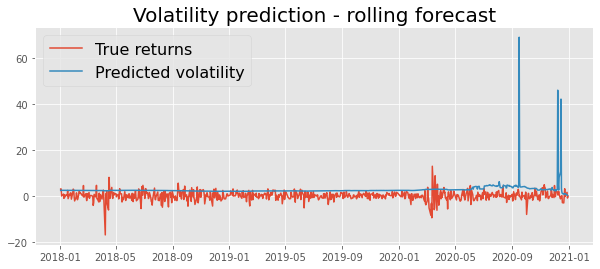

In [54]:
plt.figure(figsize=(10,4))
true, = plt.plot(data_sber_return["2018-01-03":])
preds, = plt.plot(rolling_predictions)
plt.title("Volatility prediction - rolling forecast", fontsize = 20)
plt.legend(['True returns', 'Predicted volatility'], fontsize = 16)
plt.size = (20,20)

In [40]:
train = data_sber_return[0:2000]
model = arch_model(train, p=1, q=1)
model_fit = model.fit()
pred = model_fit.forecast(horizon=100)
pred

Iteration:      1,   Func. Count:      6,   Neg. LLF: 95772441612.12302
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1148130.5958189426
Iteration:      3,   Func. Count:     21,   Neg. LLF: 4208.026901739262
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1031447584.8134124
Iteration:      5,   Func. Count:     33,   Neg. LLF: 4177.344989963754
Iteration:      6,   Func. Count:     39,   Neg. LLF: 4223.688969101522
Iteration:      7,   Func. Count:     45,   Neg. LLF: 4178.8623925731445
Iteration:      8,   Func. Count:     51,   Neg. LLF: 4141.3867844190045
Iteration:      9,   Func. Count:     56,   Neg. LLF: 4141.299327223713
Iteration:     10,   Func. Count:     61,   Neg. LLF: 4141.290600102742
Iteration:     11,   Func. Count:     66,   Neg. LLF: 4141.289695237593
Iteration:     12,   Func. Count:     71,   Neg. LLF: 4141.289619335856
Iteration:     13,   Func. Count:     76,   Neg. LLF: 4141.289618628305
Optimization terminated successfully    (Exit mode 0)
      

C:\Users\eapst\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [44]:
index = returns.index
start_loc = 0
end_loc = np.where(index >= "2010-1-1")[0].min()
forecasts = {}
for i in range(20):
    sys.stdout.write(".")
    sys.stdout.flush()
    res = am.fit(first_obs=i, last_obs=i + end_loc, disp="off")
    temp = res.forecast(horizon=3, reindex=False).variance
    fcast = temp.iloc[0]
    forecasts[fcast.name] = fcast
print()
print(pd.DataFrame(forecasts).T)

array([2.95207766, 3.01307161, 3.07091831, 3.12578017, 3.17781118,
       3.22715743, 3.27395745, 3.31834262, 3.36043755, 3.4003604 ,
       3.43822327, 3.47413243, 3.50818871, 3.54048771, 3.5711201 ,
       3.60017188, 3.6277246 , 3.65385563, 3.67863831, 3.70214222,
       3.72443335, 3.74557427, 3.76562433, 3.78463983, 3.80267413,
       3.81977788, 3.83599909, 3.85138329, 3.86597368, 3.87981122,
       3.89293475, 3.90538111, 3.91718525, 3.9283803 , 3.9389977 ,
       3.94906724, 3.95861721, 3.9676744 , 3.97626425, 3.98441086,
       3.99213712, 3.99946471, 4.0064142 , 4.0130051 , 4.01925591,
       4.02518419, 4.03080657, 4.03613884, 4.04119597, 4.04599215,
       4.05054086, 4.05485485, 4.05894625, 4.06282653, 4.06650659,
       4.06999677, 4.07330685, 4.07644613, 4.07942343, 4.08224711,
       4.08492508, 4.08746487, 4.08987361, 4.09215806, 4.09432464,
       4.09637942, 4.09832818, 4.10017638, 4.10192921, 4.1035916 ,
       4.10516822, 4.10666348, 4.10808158, 4.10942651, 4.11070

In [ ]:
#ljung-box text for serial collinearity
#pearson goodness of fit test
